# Table of Contents

[Libraries](#Libraries) <br>
[Variables](#Variables)
1. [Data Import & Manipulation](#1.-Data-Import-&-Manipulation) 
    1. [Fuel Output & Demand Data](#A.-Fuel-Output-&-Demand-Data)
    2. [HOEP Data](#B.-HOEP-Data)
    3. [NG Production & Demand Data](#C.-NG-Production-&-Demand-Data)
    4. [Transportation Demand Data](#D.-Transportation-Demand-Data)
    5. [Industry Demand Data](#E.-Industry-Demand-Data)
    6. [Emission Factor Calculation](#F.-Emission-Factor-Calculation)
    7. [Input Data to MILP](#G.-Input-Data-to-MILP)
2. [Mixed Integer Linear Programming](#2.-Mixed-Integer-Linear-Programming)
    1. [RNG MILP](#A.-RNG-MILP)
    2. [HENG MILP](#B.-HENG-MILP)
    3. [Transportation MILP](#C.-Transportation-MILP)
    4. [Industry MILP](#D.-Industry-MILP)
    5. [Combined MILP](#E.-Combined-MILP)
3. [Results](#3.-Results)
    1. [Individual Result](#A.-Individual-Result)
    2. [Combined Result](#B.-Combined-Result)


# Libraries

In [1]:
import pandas as pd

# Variables 

Import the csv file with variables 

In [2]:
raw=pd.read_csv('Variables.csv')
raw2=raw.dropna(axis='columns',how='all')
var=raw2.dropna(axis='rows',how='all')
var.set_index("variable_name",inplace=True)

In [3]:
var

,value,unit,source,comment
variable_name,,,,
MW_H2,1.008000e+00,kg/kmol,internet,NaN
density_H2,8.990000e-02,kg/m^3,ushnik,NaN
electrolyzer_eff,7.667000e-01,dimensionless,eqtn 3.1,NaN
E_hhv_h2,3.550000e+00,kWh/m^3 H2,eqtn 3.1,NaN
E_rated_h2,4.630000e+00,kWh/m^3 H2,eqtn 3.1,NaN
min_E_cap,0.000000e+00,kWh,eqtn 3.3,NaN
max_E_cap,1.000000e+03,kWh,eqtn 3.3,NaN
water_cons_rate,4.000000e-01,L H2O/m^3 H2,eqtn 3.4,NaN
meth_reactor_eff,7.700000e-01,dimensionless,eqtn 3.13,NaN


# 1. Data Import & Manipuation

## A. Fuel Output & Demand Data

Import the fuel output data by sources (i.e. nuclear, gas, hydro)

In [4]:
fuel_output = pd.read_csv('on_fuel_source_output_2017.csv', keep_default_na=False, na_values=[""])

In [5]:
fuel_output.head()

,Date,Hour,Fuel,Output
0,2017-01-01,1,NUCLEAR,11592
1,2017-01-01,1,GAS,234
2,2017-01-01,1,HYDRO,2455
3,2017-01-01,1,WIND,2433
4,2017-01-01,1,SOLAR,0


Impor the fuel demand in Onatrio data 

In [6]:
fuel_demand = pd.read_csv('on_demand_2017.csv', keep_default_na=False, na_values=[""])

Subtract 1 hour from the hour because we want 0 to 23 hr 

In [7]:
fuel_output['Hour'] = fuel_output['Hour'] - 1

In [8]:
fuel_output.head()

,Date,Hour,Fuel,Output
0,2017-01-01,0,NUCLEAR,11592
1,2017-01-01,0,GAS,234
2,2017-01-01,0,HYDRO,2455
3,2017-01-01,0,WIND,2433
4,2017-01-01,0,SOLAR,0


In [9]:
fuel_demand['Hour'] = fuel_demand['Hour'] -1

In [10]:
fuel_demand.head()

,Date,Hour,Ontario Demand,Northwest,Northeast,Ottawa,East,Toronto,Essa,Bruce,Southwest,Niagara,West,Zone Total,Diff
0,2017-01-01,0,13522,495,1476,1051,1203,5665,1045,72,2986,465,1334,15790,"2,268"
1,2017-01-01,1,13117,495,1476,1051,1203,5665,1045,72,2986,465,1334,15790,"2,673"
2,2017-01-01,2,12816,495,1476,1051,1203,5665,1045,72,2986,465,1334,15790,"2,974"
3,2017-01-01,3,12605,495,1476,1051,1203,5665,1045,72,2986,465,1334,15790,"3,186"
4,2017-01-01,4,12563,495,1476,1051,1203,5665,1045,72,2986,465,1334,15790,"3,227"


Create Datetime columns in both dataframes

In [11]:
fuel_output['Datetime'] = pd.to_datetime(fuel_output['Date']) + pd.to_timedelta(fuel_output['Hour'], unit='h')

In [12]:
fuel_output.head(15)

,Date,Hour,Fuel,Output,Datetime
0,2017-01-01,0,NUCLEAR,11592,2017-01-01 00:00:00
1,2017-01-01,0,GAS,234,2017-01-01 00:00:00
2,2017-01-01,0,HYDRO,2455,2017-01-01 00:00:00
3,2017-01-01,0,WIND,2433,2017-01-01 00:00:00
4,2017-01-01,0,SOLAR,0,2017-01-01 00:00:00
5,2017-01-01,0,BIOFUEL,1,2017-01-01 00:00:00
6,2017-01-01,1,NUCLEAR,11591,2017-01-01 01:00:00
7,2017-01-01,1,GAS,235,2017-01-01 01:00:00
8,2017-01-01,1,HYDRO,2523,2017-01-01 01:00:00
9,2017-01-01,1,WIND,1994,2017-01-01 01:00:00


In [13]:
fuel_demand['Datetime'] = pd.to_datetime(fuel_demand['Date']) + pd.to_timedelta(fuel_demand['Hour'], unit='h')

In [14]:
fuel_demand.head()

,Date,Hour,Ontario Demand,Northwest,Northeast,Ottawa,East,Toronto,Essa,Bruce,Southwest,Niagara,West,Zone Total,Diff,Datetime
0,2017-01-01,0,13522,495,1476,1051,1203,5665,1045,72,2986,465,1334,15790,"2,268",2017-01-01 00:00:00
1,2017-01-01,1,13117,495,1476,1051,1203,5665,1045,72,2986,465,1334,15790,"2,673",2017-01-01 01:00:00
2,2017-01-01,2,12816,495,1476,1051,1203,5665,1045,72,2986,465,1334,15790,"2,974",2017-01-01 02:00:00
3,2017-01-01,3,12605,495,1476,1051,1203,5665,1045,72,2986,465,1334,15790,"3,186",2017-01-01 03:00:00
4,2017-01-01,4,12563,495,1476,1051,1203,5665,1045,72,2986,465,1334,15790,"3,227",2017-01-01 04:00:00


Groupby the fuel data dataframe by Datetime

In [15]:
fuel_output_total = pd.DataFrame(fuel_output.groupby('Datetime')['Output'].sum())
fuel_output_total.columns = ['fuel_total']

In [16]:
fuel_output_total.head()

,fuel_total
Datetime,
2017-01-01 00:00:00,16715
2017-01-01 01:00:00,16344
2017-01-01 02:00:00,15942
2017-01-01 03:00:00,15727
2017-01-01 04:00:00,15653


Set index of the demand dataframe using Datetime

In [17]:
fuel_demand.set_index('Datetime',inplace=True)

In [18]:
fuel_demand.head()

,Date,Hour,Ontario Demand,Northwest,Northeast,Ottawa,East,Toronto,Essa,Bruce,Southwest,Niagara,West,Zone Total,Diff
Datetime,,,,,,,,,,,,,,,
2017-01-01 00:00:00,2017-01-01,0,13522,495,1476,1051,1203,5665,1045,72,2986,465,1334,15790,"2,268"
2017-01-01 01:00:00,2017-01-01,1,13117,495,1476,1051,1203,5665,1045,72,2986,465,1334,15790,"2,673"
2017-01-01 02:00:00,2017-01-01,2,12816,495,1476,1051,1203,5665,1045,72,2986,465,1334,15790,"2,974"
2017-01-01 03:00:00,2017-01-01,3,12605,495,1476,1051,1203,5665,1045,72,2986,465,1334,15790,"3,186"
2017-01-01 04:00:00,2017-01-01,4,12563,495,1476,1051,1203,5665,1045,72,2986,465,1334,15790,"3,227"


Create SBG data by joining the two data demand and output data and taking the difference between the two 

In [19]:
SBG = pd.merge(fuel_output_total[['fuel_total']],fuel_demand[['Ontario Demand']], how='inner',left_index=True, right_index=True)

In [20]:
SBG.head()

,fuel_total,Ontario Demand
Datetime,,
2017-01-01 00:00:00,16715,13522
2017-01-01 01:00:00,16344,13117
2017-01-01 02:00:00,15942,12816
2017-01-01 03:00:00,15727,12605
2017-01-01 04:00:00,15653,12563


In [21]:
SBG['Difference'] = SBG['fuel_total'] - SBG['Ontario Demand']

In [22]:
SBG.tail()

,fuel_total,Ontario Demand,Difference
Datetime,,,
2017-12-31 19:00:00,21032,18706,2326
2017-12-31 20:00:00,20692,18284,2408
2017-12-31 21:00:00,20142,17772,2370
2017-12-31 22:00:00,19475,17228,2247
2017-12-31 23:00:00,18997,16842,2155


Check if there's any cell with difference less than 0

In [23]:
SBG[SBG['Difference']<0].count()

fuel_total        697
Ontario Demand    697
Difference        697
dtype: int64

Assign negative numbers with 0's 

In [24]:
SBG.loc[SBG['Difference']<=0,'Difference'] = 0

In [25]:
SBG[SBG['Difference']<0].count()

fuel_total        0
Ontario Demand    0
Difference        0
dtype: int64

Convert SBG from MWh to kWh

In [26]:
SBG['Difference'] = SBG['Difference']*1000

Change the column names of the SBG dataframe 

In [27]:
SBG.columns = ['fuel_output','fuel_demand','SBG(kWh)']

In [28]:
SBG.head()

,fuel_output,fuel_demand,SBG(kWh)
Datetime,,,
2017-01-01 00:00:00,16715,13522,3193000
2017-01-01 01:00:00,16344,13117,3227000
2017-01-01 02:00:00,15942,12816,3126000
2017-01-01 03:00:00,15727,12605,3122000
2017-01-01 04:00:00,15653,12563,3090000


## B. HOEP Data

Import the HOEP data <br>
Note: HOEP values are reported as $/MWh

In [29]:
hoep_data = pd.read_csv('HOEP_2017.csv', keep_default_na=False, na_values=[""])

In [30]:
hoep_data.head()

,Date,Hour,HOEP,Hour 1 Predispatch,Hour 2 Predispatch,Hour 3 Predispatch,OR 10 Min Sync,OR 10 Min non-sync,OR 30 Min
0,2017-01-01,1,0.0,5.94,0.0,0.0,NaN,NaN,NaN
1,2017-01-01,2,0.0,0.00,2.2,0.0,NaN,NaN,NaN
2,2017-01-01,3,0.0,0.00,0.0,0.0,NaN,NaN,NaN
3,2017-01-01,4,0.0,0.00,0.0,0.0,NaN,NaN,NaN
4,2017-01-01,5,0.0,0.00,0.0,0.0,NaN,NaN,NaN


Change the hour to hour-1

In [31]:
hoep_data['Hour'] = hoep_data['Hour'] -1

Create datetime column

In [32]:
hoep_data['Datetime'] = pd.to_datetime(hoep_data['Date']) + pd.to_timedelta(hoep_data['Hour'], unit='h')

In [33]:
hoep_data.head()

,Date,Hour,HOEP,Hour 1 Predispatch,Hour 2 Predispatch,Hour 3 Predispatch,OR 10 Min Sync,OR 10 Min non-sync,OR 30 Min,Datetime
0,2017-01-01,0,0.0,5.94,0.0,0.0,NaN,NaN,NaN,2017-01-01 00:00:00
1,2017-01-01,1,0.0,0.00,2.2,0.0,NaN,NaN,NaN,2017-01-01 01:00:00
2,2017-01-01,2,0.0,0.00,0.0,0.0,NaN,NaN,NaN,2017-01-01 02:00:00
3,2017-01-01,3,0.0,0.00,0.0,0.0,NaN,NaN,NaN,2017-01-01 03:00:00
4,2017-01-01,4,0.0,0.00,0.0,0.0,NaN,NaN,NaN,2017-01-01 04:00:00


Set the index of the hoep data using the datetime

In [34]:
hoep_data.set_index('Datetime',inplace=True)

In [35]:
hoep_data.head(10)

,Date,Hour,HOEP,Hour 1 Predispatch,Hour 2 Predispatch,Hour 3 Predispatch,OR 10 Min Sync,OR 10 Min non-sync,OR 30 Min
Datetime,,,,,,,,,
2017-01-01 00:00:00,2017-01-01,0,0.00,5.94,0.00,0.00,NaN,NaN,NaN
2017-01-01 01:00:00,2017-01-01,1,0.00,0.00,2.20,0.00,NaN,NaN,NaN
2017-01-01 02:00:00,2017-01-01,2,0.00,0.00,0.00,0.00,NaN,NaN,NaN
2017-01-01 03:00:00,2017-01-01,3,0.00,0.00,0.00,0.00,NaN,NaN,NaN
2017-01-01 04:00:00,2017-01-01,4,0.00,0.00,0.00,0.00,NaN,NaN,NaN
2017-01-01 05:00:00,2017-01-01,5,0.00,0.01,0.00,1.99,NaN,NaN,NaN
2017-01-01 06:00:00,2017-01-01,6,0.00,5.94,6.04,6.02,NaN,NaN,NaN
2017-01-01 07:00:00,2017-01-01,7,1.71,6.74,8.42,6.74,NaN,NaN,NaN
2017-01-01 08:00:00,2017-01-01,8,0.00,5.74,5.70,5.84,NaN,NaN,NaN


HOEP data is dollar/Mwh so need to convert to dollar/kWh

In [36]:
hoep_data['HOEP']= hoep_data['HOEP']/1000

Merge the SBG data and HOEP data

In [37]:
input_df = pd.merge(SBG[['SBG(kWh)']],hoep_data[['HOEP']], how='inner',left_index=True, right_index=True)

In [38]:
input_df

,SBG(kWh),HOEP
Datetime,,
2017-01-01 00:00:00,3193000,0.00000
2017-01-01 01:00:00,3227000,0.00000
2017-01-01 02:00:00,3126000,0.00000
2017-01-01 03:00:00,3122000,0.00000
2017-01-01 04:00:00,3090000,0.00000
2017-01-01 05:00:00,2898000,0.00000
2017-01-01 06:00:00,2739000,0.00000
2017-01-01 07:00:00,2726000,0.00171
2017-01-01 08:00:00,2267000,0.00000


## C. NG Production & Demand Data

Import the NG hourly distribution data

In [39]:
NG_hourly_distribution = pd.read_csv('NG_hourly_distribution.csv')

In [40]:
NG_hourly_distribution.head(24)

,hour,hourly_distribution
0,1,105
1,2,100
2,3,95
3,4,95
4,5,100
5,6,110
6,7,140
7,8,145
8,9,125
9,10,120


Calculate the ratio of the distribution each hour using hourly distribution divided by the sum of the hourly distribution 

In [41]:
NG_hourly_distribution['ratio'] = NG_hourly_distribution['hourly_distribution']/sum(NG_hourly_distribution['hourly_distribution'])

In [42]:
NG_hourly_distribution

,hour,hourly_distribution,ratio
0,1,105,0.033113
1,2,100,0.031536
2,3,95,0.029959
3,4,95,0.029959
4,5,100,0.031536
5,6,110,0.034689
6,7,140,0.044150
7,8,145,0.045727
8,9,125,0.039420
9,10,120,0.037843


Substract 1 from the hour

In [43]:
NG_hourly_distribution['hour'] = NG_hourly_distribution['hour']-1

Import the NG monthly production data (the data itself is average daily production in each month; obtained from Statistics Canada)

In [44]:
NG_monthly_production = pd.read_csv('NG_monthly_production.csv')

In [45]:
NG_monthly_production

,month,NG_production(e3m3/d)
0,1,199.481446
1,2,220.179477
2,3,198.975008
3,4,199.277688
4,5,199.023394
5,6,198.671039
6,7,198.871786
7,8,198.365348
8,9,258.955997
9,10,261.618395


Create NG demand column in the input_df

In [46]:
input_df['NG_demand(m^3)'] = 0
input_df['NG_demand(m^3)'] = input_df['NG_demand(m^3)'].astype(float)
input_df.head()

,SBG(kWh),HOEP,NG_demand(m^3)
Datetime,,,
2017-01-01 00:00:00,3193000,0.0,0.0
2017-01-01 01:00:00,3227000,0.0,0.0
2017-01-01 02:00:00,3126000,0.0,0.0
2017-01-01 03:00:00,3122000,0.0,0.0
2017-01-01 04:00:00,3090000,0.0,0.0


NG demand calculation: hourly NG demand = ratio at that hour * production in that month

In [47]:
for index, row in input_df.iterrows():
   
    curr_hour = index.hour
    curr_month = index.month 
    ratio = NG_hourly_distribution[NG_hourly_distribution['hour']==curr_hour]['ratio'].iloc[0]
    NG_prod = NG_monthly_production[NG_monthly_production['month']==curr_month]['NG_production(e3m3/d)'].iloc[0]
  
    input_df.loc[index,'NG_demand(m^3)'] = (ratio * NG_prod)*1000
    

In [48]:
input_df.head()

,SBG(kWh),HOEP,NG_demand(m^3)
Datetime,,,
2017-01-01 00:00:00,3193000,0.0,6605.345885
2017-01-01 01:00:00,3227000,0.0,6290.805605
2017-01-01 02:00:00,3126000,0.0,5976.265325
2017-01-01 03:00:00,3122000,0.0,5976.265325
2017-01-01 04:00:00,3090000,0.0,6290.805605


## D. Transportation Demand Data

Import the mobility demand data 

In [49]:
mobility_hourly_distribution = pd.read_csv('mobility_hourly_distribution.csv')

In [50]:
mobility_hourly_distribution.head()

,hour,% of daily demand
0,1,1.05
1,2,0.80
2,3,0.70
3,4,0.40
4,5,0.90


Change the hour to hour-1

In [51]:
mobility_hourly_distribution['hour'] = mobility_hourly_distribution['hour'] -1

In [52]:
mobility_hourly_distribution

,hour,% of daily demand
0,0,1.05
1,1,0.80
2,2,0.70
3,3,0.40
4,4,0.90
5,5,1.10
6,6,2.05
7,7,3.05
8,8,4.05
9,9,5.60


mobility monthly hour distribution = mobility hourly distribution * 264000 kg demand * 1m^3/0.0899kg H2 

In [53]:
mobility_hourly_distribution['demand(m^3)'] = mobility_hourly_distribution['% of daily demand'] / 100 * 264000 /0.0899

In [54]:
mobility_hourly_distribution.head()

,hour,% of daily demand,demand(m^3)
0,0,1.05,30834.260289
1,1,0.80,23492.769744
2,2,0.70,20556.173526
3,3,0.40,11746.384872
4,4,0.90,26429.365962


Weekly profile according to the mobility Excel workbook

In [55]:
# weekday number 6= Sunday, 0 = Monday,... 5 = Saturday 
week_profile_dict = {'weekday': [6,0,1,2,3,4,5],
         'factor': [101,94,96,100,105,108,96]}

week_profile_df = pd.DataFrame.from_dict(week_profile_dict)

week_profile_df['factor_fraction'] = week_profile_df['factor']/100
week_profile_df

,factor,weekday,factor_fraction
0,101,6,1.01
1,94,0,0.94
2,96,1,0.96
3,100,2,1.00
4,105,3,1.05
5,108,4,1.08
6,96,5,0.96


Create mobility demand column in the input data

In [56]:
input_df['mobility_demand(m^3)'] = 0
input_df['mobility_demand(m^3)'] = input_df['mobility_demand(m^3)'].astype(float)
input_df.head()

,SBG(kWh),HOEP,NG_demand(m^3),mobility_demand(m^3)
Datetime,,,,
2017-01-01 00:00:00,3193000,0.0,6605.345885,0.0
2017-01-01 01:00:00,3227000,0.0,6290.805605,0.0
2017-01-01 02:00:00,3126000,0.0,5976.265325,0.0
2017-01-01 03:00:00,3122000,0.0,5976.265325,0.0
2017-01-01 04:00:00,3090000,0.0,6290.805605,0.0


Calculate mobility demand hourly profile = weekday factor * hourly mobility demand

In [57]:
for index, row in input_df.iterrows():
    curr_weekday = index.weekday()
    curr_hour = index.hour 
    week_factor = week_profile_df[week_profile_df['weekday']==curr_weekday]['factor_fraction'].iloc[0]
    mob_demand = mobility_hourly_distribution[mobility_hourly_distribution['hour']==curr_hour]['demand(m^3)'].iloc[0]
    input_df.loc[index,'mobility_demand(m^3)'] = mob_demand * week_factor 

In [58]:
input_df.head()

,SBG(kWh),HOEP,NG_demand(m^3),mobility_demand(m^3)
Datetime,,,,
2017-01-01 00:00:00,3193000,0.0,6605.345885,31142.602892
2017-01-01 01:00:00,3227000,0.0,6290.805605,23727.697442
2017-01-01 02:00:00,3126000,0.0,5976.265325,20761.735261
2017-01-01 03:00:00,3122000,0.0,5976.265325,11863.848721
2017-01-01 04:00:00,3090000,0.0,6290.805605,26693.659622


## E. Industry Demand Data

Total industry production capacity (e6m^3/day)

In [59]:
total_daily_production = 6.3 #e6m^3/day

Total yearly production

In [60]:
total_yearly_production = total_daily_production * 365

print(total_yearly_production)

2299.5


Industry monthly demand according to the paper = monthly demand hydrogen percetnage * total yearly production 

In [61]:
ind_demand_dic = {'month': [1,2,3,4,5,6,7,8,9,10,11,12],
         'monthly_demand_hydrogen[kg]': [3.2,2.7,2.4,2.1,2,1.8,1.7,2,2.1,2.7,3,3.3]
         }
monthly_hydrogen_demand = pd.DataFrame.from_dict(ind_demand_dic)
total_hydrogen_demand = monthly_hydrogen_demand['monthly_demand_hydrogen[kg]'].sum()
monthly_hydrogen_demand['percentage'] = monthly_hydrogen_demand['monthly_demand_hydrogen[kg]']/total_hydrogen_demand
monthly_hydrogen_demand['production_capacity[m^3/day]'] = total_yearly_production * monthly_hydrogen_demand['percentage'] * (10**6)
monthly_hydrogen_demand

,month,monthly_demand_hydrogen[kg],percentage,production_capacity[m^3/day]
0,1,3.2,0.110345,2.537379e+08
1,2,2.7,0.093103,2.140914e+08
2,3,2.4,0.082759,1.903034e+08
3,4,2.1,0.072414,1.665155e+08
4,5,2.0,0.068966,1.585862e+08
5,6,1.8,0.062069,1.427276e+08
6,7,1.7,0.058621,1.347983e+08
7,8,2.0,0.068966,1.585862e+08
8,9,2.1,0.072414,1.665155e+08
9,10,2.7,0.093103,2.140914e+08


Creating empty column in the input df for industry demand

In [62]:
input_df['industry_demand(m^3)'] = 0
input_df['industry_demand(m^3)'] = input_df['industry_demand(m^3)'].astype(float)
input_df.head()

,SBG(kWh),HOEP,NG_demand(m^3),mobility_demand(m^3),industry_demand(m^3)
Datetime,,,,,
2017-01-01 00:00:00,3193000,0.0,6605.345885,31142.602892,0.0
2017-01-01 01:00:00,3227000,0.0,6290.805605,23727.697442,0.0
2017-01-01 02:00:00,3126000,0.0,5976.265325,20761.735261,0.0
2017-01-01 03:00:00,3122000,0.0,5976.265325,11863.848721,0.0
2017-01-01 04:00:00,3090000,0.0,6290.805605,26693.659622,0.0


number of days in each month

In [63]:
num_days_dic = {'month': [1,2,3,4,5,6,7,8,9,10,11,12],
         'number_of_days': [31,28,31,30,31,30,31,31,30,31,30,31]}
num_days_df = pd.DataFrame.from_dict(num_days_dic)
num_days_df

,month,number_of_days
0,1,31
1,2,28
2,3,31
3,4,30
4,5,31
5,6,30
6,7,31
7,8,31
8,9,30
9,10,31


Create hourly profile for industry demand = monthly production capacity / number of days in the month * 24 hours in month * __0.05 (5% demand supply criteria)__

In [64]:
for index, row in input_df.iterrows():
    curr_month = index.month 
    num_days = num_days_df[num_days_df['month']==curr_month]['number_of_days'].iloc[0]
    ind_prod = monthly_hydrogen_demand[monthly_hydrogen_demand['month']==curr_month]['production_capacity[m^3/day]'].iloc[0]
    input_df.loc[index,'industry_demand(m^3)'] = ind_prod / (num_days * 24) * 0.05

In [65]:
input_df.head()

,SBG(kWh),HOEP,NG_demand(m^3),mobility_demand(m^3),industry_demand(m^3)
Datetime,,,,,
2017-01-01 00:00:00,3193000,0.0,6605.345885,31142.602892,17052.280311
2017-01-01 01:00:00,3227000,0.0,6290.805605,23727.697442,17052.280311
2017-01-01 02:00:00,3126000,0.0,5976.265325,20761.735261,17052.280311
2017-01-01 03:00:00,3122000,0.0,5976.265325,11863.848721,17052.280311
2017-01-01 04:00:00,3090000,0.0,6290.805605,26693.659622,17052.280311


## F. Emission Factor Calculation

Hourly average emission factor calculated using the fuel output 

In [66]:
#EMF(tonne/kWh)

emission_factor = fuel_output.copy()
emission_factor['Emission'] = 0
emission_factor['Emission'] = emission_factor['Emission'].astype(float)
emission_factor.head()


#all in kgCO2/MWh 
EMF_nuclear = 17 
EMF_gas = 622
EMF_hydro = 18
EMF_wind = 14
EMF_solar = 39
EMF_biofuel = 177


for index, row in emission_factor.iterrows():
    fuel_type = row['Fuel']
    
    if fuel_type == 'NUCLEAR':
        EMF = EMF_nuclear
    elif fuel_type == 'GAS':
        EMF = EMF_gas
    elif fuel_type == 'HYDRO':
        EMF = EMF_hydro
    elif fuel_type == 'BIOFUEL':
        EMF = EMF_biofuel
    elif fuel_type == 'SOLAR':
        EMF = EMF_solar
    else:
        EMF = EMF_wind
        
    emission_factor.loc[index,'Emission'] = EMF * emission_factor.loc[index,'Output']

emission_factor.head()

emission_factor_agg = pd.DataFrame(emission_factor.groupby('Datetime').agg({'Emission':'sum','Output':'sum'}))

emission_factor_agg['EMF(kgCO2/MWh)'] = emission_factor_agg['Emission'] / emission_factor_agg['Output'] 
emission_factor_agg['EMF(tonne/kWh)'] = emission_factor_agg['EMF(kgCO2/MWh)'] / 1000 / 1000 #unit conversion 1tonne/1000kg, 1MW/1000kW
emission_factor_agg.head()

,Emission,Output,EMF(kgCO2/MWh),EMF(tonne/kWh)
Datetime,,,,
2017-01-01 00:00:00,421041.0,16715,25.189411,0.000025
2017-01-01 01:00:00,416724.0,16344,25.497063,0.000025
2017-01-01 02:00:00,410267.0,15942,25.734977,0.000026
2017-01-01 03:00:00,408635.0,15727,25.983023,0.000026
2017-01-01 04:00:00,406922.0,15653,25.996422,0.000026


In [67]:
input_df = pd.merge(input_df,emission_factor_agg[['EMF(tonne/kWh)']], how='inner',left_index=True, right_index=True)
input_df.head()

,SBG(kWh),HOEP,NG_demand(m^3),mobility_demand(m^3),industry_demand(m^3),EMF(tonne/kWh)
Datetime,,,,,,
2017-01-01 00:00:00,3193000,0.0,6605.345885,31142.602892,17052.280311,0.000025
2017-01-01 01:00:00,3227000,0.0,6290.805605,23727.697442,17052.280311,0.000025
2017-01-01 02:00:00,3126000,0.0,5976.265325,20761.735261,17052.280311,0.000026
2017-01-01 03:00:00,3122000,0.0,5976.265325,11863.848721,17052.280311,0.000026
2017-01-01 04:00:00,3090000,0.0,6290.805605,26693.659622,17052.280311,0.000026


## G. Input Data to MILP

In [68]:
input_df.head(10)

,SBG(kWh),HOEP,NG_demand(m^3),mobility_demand(m^3),industry_demand(m^3),EMF(tonne/kWh)
Datetime,,,,,,
2017-01-01 00:00:00,3193000,0.00000,6605.345885,31142.602892,17052.280311,0.000025
2017-01-01 01:00:00,3227000,0.00000,6290.805605,23727.697442,17052.280311,0.000025
2017-01-01 02:00:00,3126000,0.00000,5976.265325,20761.735261,17052.280311,0.000026
2017-01-01 03:00:00,3122000,0.00000,5976.265325,11863.848721,17052.280311,0.000026
2017-01-01 04:00:00,3090000,0.00000,6290.805605,26693.659622,17052.280311,0.000026
2017-01-01 05:00:00,2898000,0.00000,6919.886166,32625.583982,17052.280311,0.000026
2017-01-01 06:00:00,2739000,0.00000,8807.127847,60802.224694,17052.280311,0.000026
2017-01-01 07:00:00,2726000,0.00171,9121.668128,90461.846496,17052.280311,0.000026
2017-01-01 08:00:00,2267000,0.00000,7863.507007,120121.468298,17052.280311,0.000026


In [69]:
input_df.reset_index(inplace=True)
input_df.head(10)

,Datetime,SBG(kWh),HOEP,NG_demand(m^3),mobility_demand(m^3),industry_demand(m^3),EMF(tonne/kWh)
0,2017-01-01 00:00:00,3193000,0.00000,6605.345885,31142.602892,17052.280311,0.000025
1,2017-01-01 01:00:00,3227000,0.00000,6290.805605,23727.697442,17052.280311,0.000025
2,2017-01-01 02:00:00,3126000,0.00000,5976.265325,20761.735261,17052.280311,0.000026
3,2017-01-01 03:00:00,3122000,0.00000,5976.265325,11863.848721,17052.280311,0.000026
4,2017-01-01 04:00:00,3090000,0.00000,6290.805605,26693.659622,17052.280311,0.000026
5,2017-01-01 05:00:00,2898000,0.00000,6919.886166,32625.583982,17052.280311,0.000026
6,2017-01-01 06:00:00,2739000,0.00000,8807.127847,60802.224694,17052.280311,0.000026
7,2017-01-01 07:00:00,2726000,0.00171,9121.668128,90461.846496,17052.280311,0.000026
8,2017-01-01 08:00:00,2267000,0.00000,7863.507007,120121.468298,17052.280311,0.000026
9,2017-01-01 09:00:00,2324000,0.00000,7548.966726,166093.882091,17052.280311,0.000026


## Plot & Summary of Input Data

In [70]:
#function for creating plot from df 
def create_plot_df(df,y_col,y_col_name =None):
    %matplotlib inline
    import matplotlib.pyplot as plt
    df.reset_index()
    plt.figure(figsize=(40,10))
    plt.plot(df.index,df[y_col])
    plt.xlabel('Hour',fontsize=15)
    if y_col_name is not None:
        plt.ylabel(y_col_name,fontsize=15)
    else:    
        plt.ylabel(y_col,fontsize=15)

def create_summary_df(df,col_name=None):
    
    if col_name is not None:
        df_sum = df[[col_name]].sum()[0]
        df_mean = df[[col_name]].mean()[0]
        df_min = df[[col_name]].min()[0]
        df_max = df[[col_name]].max()[0]
        
        new_list = [df_sum, df_mean, df_min, df_max]
        index_list = ['sum','mean','min','max']
        
        d = {col_name: new_list}
        new_df = pd.DataFrame(data=d,index = index_list)
        
        display(new_df)
        
        
def create_summary_all(df,start_col):
    for i in range(start_col,len(df.columns.tolist())):
        df_sum = df.iloc[:,i].sum()
        df_mean = df.iloc[:,i].mean()
        df_min = df.iloc[:,i].min()
        df_max = df.iloc[:,i].max()
        
        new_list = [df_sum, df_mean, df_min, df_max]
        index_list = ['sum','mean','min','max'] 
        
        d = {df.columns[i]: new_list}
        new_df = pd.DataFrame(data=d,index = index_list)
        
        if i == start_col:
            temp_df = new_df
            
        else:
            temp_df = pd.concat([temp_df, new_df], axis=1)
            
            
    display(temp_df)        
    return temp_df


In [71]:
summarydf = create_summary_all(input_df,1)
summarydf.to_clipboard(excel=True)

,SBG(kWh),HOEP,NG_demand(m^3),mobility_demand(m^3),industry_demand(m^3),EMF(tonne/kWh)
sum,1.121006e+10,123.851380,7.960734e+07,1.071887e+09,1.149750e+08,0.366404
mean,1.279687e+06,0.014138,9.087596e+03,1.223615e+05,1.312500e+04,0.000042
min,0.000000e+00,-0.067080,5.942828e+03,1.104160e+04,9.059024e+03,0.000020
max,3.502000e+06,1.822950,1.732572e+04,2.502332e+05,1.758516e+04,0.000176


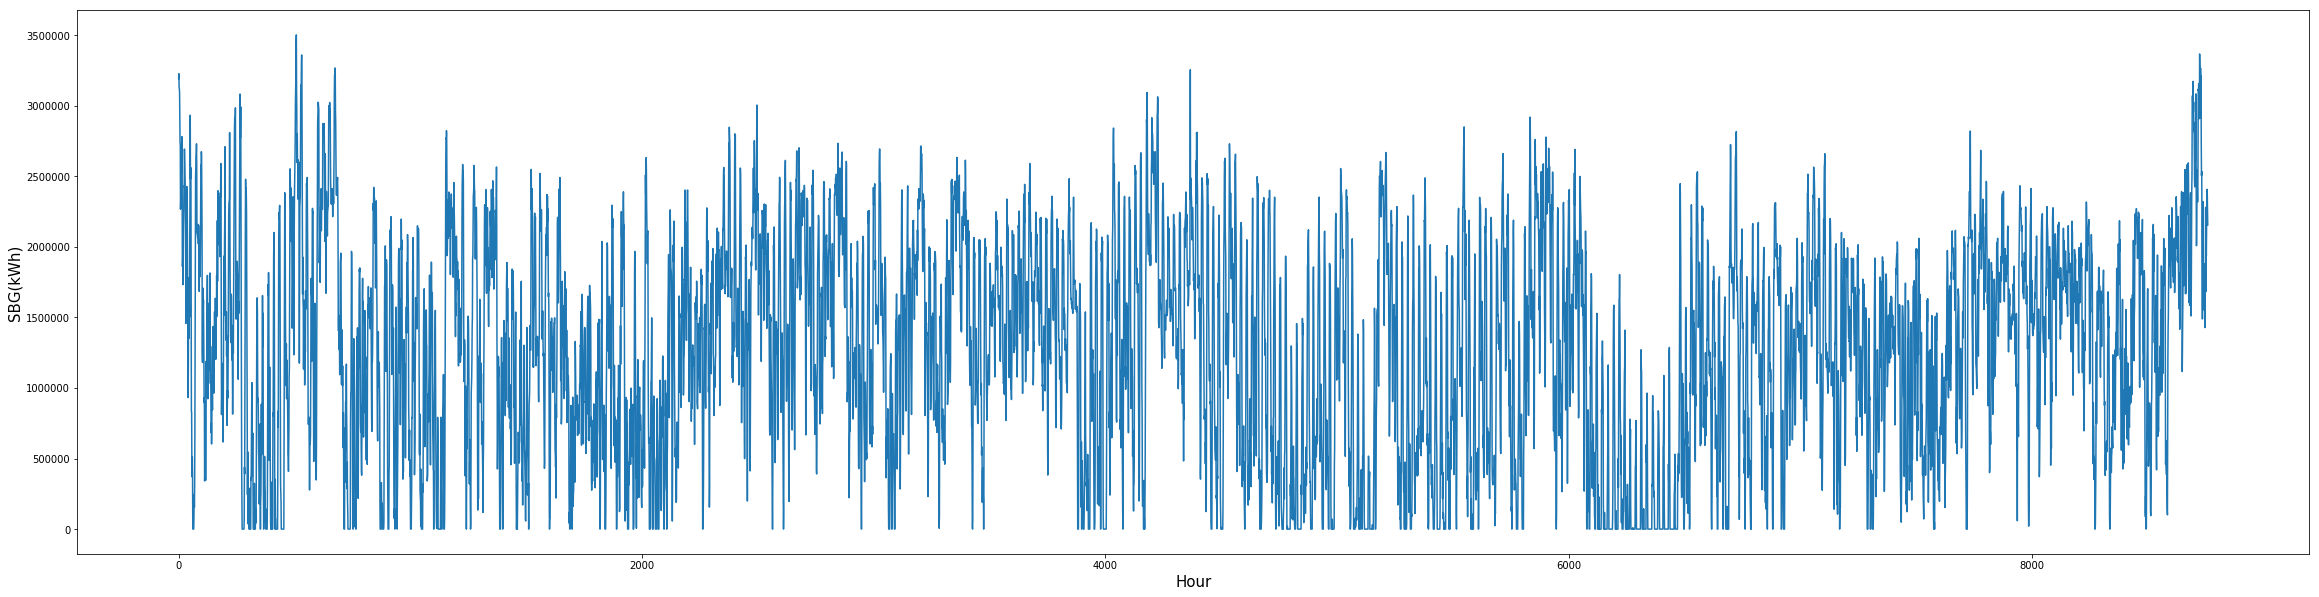

In [72]:
create_plot_df(input_df,'SBG(kWh)')

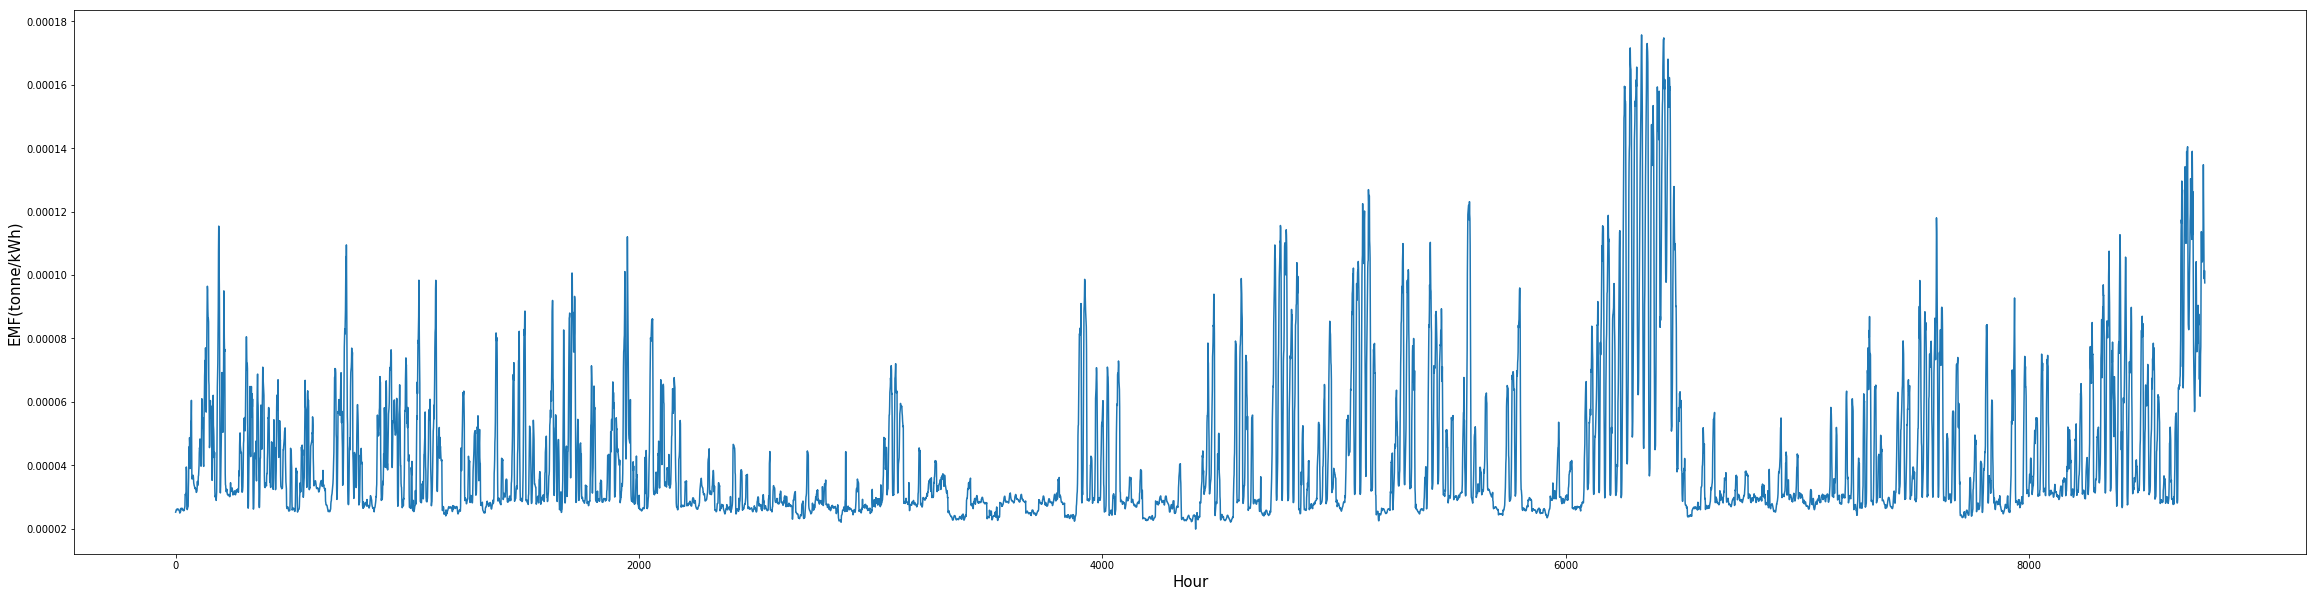

In [73]:
create_plot_df(input_df,'EMF(tonne/kWh)')

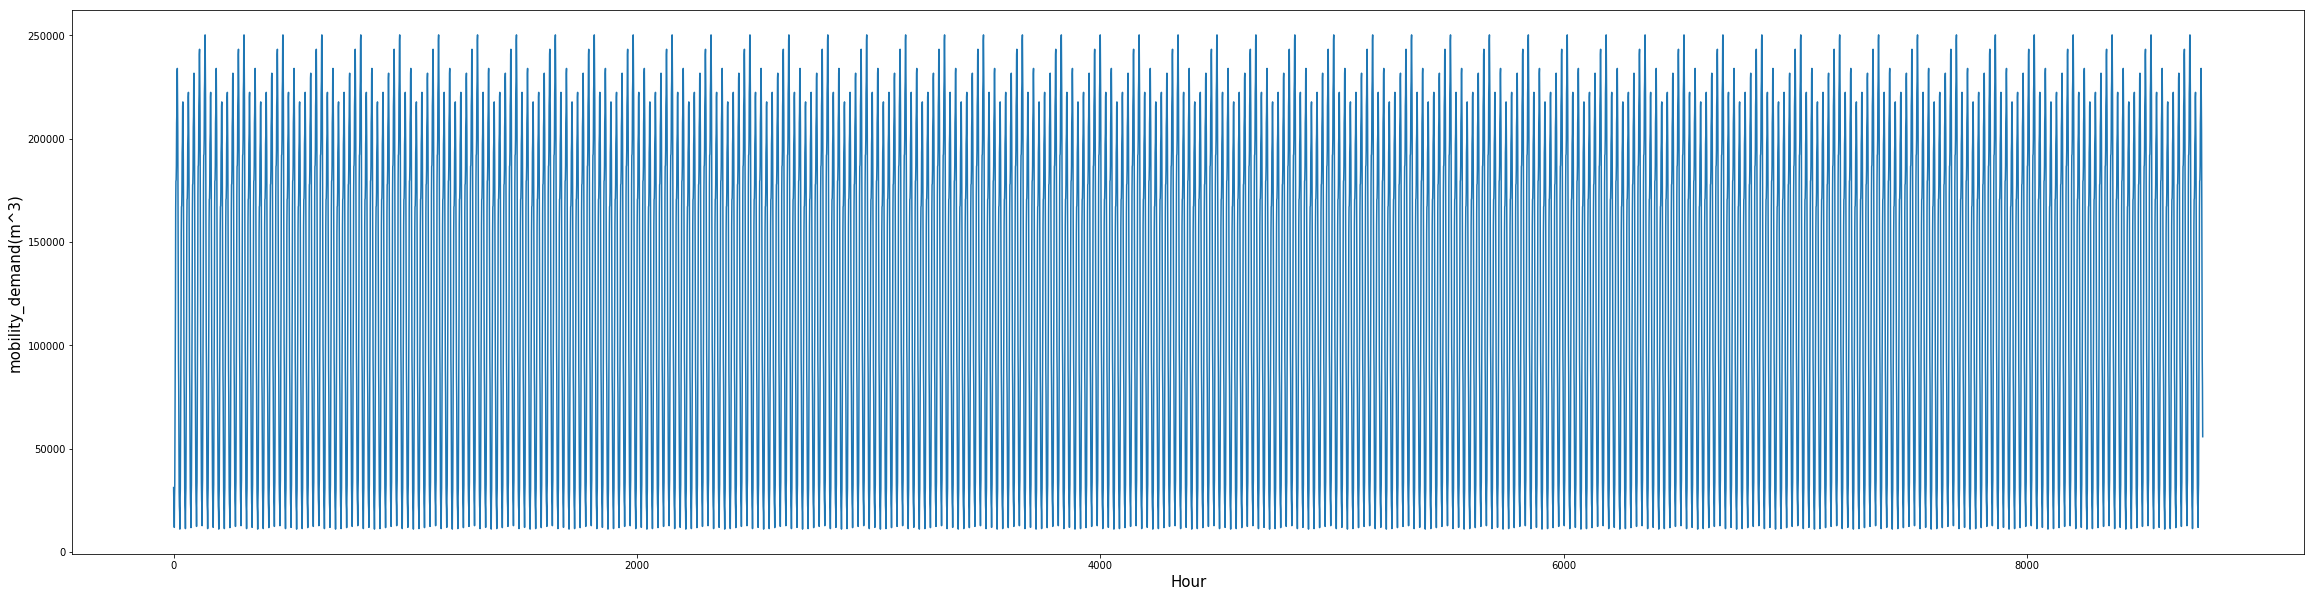

In [74]:
create_plot_df(input_df,'mobility_demand(m^3)')

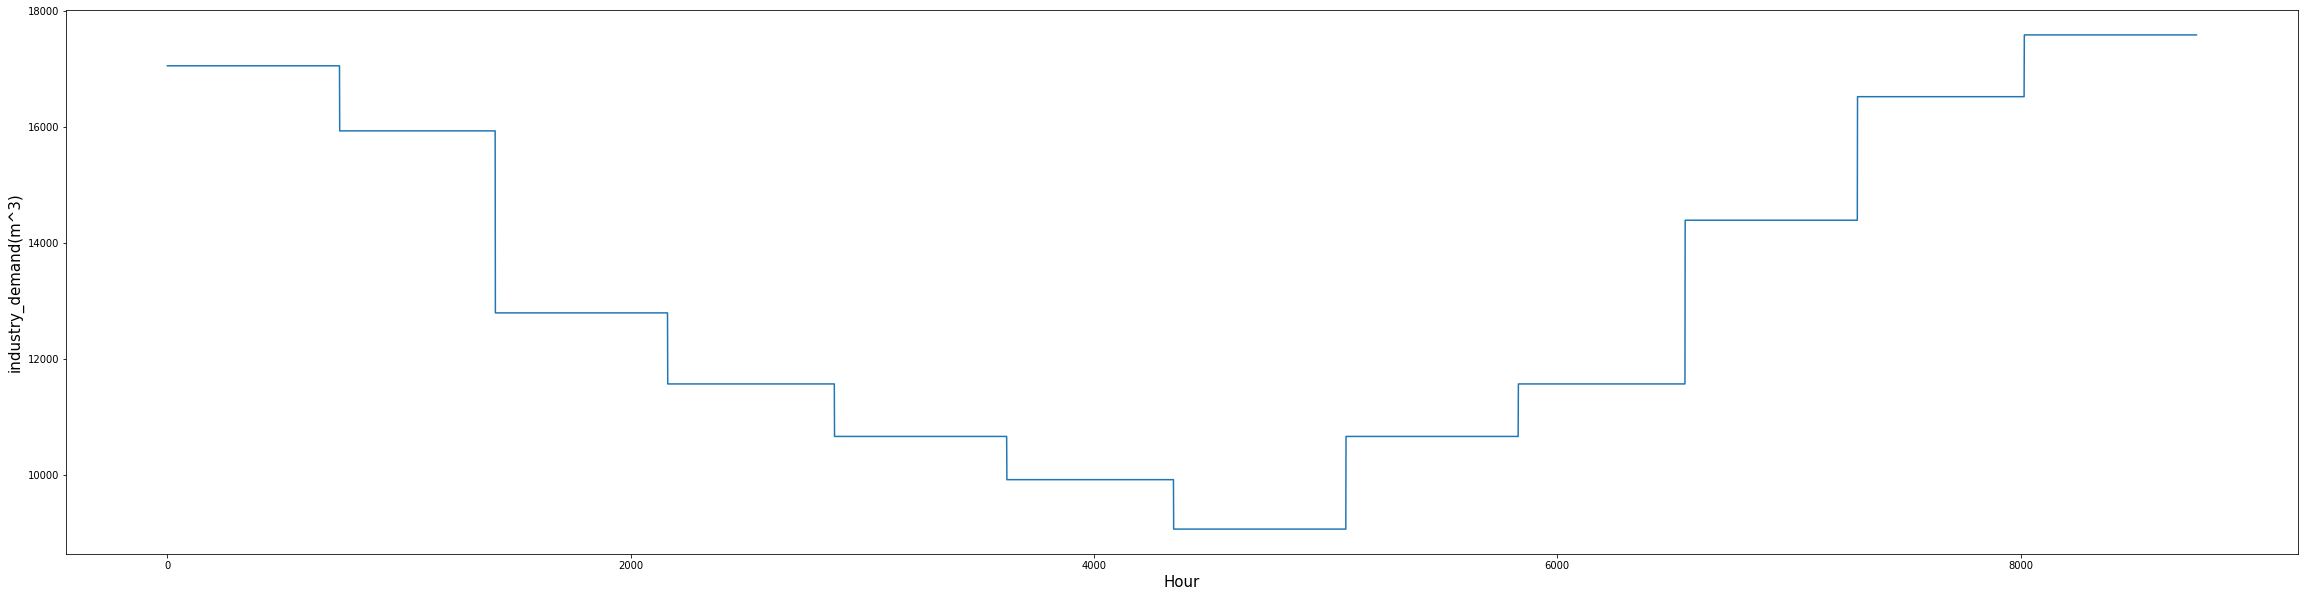

In [75]:
create_plot_df(input_df,'industry_demand(m^3)')

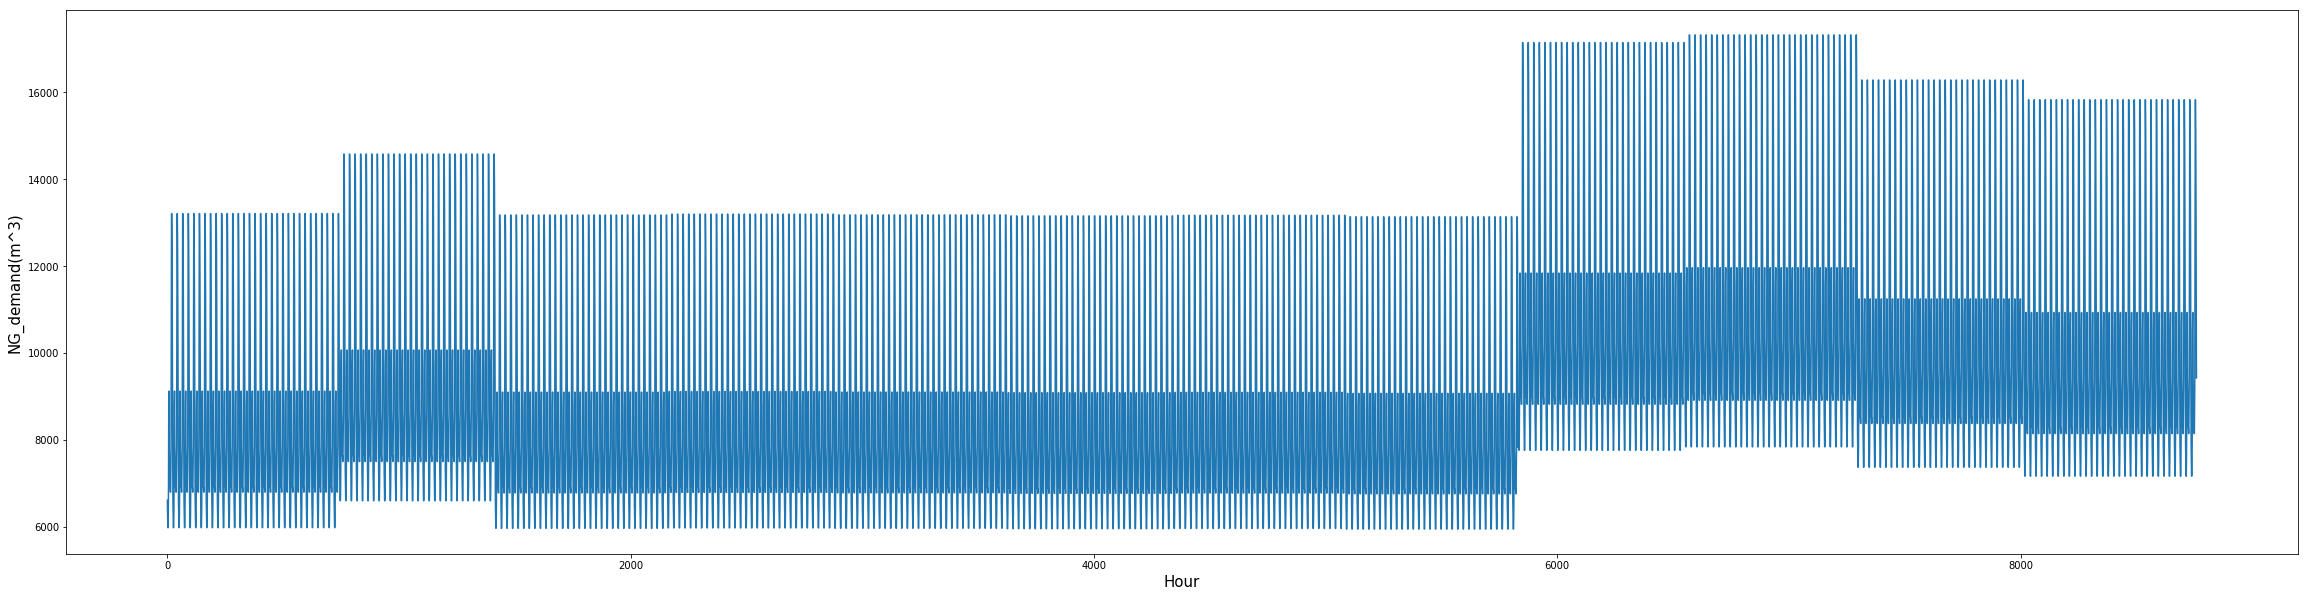

In [76]:
create_plot_df(input_df,'NG_demand(m^3)')

# 2. Mixed Integer Linear Programming

Numbering variables 
<br>
1. RNG <br>
2. HENG <br>
3. Transportation <br>
4. Industry

## A. RNG MILP

## B. HENG MILP

## C. Transportation MILP

## D. Industry MILP

## E. Combined MILP

## Equality constraint

## Original Demand

## phi = 0.5

In [77]:
"""
Combined model (RNG+HENG+Mobility+Industry)
"""

'''
Functions for creating variable df and exporting as a csv file
'''
def create_var_df(LP_object):
    variable_tuple = [(v.name,v.varValue) for v in LP_object.variables()]

    variable_df = pd.DataFrame(data=variable_tuple,columns=['variable','value'])

    return variable_df

def export_to_csv(df,filename):
    df.to_csv(filename+'.csv')



import pulp
import pandas as pd
import time
from numpy import count_nonzero




######################
######################
demand_factor = 1.0
#######################
#######################

case_name = 'demand_factor_' + str(demand_factor)


#Estimating the time taken to solve this optimzation problem
#start time
start_time = time.time()
print(start_time)


# Time-series constants
SBG = list(input_df['SBG(kWh)'])
NG_demand = list(input_df['NG_demand(m^3)'])
mobility_demand = list(input_df['mobility_demand(m^3)'])
industry_demand = list(input_df['industry_demand(m^3)']) # 5% of actual demand
HOEP = list(input_df['HOEP'])
EMF = list(input_df['EMF(tonne/kWh)'])

# Electrolyzer and flow constants
N_max = 3510
N_max += 1
nu_electrolyzer = var['value']['electrolyzer_eff']
E_HHV_H2 = var['value']['E_hhv_h2'] # kwh/m^3
nu_reactor = var['value']['meth_reactor_eff']
HHV_H2 = var['value']['HHV_H2'] # MMBtu/kmol
HHV_NG = var['value']['HHV_NG'] # MMBtu/kmol
CO2_available_total = var['value']['CO2_total'] # m^3
CO2_available = float(CO2_available_total) / count_nonzero(SBG)
E_electrolyzer_min = var['value']['min_E_cap'] # kwh
E_electrolyzer_max = var['value']['max_E_cap'] # kwh
tau = 0.50

# Emission constants
EMF_NG = var['value']['EMF_NG'] # tonne CO2/m^3 H2
EMF_comb = var['value']['EMF_combRNG'] # tonne CO2/m^3 RNG
EMF_bio = var['value']['EMF_bioCO2'] # tonne CO2/kWh
EMF_electrolyzer = var['value']['EMF_electrolyzer'] # tonne CO2/m^3 H2
EMF_reactor = var['value']['EMF_reactor'] # tonne CO2/m^3 RNG
EMF_vehicle = var['value']['emission_gasoline_v'] # tonne CO2/car/year
num_vehicle = var['value']['N_gasoline_v']
FCV_penetration = var['value']['FCV_penetration'] # FCV market penetration (estimated)
EMF_SMR = var['value']['EMF_SMR'] # kg CO2/kmol of H2

# Electrolyzer and flow cost
beta = var['value']['beta']
C_0 = var['value']['C_0'] # $/kW
mu = var['value']['mu']
gamma = var['value']['gamma']
k = var['value']['k'] # $
C_upgrading = var['value']['C_upgrading'] # $/m^3 reactor capacity
C_CO2 = var['value']['C_CO2'] # $/m^3 CO2
TC = var['value']['TC'] # $/kWh
C_H2O = var['value']['C_H2O'] # $/L
WCR = var['value']['water_cons_rate'] # L H2O/m^3 H2
OPEX_upgrading = var['value']['OPEX_upgrading'] # $/m^3 reactor capacity
TVM = var['value']['TVM']

# Tank and compressor constants
I_max = var['value']['Imax'] # kmol
I_min= var['value']['Imin'] # kmol
F_max_booster = var['value']['Fmax_booster'] # kmol
F_max_prestorage =var['value']['Fmax_prestorage'] # kmol

CAPEX_booster = var['value']['CAPEX_booster'] # $
CAPEX_prestorage = var['value']['CAPEX_prestorage'] # $
CAPEX_tank = var['value']['CAPEX_tank'] # $

ECF_prestorage = var['value']['ECF_prestorage'] # kWh/kmol H2

z_booster = var['value']['z_booster'] # compressibility factor for booster compressor
R = var['value']['R'] # kJ/kmolK
T = var['value']['T'] # K
comp_efficiency = var['value']['comp_efficiency']  # isentropic compressor efficiency
heat_cap_ratio = var['value']['heat_cap_ratio'] # heat capacaity ratio of hydrogen
P_in_booster = var['value']['P_in_booster'] # inlet pressure of booster compressor
P_out_booster = var['value']['P_out_booster'] # outlet pressure of booster compressor
N_stage_booster = var['value']['N_stage_booster']

ECF_booster = z_booster * R * T * N_stage_booster / comp_efficiency * \
              heat_cap_ratio / (heat_cap_ratio - 1) * \
              (((P_out_booster / P_in_booster) ** ((heat_cap_ratio - 1) / N_stage_booster / heat_cap_ratio ))-1) \
              / 3600 # converting kJ to kWh ECF booster in kWh/kmol

# Converting the tank and compressor constants to m^3
MW_H2 = var['value']['MW_H2'] # kg/kmol H2
density_H2 = var['value']['density_H2'] # kg/m^3

I_max = I_max * MW_H2 / density_H2 # m^3
I_min = I_min * MW_H2 / density_H2 # m^3
F_max_booster = F_max_booster * MW_H2 / density_H2 # m^3
F_max_prestorage = F_max_prestorage * MW_H2 / density_H2 # m^3

ECF_booster = ECF_booster / MW_H2 * density_H2 # kWh/m^3
ECF_prestorage = ECF_prestorage / MW_H2 * density_H2 # kWh/m^3
EMF_SMR = EMF_SMR * 0.001 / MW_H2 * density_H2 # tonne CO2/m^3 of H2

"""LP"""
# Maximize emission offset
LP_eps = pulp.LpProblem('LP_eps', pulp.LpMaximize)

# Minimize cost
LP_cost = pulp.LpProblem('LP_cost', pulp.LpMinimize)

"""RNG"""
# Max RNG flow (m^3/h)
RNG_max = pulp.LpVariable('RNG_max',
                          lowBound=0,
                          cat='Continuous')
# H2 flow to RNG (m^3/h)
H2_1 = pulp.LpVariable.dicts('H2_1',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')
# RNG flow (m^3/h)
RNG = pulp.LpVariable.dicts('RNG',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')
# CO2 flow (m^3/h)
CO2 = pulp.LpVariable.dicts('CO2',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')
# 0 if RNG_max = 0, 1 otherwise
alpha_RNG = pulp.LpVariable('alpha_RNG',
                          cat='Binary')

"""HENG"""
# H2 flow to HENG (m^3/h)
H2_2 = pulp.LpVariable.dicts('H2_2',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')

"""Mobility"""
# H2 flow to mobility fuel (m^3/h)
H2_3 = pulp.LpVariable.dicts('H2_3',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')

"""Industry"""
# H2 flow to industry feed (m^3/h)
H2_4 = pulp.LpVariable.dicts('H2_4',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')

"""Shared"""
# Number of booster compressors
N_booster = pulp.LpVariable('N_booster',
                          lowBound=0,
                          cat='Integer')
# Number of prestorage compressors
N_prestorage = pulp.LpVariable('N_prestorage',
                          lowBound=0,
                          cat='Integer')
# Number of tanks
N_tank = pulp.LpVariable('N_tank',
                          lowBound=0,
                          cat='Integer')
# H2 flow directly from electrolyzers (m^3/h)
H2_direct = pulp.LpVariable.dicts('H2_direct',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')
# H2 flow going into tanks from electrolyzers (m^3/h)
H2_tank_in = pulp.LpVariable.dicts('H2_tank_in',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')
# H2 flow coming out from tanks (m^3/h)
H2_tank_out = pulp.LpVariable.dicts('H2_tank_out',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')
# Total SBG usage (kWh)
E = pulp.LpVariable.dicts('E',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')
# Inventory level of H2 (m^3)
I_H2 = pulp.LpVariable.dicts('I_H2',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')
# Number of electrolyzers
N_electrolyzer = pulp.LpVariable('N_electrolyzer',
                          lowBound=0,
                          cat='Integer')
# alpha_n = 1 if N_electrolyzer = n, 0 otherwise
alpha = pulp.LpVariable.dicts('alpha',
                          [str(i) for i in range(1, N_max)],
                          cat='Binary')
# NG flow (m^3/h)
NG = pulp.LpVariable.dicts('NG',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')

# Emission variables (tonnes CO2/yr)
em_offset = pulp.LpVariable('em_offset',
                          lowBound=0,
                          cat='Continuous')
em_rng = pulp.LpVariable('em_rng',
                          lowBound=0,
                          cat='Continuous')
# em_heng = pulp.LpVariable('em_heng',
#                           lowBound=0,
#                           cat='Continuous')
em_ng = pulp.LpVariable('em_ng',
                          lowBound=0,
                          cat='Continuous')
em_electrolyzer = pulp.LpVariable('em_electrolyzer',
                          lowBound=0,
                          cat='Continuous')
em_booster_comp = pulp.LpVariable('em_booster_comp',
                          lowBound=0,
                          cat='Continuous')
em_pre_comp = pulp.LpVariable('em_pre_comp',
                          lowBound=0,
                          cat='Continuous')
em_smr = pulp.LpVariable('em_smr',
                          lowBound=0,
                          cat='Continuous')
em_sbg = pulp.LpVariable('em_sbg',
                          lowBound=0,
                          cat='Continuous')

# Electrolyzer CAPEX ($)
CAPEX_electrolyzer = pulp.LpVariable('CAPEX_Electrolyzer', lowBound=0, cat='Continuous')
# Reactor CAPEX ($)
CAPEX_reactor = pulp.LpVariable('CAPEX_reactor', lowBound=0, cat='Continuous')
# Tank + prestorage comp CAPEX ($)
CAPEX_storage = pulp.LpVariable('CAPEX_storage', lowBound=0, cat='Continuous')
# Booster compressor CAPEX ($)
CAPEX_booster_comp = pulp.LpVariable('CAPEX_booster_comp', lowBound=0, cat='Continuous')

# SBG treatment OPEX (electrolyzer + prestorage + tank) ($/yr)
OPEX_SBG = pulp.LpVariable('OPEX_SBG', lowBound=0, cat='Continuous')
# Reactor OPEX ($/yr)
OPEX_reactor = pulp.LpVariable('OPEX_reactor', lowBound=0, cat='Continuous')
# Booster compressor OPEX ($/yr)
OPEX_booster_comp = pulp.LpVariable('OPEX_booster_comp', lowBound=0, cat='Continuous')

# Total cost
total_cost = pulp.LpVariable('total_cost', lowBound=0, cat='Continuous')


for LP in [LP_eps, LP_cost]:
    for i, h in enumerate([str(i) for i in input_df.index]):
        # Energy and flow constraints
        LP += H2_direct[h] + H2_tank_in[h] == nu_electrolyzer * E[h] * E_HHV_H2 ** (-1)
        LP += H2_direct[h] + H2_tank_out[h] == H2_1[h] + H2_2[h] + H2_3[h] + H2_4[h]

        # Hydrogen storage tank constraint
        if h == '0':
            LP += I_H2[h] == I_min * N_tank + H2_tank_in[h] - H2_tank_out[h]
        else:
            LP += I_H2[h] == I_H2[str(i - 1)] + H2_tank_in[h] - H2_tank_out[h]
        LP += I_H2[h] <= I_max * N_tank
        LP += I_H2[h] >= I_min * N_tank

        # Prestorage compressor capacity constraint
        LP += H2_tank_in[h] <= N_prestorage * F_max_prestorage

        # Reactor constraints
#        if h == '0':
#            LP += RNG_max <= CO2_available
        LP += RNG[h] == nu_reactor * H2_1[h] * HHV_H2 / HHV_NG
        LP += CO2[h] == RNG[h]

        # NG demand constraint
        LP += NG_demand[i] == RNG[h] + NG[h] + H2_2[h]

        # Mobility demand constraint
        LP += H2_3[h] == demand_factor * mobility_demand[i]

        # Industry demand constraint
        LP += H2_4[h] == demand_factor * industry_demand[i]

        # Supply constraint
        LP += E[h] <= SBG[i]

        # Booster compressor capcity constraint (mobility)
        LP += H2_3[h] <= N_booster * F_max_booster

        # Electrolyzer constraints
        LP += N_electrolyzer * E_electrolyzer_min <= E[h]
        LP += N_electrolyzer * E_electrolyzer_max >= E[h]

        # Reactor constraints
        LP += RNG[h] <= RNG_max
        if h != '0':
            LP += -RNG_max * tau <= RNG[h] - RNG[str(i - 1)]
            LP += RNG_max * tau >= RNG[h] - RNG[str(i - 1)]

        # RNG demand constraints
        RNG_content = 0.10 * demand_factor
        LP += (1 - RNG_content) * RNG[h] == RNG_content * (NG[h] + H2_2[h])

        # HENG demand constraints
        HENG_content = 0.05 * demand_factor
        LP += (1 - HENG_content) * H2_2[h] == HENG_content * (NG[h] + RNG[h])

    # Integer constraints
    LP += pulp.lpSum(n * alpha[str(n)] for n in range(1, N_max)) == N_electrolyzer
    LP += pulp.lpSum(alpha) <= 1

    # Emission constraints
    LP += pulp.lpSum(EMF_comb * RNG[h] + EMF_bio * CO2[h] + EMF_reactor * RNG[h] \
                     for h in [str(x) for x in input_df.index]) == em_rng
    # LP += pulp.lpSum(EMF_NG * NG[h] for h in [str(x) for x in input_df.index]) == em_heng
    LP += pulp.lpSum(EMF_NG * (NG_demand[h] - NG[str(h)]) for h in input_df.index) == em_ng
    em_gas_vehicle = demand_factor * 100000 * EMF_vehicle
    LP += pulp.lpSum(EMF_SMR * demand_factor * industry_demand[h] for h in input_df.index) == em_smr
    LP += pulp.lpSum(EMF[int(h)] * (E[h]) for h in [str(x) for x in input_df.index]) == em_sbg
    LP += pulp.lpSum(EMF_electrolyzer * (H2_direct[h] + H2_tank_in[h]) \
                     for h in [str(x) for x in input_df.index]) == em_electrolyzer
    LP += pulp.lpSum(EMF[n] * ECF_booster * H2_3[str(n)] for n in input_df.index) == em_booster_comp
    LP += pulp.lpSum(EMF[n] * ECF_prestorage * H2_tank_in[str(n)] for n in input_df.index) == em_pre_comp

"""
Emission objective model
"""

LP_eps += em_ng + em_gas_vehicle + em_smr - \
          (em_rng + em_sbg + em_electrolyzer + em_booster_comp + em_pre_comp), 'Offset'
print('eps start')
LP_eps.solve()
print(LP_eps.status)
offset_max = LP_eps.objective.value()

"""
Cost objective model
"""

# CAPEX electrolyzer
C_electrolyzer = [beta * C_0 * i ** mu for i in range(1, N_max)]
LP_cost += pulp.lpSum(alpha[str(n)] * C_electrolyzer[n - 1] for n in range(1, N_max)) \
           == CAPEX_electrolyzer

# CAPEX reactor (RNG)
LP_cost += gamma * RNG_max + k * alpha_RNG + C_upgrading * RNG_max == CAPEX_reactor
LP_cost += alpha_RNG <= RNG_max * 10E10
LP_cost += alpha_RNG >= RNG_max * 10E-10

# CAPEX booster compressor (Mobility)
LP_cost += N_booster * CAPEX_booster * 20 == CAPEX_booster_comp

# CAPEX storage
LP_cost += (N_tank * CAPEX_tank + N_prestorage * CAPEX_prestorage) * 20 == CAPEX_storage

# OPEX SBG (electrolyzer + prestorage + tank)
LP_cost += pulp.lpSum(E[str(n)] * (HOEP[n] + TC) for n in input_df.index) + \
           pulp.lpSum((H2_direct[str(n)] + H2_tank_in[str(n)]) * C_H2O * WCR for n in input_df.index) + \
           pulp.lpSum((ECF_prestorage * H2_tank_in[str(n)]) * (HOEP[n] + TC) for n in input_df.index) == OPEX_SBG

# OPEX reactor
LP_cost += pulp.lpSum(CO2[str(n)] * C_CO2 for n in input_df.index) + \
           OPEX_upgrading * RNG_max == OPEX_reactor

# OPEX booster comp
LP_cost += pulp.lpSum(ECF_booster * H2_3[str(n)] * (HOEP[n] + TC) for n in input_df.index) \
           == OPEX_booster_comp


# Cost LP Objective

####################
####CHANGE PHI VALUE

phi = 0.50

########
####################

LP_cost += em_ng + em_gas_vehicle + em_smr - \
           (em_rng + em_sbg + em_electrolyzer + em_booster_comp + em_pre_comp) \
           == em_offset
LP_cost += em_offset >= phi * offset_max
LP_cost += (CAPEX_electrolyzer + CAPEX_reactor + CAPEX_booster_comp + CAPEX_storage) + \
           (OPEX_reactor + OPEX_booster_comp + OPEX_SBG) * TVM == total_cost
LP_cost += total_cost, 'Cost'


print('cost start')
#Solve LP_cost
LP_cost.solve()

#end time
end_time = time.time()
#time difference
time_difference = end_time - start_time


print(time_difference)
print(LP_cost.status)
print(phi)

my_result = create_var_df(LP_cost)
my_result = my_result.append({'variable' : 'LP_cost_status', 'value' : LP_cost.status} , ignore_index=True)
my_result = my_result.append({'variable' : 'solving_time', 'value' : time_difference} , ignore_index=True)
my_result = my_result.append({'variable' : 'offset_max', 'value' : offset_max} , ignore_index=True)
my_result = my_result.append({'variable' : 'phi', 'value' : phi} , ignore_index=True)
filename = 'combined_result_equal_' + case_name + '_' + str(phi)
export_to_csv(my_result,filename)

1549413664.8258612
eps start
1
cost start
402.42641377449036
1
0.5


## phi = 1

In [78]:
"""
Combined model (RNG+HENG+Mobility+Industry)
"""

'''
Functions for creating variable df and exporting as a csv file
'''
def create_var_df(LP_object):
    variable_tuple = [(v.name,v.varValue) for v in LP_object.variables()]

    variable_df = pd.DataFrame(data=variable_tuple,columns=['variable','value'])

    return variable_df

def export_to_csv(df,filename):
    df.to_csv(filename+'.csv')



import pulp
import pandas as pd
import time
from numpy import count_nonzero





######################
######################
demand_factor = 1.0
#######################
#######################

case_name = 'demand_factor_' + str(demand_factor)

#Estimating the time taken to solve this optimzation problem
#start time
start_time = time.time()
print(start_time)

# Time-series constants
SBG = list(input_df['SBG(kWh)'])
NG_demand = list(input_df['NG_demand(m^3)'])
mobility_demand = list(input_df['mobility_demand(m^3)'])
industry_demand = list(input_df['industry_demand(m^3)']) # 5% of actual demand
HOEP = list(input_df['HOEP'])
EMF = list(input_df['EMF(tonne/kWh)'])

# Electrolyzer and flow constants
N_max = 3510
N_max += 1
nu_electrolyzer = var['value']['electrolyzer_eff']
E_HHV_H2 = var['value']['E_hhv_h2'] # kwh/m^3
nu_reactor = var['value']['meth_reactor_eff']
HHV_H2 = var['value']['HHV_H2'] # MMBtu/kmol
HHV_NG = var['value']['HHV_NG'] # MMBtu/kmol
CO2_available_total = var['value']['CO2_total'] # m^3
CO2_available = float(CO2_available_total) / count_nonzero(SBG)
E_electrolyzer_min = var['value']['min_E_cap'] # kwh
E_electrolyzer_max = var['value']['max_E_cap'] # kwh
tau = 0.50

# Emission constants
EMF_NG = var['value']['EMF_NG'] # tonne CO2/m^3 H2
EMF_comb = var['value']['EMF_combRNG'] # tonne CO2/m^3 RNG
EMF_bio = var['value']['EMF_bioCO2'] # tonne CO2/kWh
EMF_electrolyzer = var['value']['EMF_electrolyzer'] # tonne CO2/m^3 H2
EMF_reactor = var['value']['EMF_reactor'] # tonne CO2/m^3 RNG
EMF_vehicle = var['value']['emission_gasoline_v'] # tonne CO2/car/year
num_vehicle = var['value']['N_gasoline_v']
FCV_penetration = var['value']['FCV_penetration'] # FCV market penetration (estimated)
EMF_SMR = var['value']['EMF_SMR'] # kg CO2/kmol of H2

# Electrolyzer and flow cost
beta = var['value']['beta']
C_0 = var['value']['C_0'] # $/kW
mu = var['value']['mu']
gamma = var['value']['gamma']
k = var['value']['k'] # $
C_upgrading = var['value']['C_upgrading'] # $/m^3 reactor capacity
C_CO2 = var['value']['C_CO2'] # $/m^3 CO2
TC = var['value']['TC'] # $/kWh
C_H2O = var['value']['C_H2O'] # $/L
WCR = var['value']['water_cons_rate'] # L H2O/m^3 H2
OPEX_upgrading = var['value']['OPEX_upgrading'] # $/m^3 reactor capacity
TVM = var['value']['TVM']

# Tank and compressor constants
I_max = var['value']['Imax'] # kmol
I_min= var['value']['Imin'] # kmol
F_max_booster = var['value']['Fmax_booster'] # kmol
F_max_prestorage =var['value']['Fmax_prestorage'] # kmol

CAPEX_booster = var['value']['CAPEX_booster'] # $
CAPEX_prestorage = var['value']['CAPEX_prestorage'] # $
CAPEX_tank = var['value']['CAPEX_tank'] # $

ECF_prestorage = var['value']['ECF_prestorage'] # kWh/kmol H2

z_booster = var['value']['z_booster'] # compressibility factor for booster compressor
R = var['value']['R'] # kJ/kmolK
T = var['value']['T'] # K
comp_efficiency = var['value']['comp_efficiency']  # isentropic compressor efficiency
heat_cap_ratio = var['value']['heat_cap_ratio'] # heat capacaity ratio of hydrogen
P_in_booster = var['value']['P_in_booster'] # inlet pressure of booster compressor
P_out_booster = var['value']['P_out_booster'] # outlet pressure of booster compressor
N_stage_booster = var['value']['N_stage_booster']

ECF_booster = z_booster * R * T * N_stage_booster / comp_efficiency * \
              heat_cap_ratio / (heat_cap_ratio - 1) * \
              (((P_out_booster / P_in_booster) ** ((heat_cap_ratio - 1) / N_stage_booster / heat_cap_ratio ))-1) \
              / 3600 # converting kJ to kWh ECF booster in kWh/kmol

# Converting the tank and compressor constants to m^3
MW_H2 = var['value']['MW_H2'] # kg/kmol H2
density_H2 = var['value']['density_H2'] # kg/m^3

I_max = I_max * MW_H2 / density_H2 # m^3
I_min = I_min * MW_H2 / density_H2 # m^3
F_max_booster = F_max_booster * MW_H2 / density_H2 # m^3
F_max_prestorage = F_max_prestorage * MW_H2 / density_H2 # m^3

ECF_booster = ECF_booster / MW_H2 * density_H2 # kWh/m^3
ECF_prestorage = ECF_prestorage / MW_H2 * density_H2 # kWh/m^3
EMF_SMR = EMF_SMR * 0.001 / MW_H2 * density_H2 # tonne CO2/m^3 of H2

"""LP"""
# Maximize emission offset
LP_eps = pulp.LpProblem('LP_eps', pulp.LpMaximize)


"""RNG"""
# Max RNG flow (m^3/h)
RNG_max = pulp.LpVariable('RNG_max',
                          lowBound=0,
                          cat='Continuous')
# H2 flow to RNG (m^3/h)
H2_1 = pulp.LpVariable.dicts('H2_1',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')
# RNG flow (m^3/h)
RNG = pulp.LpVariable.dicts('RNG',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')
# CO2 flow (m^3/h)
CO2 = pulp.LpVariable.dicts('CO2',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')
# 0 if RNG_max = 0, 1 otherwise
alpha_RNG = pulp.LpVariable('alpha_RNG',
                          cat='Binary')

"""HENG"""
# H2 flow to HENG (m^3/h)
H2_2 = pulp.LpVariable.dicts('H2_2',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')

"""Mobility"""
# H2 flow to mobility fuel (m^3/h)
H2_3 = pulp.LpVariable.dicts('H2_3',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')

"""Industry"""
# H2 flow to industry feed (m^3/h)
H2_4 = pulp.LpVariable.dicts('H2_4',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')

"""Shared"""
# Number of booster compressors
N_booster = pulp.LpVariable('N_booster',
                          lowBound=0,
                          cat='Integer')
# Number of prestorage compressors
N_prestorage = pulp.LpVariable('N_prestorage',
                          lowBound=0,
                          cat='Integer')
# Number of tanks
N_tank = pulp.LpVariable('N_tank',
                          lowBound=0,
                          cat='Integer')
# H2 flow directly from electrolyzers (m^3/h)
H2_direct = pulp.LpVariable.dicts('H2_direct',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')
# H2 flow going into tanks from electrolyzers (m^3/h)
H2_tank_in = pulp.LpVariable.dicts('H2_tank_in',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')
# H2 flow coming out from tanks (m^3/h)
H2_tank_out = pulp.LpVariable.dicts('H2_tank_out',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')
# Total SBG usage (kWh)
E = pulp.LpVariable.dicts('E',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')
# Inventory level of H2 (m^3)
I_H2 = pulp.LpVariable.dicts('I_H2',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')
# Number of electrolyzers
N_electrolyzer = pulp.LpVariable('N_electrolyzer',
                          lowBound=0,
                          cat='Integer')
# alpha_n = 1 if N_electrolyzer = n, 0 otherwise
alpha = pulp.LpVariable.dicts('alpha',
                          [str(i) for i in range(1, N_max)],
                          cat='Binary')
# NG flow (m^3/h)
NG = pulp.LpVariable.dicts('NG',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')

# Emission variables (tonnes CO2/yr)
em_offset = pulp.LpVariable('em_offset',
                          lowBound=0,
                          cat='Continuous')
em_rng = pulp.LpVariable('em_rng',
                          lowBound=0,
                          cat='Continuous')
# em_heng = pulp.LpVariable('em_heng',
#                           lowBound=0,
#                           cat='Continuous')
em_ng = pulp.LpVariable('em_ng',
                          lowBound=0,
                          cat='Continuous')
em_electrolyzer = pulp.LpVariable('em_electrolyzer',
                          lowBound=0,
                          cat='Continuous')
em_booster_comp = pulp.LpVariable('em_booster_comp',
                          lowBound=0,
                          cat='Continuous')
em_pre_comp = pulp.LpVariable('em_pre_comp',
                          lowBound=0,
                          cat='Continuous')
em_smr = pulp.LpVariable('em_smr',
                          lowBound=0,
                          cat='Continuous')
em_sbg = pulp.LpVariable('em_sbg',
                          lowBound=0,
                          cat='Continuous')

# Electrolyzer CAPEX ($)
CAPEX_electrolyzer = pulp.LpVariable('CAPEX_Electrolyzer', lowBound=0, cat='Continuous')
# Reactor CAPEX ($)
CAPEX_reactor = pulp.LpVariable('CAPEX_reactor', lowBound=0, cat='Continuous')
# Tank + prestorage comp CAPEX ($)
CAPEX_storage = pulp.LpVariable('CAPEX_storage', lowBound=0, cat='Continuous')
# Booster compressor CAPEX ($)
CAPEX_booster_comp = pulp.LpVariable('CAPEX_booster_comp', lowBound=0, cat='Continuous')

# SBG treatment OPEX (electrolyzer + prestorage + tank) ($/yr)
OPEX_SBG = pulp.LpVariable('OPEX_SBG', lowBound=0, cat='Continuous')
# Reactor OPEX ($/yr)
OPEX_reactor = pulp.LpVariable('OPEX_reactor', lowBound=0, cat='Continuous')
# Booster compressor OPEX ($/yr)
OPEX_booster_comp = pulp.LpVariable('OPEX_booster_comp', lowBound=0, cat='Continuous')

# Total cost
total_cost = pulp.LpVariable('total_cost', lowBound=0, cat='Continuous')


for LP in [LP_eps]:
    for i, h in enumerate([str(i) for i in input_df.index]):
        # Energy and flow constraints
        LP += H2_direct[h] + H2_tank_in[h] == nu_electrolyzer * E[h] * E_HHV_H2 ** (-1)
        LP += H2_direct[h] + H2_tank_out[h] == H2_1[h] + H2_2[h] + H2_3[h] + H2_4[h]

        # Hydrogen storage tank constraint
        if h == '0':
            LP += I_H2[h] == I_min * N_tank + H2_tank_in[h] - H2_tank_out[h]
        else:
            LP += I_H2[h] == I_H2[str(i - 1)] + H2_tank_in[h] - H2_tank_out[h]
        LP += I_H2[h] <= I_max * N_tank
        LP += I_H2[h] >= I_min * N_tank

        # Prestorage compressor capacity constraint
        LP += H2_tank_in[h] <= N_prestorage * F_max_prestorage

        # Reactor constraints
#        if h == '0':
#            LP += RNG_max <= CO2_available
        LP += RNG[h] == nu_reactor * H2_1[h] * HHV_H2 / HHV_NG
        LP += CO2[h] == RNG[h]

        # NG demand constraint
        LP += NG_demand[i] == RNG[h] + NG[h] + H2_2[h]

        # Mobility demand constraint
        LP += H2_3[h] == demand_factor * mobility_demand[i]

        # Industry demand constraint
        LP += H2_4[h] == demand_factor * industry_demand[i]

        # Supply constraint
        LP += E[h] <= SBG[i]

        # Booster compressor capcity constraint (mobility)
        LP += H2_3[h] <= N_booster * F_max_booster

        # Electrolyzer constraints
        LP += N_electrolyzer * E_electrolyzer_min <= E[h]
        LP += N_electrolyzer * E_electrolyzer_max >= E[h]

        # Reactor constraints
        LP += RNG[h] <= RNG_max
        if h != '0':
            LP += -RNG_max * tau <= RNG[h] - RNG[str(i - 1)]
            LP += RNG_max * tau >= RNG[h] - RNG[str(i - 1)]

        # RNG demand constraints
        RNG_content = 0.10 * demand_factor
        LP += (1 - RNG_content) * RNG[h] == RNG_content * (NG[h] + H2_2[h])

        # HENG demand constraints
        HENG_content = 0.05 * demand_factor
        LP += (1 - HENG_content) * H2_2[h] == HENG_content * (NG[h] + RNG[h])

    # Integer constraints
    LP += pulp.lpSum(n * alpha[str(n)] for n in range(1, N_max)) == N_electrolyzer
    LP += pulp.lpSum(alpha) <= 1

    # Emission constraints
    LP += pulp.lpSum(EMF_comb * RNG[h] + EMF_bio * CO2[h] + EMF_reactor * RNG[h] \
                     for h in [str(x) for x in input_df.index]) == em_rng
    # LP += pulp.lpSum(EMF_NG * NG[h] for h in [str(x) for x in input_df.index]) == em_heng
    LP += pulp.lpSum(EMF_NG * (NG_demand[h] - NG[str(h)]) for h in input_df.index) == em_ng
    em_gas_vehicle = demand_factor * 100000 * EMF_vehicle
    LP += pulp.lpSum(EMF_SMR * demand_factor * industry_demand[h] for h in input_df.index) == em_smr
    LP += pulp.lpSum(EMF[int(h)] * (E[h]) for h in [str(x) for x in input_df.index]) == em_sbg
    LP += pulp.lpSum(EMF_electrolyzer * (H2_direct[h] + H2_tank_in[h]) \
                     for h in [str(x) for x in input_df.index]) == em_electrolyzer
    LP += pulp.lpSum(EMF[n] * ECF_booster * H2_3[str(n)] for n in input_df.index) == em_booster_comp
    LP += pulp.lpSum(EMF[n] * ECF_prestorage * H2_tank_in[str(n)] for n in input_df.index) == em_pre_comp


"""
Cost objective model
"""

# CAPEX electrolyzer
C_electrolyzer = [beta * C_0 * i ** mu for i in range(1, N_max)]
LP_eps += pulp.lpSum(alpha[str(n)] * C_electrolyzer[n - 1] for n in range(1, N_max)) \
           == CAPEX_electrolyzer

# CAPEX reactor (RNG)
LP_eps += gamma * RNG_max + k * alpha_RNG + C_upgrading * RNG_max == CAPEX_reactor
LP_eps += alpha_RNG <= RNG_max * 10E10
LP_eps += alpha_RNG >= RNG_max * 10E-10

# CAPEX booster compressor (Mobility)
LP_eps += N_booster * CAPEX_booster * 20 == CAPEX_booster_comp

# CAPEX storage
LP_eps += (N_tank * CAPEX_tank + N_prestorage * CAPEX_prestorage) * 20 == CAPEX_storage

# OPEX SBG (electrolyzer + prestorage + tank)
LP_eps += pulp.lpSum(E[str(n)] * (HOEP[n] + TC) for n in input_df.index) + \
           pulp.lpSum((H2_direct[str(n)] + H2_tank_in[str(n)]) * C_H2O * WCR for n in input_df.index) + \
           pulp.lpSum((ECF_prestorage * H2_tank_in[str(n)]) * (HOEP[n] + TC) for n in input_df.index) == OPEX_SBG

# OPEX reactor
LP_eps += pulp.lpSum(CO2[str(n)] * C_CO2 for n in input_df.index) + \
           OPEX_upgrading * RNG_max == OPEX_reactor

# OPEX booster comp
LP_eps += pulp.lpSum(ECF_booster * H2_3[str(n)] * (HOEP[n] + TC) for n in input_df.index) \
           == OPEX_booster_comp


# Cost LP Objective

####################
####CHANGE PHI VALUE

phi = 1.0

########
####################

LP_eps += (CAPEX_electrolyzer + CAPEX_reactor + CAPEX_booster_comp + CAPEX_storage) + \
           (OPEX_reactor + OPEX_booster_comp + OPEX_SBG) * TVM == total_cost

LP_eps += em_ng + em_gas_vehicle + em_smr - \
          (em_rng + em_sbg + em_electrolyzer + em_booster_comp + em_pre_comp), 'Offset'


#Solve LP_eps
print('eps start')
LP_eps.solve()

#end time
end_time = time.time()
#time difference
time_difference = end_time - start_time


print(time_difference)
print(LP_eps.status)
print(phi)
offset_max = LP_eps.objective.value()


my_result = create_var_df(LP_eps)
my_result = my_result.append({'variable' : 'LP_eps_status', 'value' : LP_eps.status} , ignore_index=True)
my_result = my_result.append({'variable' : 'solving_time', 'value' : time_difference} , ignore_index=True)
my_result = my_result.append({'variable' : 'offset_max', 'value' : offset_max} , ignore_index=True)
my_result = my_result.append({'variable' : 'phi', 'value' : phi} , ignore_index=True)
filename = 'combined_result_equal_' + case_name + '_' + str(phi)
export_to_csv(my_result,filename)

1549414071.207338
eps start
103.74807691574097
1
1.0


# 1.5 demand 

## phi = 0.5

In [79]:
"""
Combined model (RNG+HENG+Mobility+Industry)
"""

'''
Functions for creating variable df and exporting as a csv file
'''
def create_var_df(LP_object):
    variable_tuple = [(v.name,v.varValue) for v in LP_object.variables()]

    variable_df = pd.DataFrame(data=variable_tuple,columns=['variable','value'])

    return variable_df

def export_to_csv(df,filename):
    df.to_csv(filename+'.csv')



import pulp
import pandas as pd
import time
from numpy import count_nonzero





######################
######################
demand_factor = 1.5
#######################
#######################

case_name = 'demand_factor_' + str(demand_factor)

#Estimating the time taken to solve this optimzation problem
#start time
start_time = time.time()
print(start_time)

# Time-series constants
SBG = list(input_df['SBG(kWh)'])
NG_demand = list(input_df['NG_demand(m^3)'])
mobility_demand = list(input_df['mobility_demand(m^3)'])
industry_demand = list(input_df['industry_demand(m^3)']) # 5% of actual demand
HOEP = list(input_df['HOEP'])
EMF = list(input_df['EMF(tonne/kWh)'])

# Electrolyzer and flow constants
N_max = 3510
N_max += 1
nu_electrolyzer = var['value']['electrolyzer_eff']
E_HHV_H2 = var['value']['E_hhv_h2'] # kwh/m^3
nu_reactor = var['value']['meth_reactor_eff']
HHV_H2 = var['value']['HHV_H2'] # MMBtu/kmol
HHV_NG = var['value']['HHV_NG'] # MMBtu/kmol
CO2_available_total = var['value']['CO2_total'] # m^3
CO2_available = float(CO2_available_total) / count_nonzero(SBG)
E_electrolyzer_min = var['value']['min_E_cap'] # kwh
E_electrolyzer_max = var['value']['max_E_cap'] # kwh
tau = 0.50

# Emission constants
EMF_NG = var['value']['EMF_NG'] # tonne CO2/m^3 H2
EMF_comb = var['value']['EMF_combRNG'] # tonne CO2/m^3 RNG
EMF_bio = var['value']['EMF_bioCO2'] # tonne CO2/kWh
EMF_electrolyzer = var['value']['EMF_electrolyzer'] # tonne CO2/m^3 H2
EMF_reactor = var['value']['EMF_reactor'] # tonne CO2/m^3 RNG
EMF_vehicle = var['value']['emission_gasoline_v'] # tonne CO2/car/year
num_vehicle = var['value']['N_gasoline_v']
FCV_penetration = var['value']['FCV_penetration'] # FCV market penetration (estimated)
EMF_SMR = var['value']['EMF_SMR'] # kg CO2/kmol of H2

# Electrolyzer and flow cost
beta = var['value']['beta']
C_0 = var['value']['C_0'] # $/kW
mu = var['value']['mu']
gamma = var['value']['gamma']
k = var['value']['k'] # $
C_upgrading = var['value']['C_upgrading'] # $/m^3 reactor capacity
C_CO2 = var['value']['C_CO2'] # $/m^3 CO2
TC = var['value']['TC'] # $/kWh
C_H2O = var['value']['C_H2O'] # $/L
WCR = var['value']['water_cons_rate'] # L H2O/m^3 H2
OPEX_upgrading = var['value']['OPEX_upgrading'] # $/m^3 reactor capacity
TVM = var['value']['TVM']

# Tank and compressor constants
I_max = var['value']['Imax'] # kmol
I_min= var['value']['Imin'] # kmol
F_max_booster = var['value']['Fmax_booster'] # kmol
F_max_prestorage =var['value']['Fmax_prestorage'] # kmol

CAPEX_booster = var['value']['CAPEX_booster'] # $
CAPEX_prestorage = var['value']['CAPEX_prestorage'] # $
CAPEX_tank = var['value']['CAPEX_tank'] # $

ECF_prestorage = var['value']['ECF_prestorage'] # kWh/kmol H2

z_booster = var['value']['z_booster'] # compressibility factor for booster compressor
R = var['value']['R'] # kJ/kmolK
T = var['value']['T'] # K
comp_efficiency = var['value']['comp_efficiency']  # isentropic compressor efficiency
heat_cap_ratio = var['value']['heat_cap_ratio'] # heat capacaity ratio of hydrogen
P_in_booster = var['value']['P_in_booster'] # inlet pressure of booster compressor
P_out_booster = var['value']['P_out_booster'] # outlet pressure of booster compressor
N_stage_booster = var['value']['N_stage_booster']

ECF_booster = z_booster * R * T * N_stage_booster / comp_efficiency * \
              heat_cap_ratio / (heat_cap_ratio - 1) * \
              (((P_out_booster / P_in_booster) ** ((heat_cap_ratio - 1) / N_stage_booster / heat_cap_ratio ))-1) \
              / 3600 # converting kJ to kWh ECF booster in kWh/kmol

# Converting the tank and compressor constants to m^3
MW_H2 = var['value']['MW_H2'] # kg/kmol H2
density_H2 = var['value']['density_H2'] # kg/m^3

I_max = I_max * MW_H2 / density_H2 # m^3
I_min = I_min * MW_H2 / density_H2 # m^3
F_max_booster = F_max_booster * MW_H2 / density_H2 # m^3
F_max_prestorage = F_max_prestorage * MW_H2 / density_H2 # m^3

ECF_booster = ECF_booster / MW_H2 * density_H2 # kWh/m^3
ECF_prestorage = ECF_prestorage / MW_H2 * density_H2 # kWh/m^3
EMF_SMR = EMF_SMR * 0.001 / MW_H2 * density_H2 # tonne CO2/m^3 of H2

"""LP"""
# Maximize emission offset
LP_eps = pulp.LpProblem('LP_eps', pulp.LpMaximize)

# Minimize cost
LP_cost = pulp.LpProblem('LP_cost', pulp.LpMinimize)

"""RNG"""
# Max RNG flow (m^3/h)
RNG_max = pulp.LpVariable('RNG_max',
                          lowBound=0,
                          cat='Continuous')
# H2 flow to RNG (m^3/h)
H2_1 = pulp.LpVariable.dicts('H2_1',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')
# RNG flow (m^3/h)
RNG = pulp.LpVariable.dicts('RNG',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')
# CO2 flow (m^3/h)
CO2 = pulp.LpVariable.dicts('CO2',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')
# 0 if RNG_max = 0, 1 otherwise
alpha_RNG = pulp.LpVariable('alpha_RNG',
                          cat='Binary')

"""HENG"""
# H2 flow to HENG (m^3/h)
H2_2 = pulp.LpVariable.dicts('H2_2',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')

"""Mobility"""
# H2 flow to mobility fuel (m^3/h)
H2_3 = pulp.LpVariable.dicts('H2_3',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')

"""Industry"""
# H2 flow to industry feed (m^3/h)
H2_4 = pulp.LpVariable.dicts('H2_4',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')

"""Shared"""
# Number of booster compressors
N_booster = pulp.LpVariable('N_booster',
                          lowBound=0,
                          cat='Integer')
# Number of prestorage compressors
N_prestorage = pulp.LpVariable('N_prestorage',
                          lowBound=0,
                          cat='Integer')
# Number of tanks
N_tank = pulp.LpVariable('N_tank',
                          lowBound=0,
                          cat='Integer')
# H2 flow directly from electrolyzers (m^3/h)
H2_direct = pulp.LpVariable.dicts('H2_direct',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')
# H2 flow going into tanks from electrolyzers (m^3/h)
H2_tank_in = pulp.LpVariable.dicts('H2_tank_in',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')
# H2 flow coming out from tanks (m^3/h)
H2_tank_out = pulp.LpVariable.dicts('H2_tank_out',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')
# Total SBG usage (kWh)
E = pulp.LpVariable.dicts('E',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')
# Inventory level of H2 (m^3)
I_H2 = pulp.LpVariable.dicts('I_H2',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')
# Number of electrolyzers
N_electrolyzer = pulp.LpVariable('N_electrolyzer',
                          lowBound=0,
                          cat='Integer')
# alpha_n = 1 if N_electrolyzer = n, 0 otherwise
alpha = pulp.LpVariable.dicts('alpha',
                          [str(i) for i in range(1, N_max)],
                          cat='Binary')
# NG flow (m^3/h)
NG = pulp.LpVariable.dicts('NG',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')

# Emission variables (tonnes CO2/yr)
em_offset = pulp.LpVariable('em_offset',
                          lowBound=0,
                          cat='Continuous')
em_rng = pulp.LpVariable('em_rng',
                          lowBound=0,
                          cat='Continuous')
# em_heng = pulp.LpVariable('em_heng',
#                           lowBound=0,
#                           cat='Continuous')
em_ng = pulp.LpVariable('em_ng',
                          lowBound=0,
                          cat='Continuous')
em_electrolyzer = pulp.LpVariable('em_electrolyzer',
                          lowBound=0,
                          cat='Continuous')
em_booster_comp = pulp.LpVariable('em_booster_comp',
                          lowBound=0,
                          cat='Continuous')
em_pre_comp = pulp.LpVariable('em_pre_comp',
                          lowBound=0,
                          cat='Continuous')
em_smr = pulp.LpVariable('em_smr',
                          lowBound=0,
                          cat='Continuous')
em_sbg = pulp.LpVariable('em_sbg',
                          lowBound=0,
                          cat='Continuous')

# Electrolyzer CAPEX ($)
CAPEX_electrolyzer = pulp.LpVariable('CAPEX_Electrolyzer', lowBound=0, cat='Continuous')
# Reactor CAPEX ($)
CAPEX_reactor = pulp.LpVariable('CAPEX_reactor', lowBound=0, cat='Continuous')
# Tank + prestorage comp CAPEX ($)
CAPEX_storage = pulp.LpVariable('CAPEX_storage', lowBound=0, cat='Continuous')
# Booster compressor CAPEX ($)
CAPEX_booster_comp = pulp.LpVariable('CAPEX_booster_comp', lowBound=0, cat='Continuous')

# SBG treatment OPEX (electrolyzer + prestorage + tank) ($/yr)
OPEX_SBG = pulp.LpVariable('OPEX_SBG', lowBound=0, cat='Continuous')
# Reactor OPEX ($/yr)
OPEX_reactor = pulp.LpVariable('OPEX_reactor', lowBound=0, cat='Continuous')
# Booster compressor OPEX ($/yr)
OPEX_booster_comp = pulp.LpVariable('OPEX_booster_comp', lowBound=0, cat='Continuous')

# Total cost
total_cost = pulp.LpVariable('total_cost', lowBound=0, cat='Continuous')


for LP in [LP_eps, LP_cost]:
    for i, h in enumerate([str(i) for i in input_df.index]):
        # Energy and flow constraints
        LP += H2_direct[h] + H2_tank_in[h] == nu_electrolyzer * E[h] * E_HHV_H2 ** (-1)
        LP += H2_direct[h] + H2_tank_out[h] == H2_1[h] + H2_2[h] + H2_3[h] + H2_4[h]

        # Hydrogen storage tank constraint
        if h == '0':
            LP += I_H2[h] == I_min * N_tank + H2_tank_in[h] - H2_tank_out[h]
        else:
            LP += I_H2[h] == I_H2[str(i - 1)] + H2_tank_in[h] - H2_tank_out[h]
        LP += I_H2[h] <= I_max * N_tank
        LP += I_H2[h] >= I_min * N_tank

        # Prestorage compressor capacity constraint
        LP += H2_tank_in[h] <= N_prestorage * F_max_prestorage

        # Reactor constraints
#        if h == '0':
#            LP += RNG_max <= CO2_available
        LP += RNG[h] == nu_reactor * H2_1[h] * HHV_H2 / HHV_NG
        LP += CO2[h] == RNG[h]

        # NG demand constraint
        LP += NG_demand[i] == RNG[h] + NG[h] + H2_2[h]

        # Mobility demand constraint
        LP += H2_3[h] == demand_factor * mobility_demand[i]

        # Industry demand constraint
        LP += H2_4[h] == demand_factor * industry_demand[i]

        # Supply constraint
        LP += E[h] <= SBG[i]

        # Booster compressor capcity constraint (mobility)
        LP += H2_3[h] <= N_booster * F_max_booster

        # Electrolyzer constraints
        LP += N_electrolyzer * E_electrolyzer_min <= E[h]
        LP += N_electrolyzer * E_electrolyzer_max >= E[h]

        # Reactor constraints
        LP += RNG[h] <= RNG_max
        if h != '0':
            LP += -RNG_max * tau <= RNG[h] - RNG[str(i - 1)]
            LP += RNG_max * tau >= RNG[h] - RNG[str(i - 1)]

        # RNG demand constraints
        RNG_content = 0.10 * demand_factor
        LP += (1 - RNG_content) * RNG[h] == RNG_content * (NG[h] + H2_2[h])

        # HENG demand constraints
        HENG_content = 0.05 * demand_factor
        LP += (1 - HENG_content) * H2_2[h] == HENG_content * (NG[h] + RNG[h])

    # Integer constraints
    LP += pulp.lpSum(n * alpha[str(n)] for n in range(1, N_max)) == N_electrolyzer
    LP += pulp.lpSum(alpha) <= 1

    # Emission constraints
    LP += pulp.lpSum(EMF_comb * RNG[h] + EMF_bio * CO2[h] + EMF_reactor * RNG[h] \
                     for h in [str(x) for x in input_df.index]) == em_rng
    # LP += pulp.lpSum(EMF_NG * NG[h] for h in [str(x) for x in input_df.index]) == em_heng
    LP += pulp.lpSum(EMF_NG * (NG_demand[h] - NG[str(h)]) for h in input_df.index) == em_ng
    em_gas_vehicle = demand_factor * 100000 * EMF_vehicle
    LP += pulp.lpSum(EMF_SMR * demand_factor * industry_demand[h] for h in input_df.index) == em_smr
    LP += pulp.lpSum(EMF[int(h)] * (E[h]) for h in [str(x) for x in input_df.index]) == em_sbg
    LP += pulp.lpSum(EMF_electrolyzer * (H2_direct[h] + H2_tank_in[h]) \
                     for h in [str(x) for x in input_df.index]) == em_electrolyzer
    LP += pulp.lpSum(EMF[n] * ECF_booster * H2_3[str(n)] for n in input_df.index) == em_booster_comp
    LP += pulp.lpSum(EMF[n] * ECF_prestorage * H2_tank_in[str(n)] for n in input_df.index) == em_pre_comp

"""
Emission objective model
"""

LP_eps += em_ng + em_gas_vehicle + em_smr - \
          (em_rng + em_sbg + em_electrolyzer + em_booster_comp + em_pre_comp), 'Offset'
print('eps start')
LP_eps.solve()
print(LP_eps.status)
offset_max = LP_eps.objective.value()

"""
Cost objective model
"""

# CAPEX electrolyzer
C_electrolyzer = [beta * C_0 * i ** mu for i in range(1, N_max)]
LP_cost += pulp.lpSum(alpha[str(n)] * C_electrolyzer[n - 1] for n in range(1, N_max)) \
           == CAPEX_electrolyzer

# CAPEX reactor (RNG)
LP_cost += gamma * RNG_max + k * alpha_RNG + C_upgrading * RNG_max == CAPEX_reactor
LP_cost += alpha_RNG <= RNG_max * 10E10
LP_cost += alpha_RNG >= RNG_max * 10E-10

# CAPEX booster compressor (Mobility)
LP_cost += N_booster * CAPEX_booster * 20 == CAPEX_booster_comp

# CAPEX storage
LP_cost += (N_tank * CAPEX_tank + N_prestorage * CAPEX_prestorage) * 20 == CAPEX_storage

# OPEX SBG (electrolyzer + prestorage + tank)
LP_cost += pulp.lpSum(E[str(n)] * (HOEP[n] + TC) for n in input_df.index) + \
           pulp.lpSum((H2_direct[str(n)] + H2_tank_in[str(n)]) * C_H2O * WCR for n in input_df.index) + \
           pulp.lpSum((ECF_prestorage * H2_tank_in[str(n)]) * (HOEP[n] + TC) for n in input_df.index) == OPEX_SBG

# OPEX reactor
LP_cost += pulp.lpSum(CO2[str(n)] * C_CO2 for n in input_df.index) + \
           OPEX_upgrading * RNG_max == OPEX_reactor

# OPEX booster comp
LP_cost += pulp.lpSum(ECF_booster * H2_3[str(n)] * (HOEP[n] + TC) for n in input_df.index) \
           == OPEX_booster_comp


# Cost LP Objective

####################
####CHANGE PHI VALUE

phi = 0.50

########
####################

LP_cost += em_ng + em_gas_vehicle + em_smr - \
           (em_rng + em_sbg + em_electrolyzer + em_booster_comp + em_pre_comp) \
           == em_offset
LP_cost += em_offset >= phi * offset_max
LP_cost += (CAPEX_electrolyzer + CAPEX_reactor + CAPEX_booster_comp + CAPEX_storage) + \
           (OPEX_reactor + OPEX_booster_comp + OPEX_SBG) * TVM == total_cost
LP_cost += total_cost, 'Cost'


print('cost start')
#Solve LP_cost
LP_cost.solve()

#end time
end_time = time.time()
#time difference
time_difference = end_time - start_time


print(time_difference)
print(LP_cost.status)
print(phi)

my_result = create_var_df(LP_cost)
my_result = my_result.append({'variable' : 'LP_cost_status', 'value' : LP_cost.status} , ignore_index=True)
my_result = my_result.append({'variable' : 'solving_time', 'value' : time_difference} , ignore_index=True)
my_result = my_result.append({'variable' : 'offset_max', 'value' : offset_max} , ignore_index=True)
my_result = my_result.append({'variable' : 'phi', 'value' : phi} , ignore_index=True)
filename = 'combined_result_equal_' + case_name + '_' + str(phi)
export_to_csv(my_result,filename)

1549414179.243726
eps start
1
cost start
789.771430015564
1
0.5


## phi = 1

In [80]:
"""
Combined model (RNG+HENG+Mobility+Industry)
"""

'''
Functions for creating variable df and exporting as a csv file
'''
def create_var_df(LP_object):
    variable_tuple = [(v.name,v.varValue) for v in LP_object.variables()]

    variable_df = pd.DataFrame(data=variable_tuple,columns=['variable','value'])

    return variable_df

def export_to_csv(df,filename):
    df.to_csv(filename+'.csv')



import pulp
import pandas as pd
import time
from numpy import count_nonzero



######################
######################
demand_factor = 1.5
#######################
#######################

case_name = 'demand_factor_' + str(demand_factor)

#Estimating the time taken to solve this optimzation problem
#start time
start_time = time.time()
print(start_time)


# Time-series constants
SBG = list(input_df['SBG(kWh)'])
NG_demand = list(input_df['NG_demand(m^3)'])
mobility_demand = list(input_df['mobility_demand(m^3)'])
industry_demand = list(input_df['industry_demand(m^3)']) # 5% of actual demand
HOEP = list(input_df['HOEP'])
EMF = list(input_df['EMF(tonne/kWh)'])

# Electrolyzer and flow constants
N_max = 3510
N_max += 1
nu_electrolyzer = var['value']['electrolyzer_eff']
E_HHV_H2 = var['value']['E_hhv_h2'] # kwh/m^3
nu_reactor = var['value']['meth_reactor_eff']
HHV_H2 = var['value']['HHV_H2'] # MMBtu/kmol
HHV_NG = var['value']['HHV_NG'] # MMBtu/kmol
CO2_available_total = var['value']['CO2_total'] # m^3
CO2_available = float(CO2_available_total) / count_nonzero(SBG)
E_electrolyzer_min = var['value']['min_E_cap'] # kwh
E_electrolyzer_max = var['value']['max_E_cap'] # kwh
tau = 0.50

# Emission constants
EMF_NG = var['value']['EMF_NG'] # tonne CO2/m^3 H2
EMF_comb = var['value']['EMF_combRNG'] # tonne CO2/m^3 RNG
EMF_bio = var['value']['EMF_bioCO2'] # tonne CO2/kWh
EMF_electrolyzer = var['value']['EMF_electrolyzer'] # tonne CO2/m^3 H2
EMF_reactor = var['value']['EMF_reactor'] # tonne CO2/m^3 RNG
EMF_vehicle = var['value']['emission_gasoline_v'] # tonne CO2/car/year
num_vehicle = var['value']['N_gasoline_v']
FCV_penetration = var['value']['FCV_penetration'] # FCV market penetration (estimated)
EMF_SMR = var['value']['EMF_SMR'] # kg CO2/kmol of H2

# Electrolyzer and flow cost
beta = var['value']['beta']
C_0 = var['value']['C_0'] # $/kW
mu = var['value']['mu']
gamma = var['value']['gamma']
k = var['value']['k'] # $
C_upgrading = var['value']['C_upgrading'] # $/m^3 reactor capacity
C_CO2 = var['value']['C_CO2'] # $/m^3 CO2
TC = var['value']['TC'] # $/kWh
C_H2O = var['value']['C_H2O'] # $/L
WCR = var['value']['water_cons_rate'] # L H2O/m^3 H2
OPEX_upgrading = var['value']['OPEX_upgrading'] # $/m^3 reactor capacity
TVM = var['value']['TVM']

# Tank and compressor constants
I_max = var['value']['Imax'] # kmol
I_min= var['value']['Imin'] # kmol
F_max_booster = var['value']['Fmax_booster'] # kmol
F_max_prestorage =var['value']['Fmax_prestorage'] # kmol

CAPEX_booster = var['value']['CAPEX_booster'] # $
CAPEX_prestorage = var['value']['CAPEX_prestorage'] # $
CAPEX_tank = var['value']['CAPEX_tank'] # $

ECF_prestorage = var['value']['ECF_prestorage'] # kWh/kmol H2

z_booster = var['value']['z_booster'] # compressibility factor for booster compressor
R = var['value']['R'] # kJ/kmolK
T = var['value']['T'] # K
comp_efficiency = var['value']['comp_efficiency']  # isentropic compressor efficiency
heat_cap_ratio = var['value']['heat_cap_ratio'] # heat capacaity ratio of hydrogen
P_in_booster = var['value']['P_in_booster'] # inlet pressure of booster compressor
P_out_booster = var['value']['P_out_booster'] # outlet pressure of booster compressor
N_stage_booster = var['value']['N_stage_booster']

ECF_booster = z_booster * R * T * N_stage_booster / comp_efficiency * \
              heat_cap_ratio / (heat_cap_ratio - 1) * \
              (((P_out_booster / P_in_booster) ** ((heat_cap_ratio - 1) / N_stage_booster / heat_cap_ratio ))-1) \
              / 3600 # converting kJ to kWh ECF booster in kWh/kmol

# Converting the tank and compressor constants to m^3
MW_H2 = var['value']['MW_H2'] # kg/kmol H2
density_H2 = var['value']['density_H2'] # kg/m^3

I_max = I_max * MW_H2 / density_H2 # m^3
I_min = I_min * MW_H2 / density_H2 # m^3
F_max_booster = F_max_booster * MW_H2 / density_H2 # m^3
F_max_prestorage = F_max_prestorage * MW_H2 / density_H2 # m^3

ECF_booster = ECF_booster / MW_H2 * density_H2 # kWh/m^3
ECF_prestorage = ECF_prestorage / MW_H2 * density_H2 # kWh/m^3
EMF_SMR = EMF_SMR * 0.001 / MW_H2 * density_H2 # tonne CO2/m^3 of H2

"""LP"""
# Maximize emission offset
LP_eps = pulp.LpProblem('LP_eps', pulp.LpMaximize)


"""RNG"""
# Max RNG flow (m^3/h)
RNG_max = pulp.LpVariable('RNG_max',
                          lowBound=0,
                          cat='Continuous')
# H2 flow to RNG (m^3/h)
H2_1 = pulp.LpVariable.dicts('H2_1',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')
# RNG flow (m^3/h)
RNG = pulp.LpVariable.dicts('RNG',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')
# CO2 flow (m^3/h)
CO2 = pulp.LpVariable.dicts('CO2',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')
# 0 if RNG_max = 0, 1 otherwise
alpha_RNG = pulp.LpVariable('alpha_RNG',
                          cat='Binary')

"""HENG"""
# H2 flow to HENG (m^3/h)
H2_2 = pulp.LpVariable.dicts('H2_2',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')

"""Mobility"""
# H2 flow to mobility fuel (m^3/h)
H2_3 = pulp.LpVariable.dicts('H2_3',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')

"""Industry"""
# H2 flow to industry feed (m^3/h)
H2_4 = pulp.LpVariable.dicts('H2_4',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')

"""Shared"""
# Number of booster compressors
N_booster = pulp.LpVariable('N_booster',
                          lowBound=0,
                          cat='Integer')
# Number of prestorage compressors
N_prestorage = pulp.LpVariable('N_prestorage',
                          lowBound=0,
                          cat='Integer')
# Number of tanks
N_tank = pulp.LpVariable('N_tank',
                          lowBound=0,
                          cat='Integer')
# H2 flow directly from electrolyzers (m^3/h)
H2_direct = pulp.LpVariable.dicts('H2_direct',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')
# H2 flow going into tanks from electrolyzers (m^3/h)
H2_tank_in = pulp.LpVariable.dicts('H2_tank_in',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')
# H2 flow coming out from tanks (m^3/h)
H2_tank_out = pulp.LpVariable.dicts('H2_tank_out',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')
# Total SBG usage (kWh)
E = pulp.LpVariable.dicts('E',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')
# Inventory level of H2 (m^3)
I_H2 = pulp.LpVariable.dicts('I_H2',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')
# Number of electrolyzers
N_electrolyzer = pulp.LpVariable('N_electrolyzer',
                          lowBound=0,
                          cat='Integer')
# alpha_n = 1 if N_electrolyzer = n, 0 otherwise
alpha = pulp.LpVariable.dicts('alpha',
                          [str(i) for i in range(1, N_max)],
                          cat='Binary')
# NG flow (m^3/h)
NG = pulp.LpVariable.dicts('NG',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')

# Emission variables (tonnes CO2/yr)
em_offset = pulp.LpVariable('em_offset',
                          lowBound=0,
                          cat='Continuous')
em_rng = pulp.LpVariable('em_rng',
                          lowBound=0,
                          cat='Continuous')
# em_heng = pulp.LpVariable('em_heng',
#                           lowBound=0,
#                           cat='Continuous')
em_ng = pulp.LpVariable('em_ng',
                          lowBound=0,
                          cat='Continuous')
em_electrolyzer = pulp.LpVariable('em_electrolyzer',
                          lowBound=0,
                          cat='Continuous')
em_booster_comp = pulp.LpVariable('em_booster_comp',
                          lowBound=0,
                          cat='Continuous')
em_pre_comp = pulp.LpVariable('em_pre_comp',
                          lowBound=0,
                          cat='Continuous')
em_smr = pulp.LpVariable('em_smr',
                          lowBound=0,
                          cat='Continuous')
em_sbg = pulp.LpVariable('em_sbg',
                          lowBound=0,
                          cat='Continuous')

# Electrolyzer CAPEX ($)
CAPEX_electrolyzer = pulp.LpVariable('CAPEX_Electrolyzer', lowBound=0, cat='Continuous')
# Reactor CAPEX ($)
CAPEX_reactor = pulp.LpVariable('CAPEX_reactor', lowBound=0, cat='Continuous')
# Tank + prestorage comp CAPEX ($)
CAPEX_storage = pulp.LpVariable('CAPEX_storage', lowBound=0, cat='Continuous')
# Booster compressor CAPEX ($)
CAPEX_booster_comp = pulp.LpVariable('CAPEX_booster_comp', lowBound=0, cat='Continuous')

# SBG treatment OPEX (electrolyzer + prestorage + tank) ($/yr)
OPEX_SBG = pulp.LpVariable('OPEX_SBG', lowBound=0, cat='Continuous')
# Reactor OPEX ($/yr)
OPEX_reactor = pulp.LpVariable('OPEX_reactor', lowBound=0, cat='Continuous')
# Booster compressor OPEX ($/yr)
OPEX_booster_comp = pulp.LpVariable('OPEX_booster_comp', lowBound=0, cat='Continuous')

# Total cost
total_cost = pulp.LpVariable('total_cost', lowBound=0, cat='Continuous')


for LP in [LP_eps]:
    for i, h in enumerate([str(i) for i in input_df.index]):
        # Energy and flow constraints
        LP += H2_direct[h] + H2_tank_in[h] == nu_electrolyzer * E[h] * E_HHV_H2 ** (-1)
        LP += H2_direct[h] + H2_tank_out[h] == H2_1[h] + H2_2[h] + H2_3[h] + H2_4[h]

        # Hydrogen storage tank constraint
        if h == '0':
            LP += I_H2[h] == I_min * N_tank + H2_tank_in[h] - H2_tank_out[h]
        else:
            LP += I_H2[h] == I_H2[str(i - 1)] + H2_tank_in[h] - H2_tank_out[h]
        LP += I_H2[h] <= I_max * N_tank
        LP += I_H2[h] >= I_min * N_tank

        # Prestorage compressor capacity constraint
        LP += H2_tank_in[h] <= N_prestorage * F_max_prestorage

        # Reactor constraints
#        if h == '0':
#            LP += RNG_max <= CO2_available
        LP += RNG[h] == nu_reactor * H2_1[h] * HHV_H2 / HHV_NG
        LP += CO2[h] == RNG[h]

        # NG demand constraint
        LP += NG_demand[i] == RNG[h] + NG[h] + H2_2[h]

        # Mobility demand constraint
        LP += H2_3[h] == demand_factor * mobility_demand[i]

        # Industry demand constraint
        LP += H2_4[h] == demand_factor * industry_demand[i]

        # Supply constraint
        LP += E[h] <= SBG[i]

        # Booster compressor capcity constraint (mobility)
        LP += H2_3[h] <= N_booster * F_max_booster

        # Electrolyzer constraints
        LP += N_electrolyzer * E_electrolyzer_min <= E[h]
        LP += N_electrolyzer * E_electrolyzer_max >= E[h]

        # Reactor constraints
        LP += RNG[h] <= RNG_max
        if h != '0':
            LP += -RNG_max * tau <= RNG[h] - RNG[str(i - 1)]
            LP += RNG_max * tau >= RNG[h] - RNG[str(i - 1)]

        # RNG demand constraints
        RNG_content = 0.10 * demand_factor
        LP += (1 - RNG_content) * RNG[h] == RNG_content * (NG[h] + H2_2[h])

        # HENG demand constraints
        HENG_content = 0.05 * demand_factor
        LP += (1 - HENG_content) * H2_2[h] == HENG_content * (NG[h] + RNG[h])

    # Integer constraints
    LP += pulp.lpSum(n * alpha[str(n)] for n in range(1, N_max)) == N_electrolyzer
    LP += pulp.lpSum(alpha) <= 1

    # Emission constraints
    LP += pulp.lpSum(EMF_comb * RNG[h] + EMF_bio * CO2[h] + EMF_reactor * RNG[h] \
                     for h in [str(x) for x in input_df.index]) == em_rng
    # LP += pulp.lpSum(EMF_NG * NG[h] for h in [str(x) for x in input_df.index]) == em_heng
    LP += pulp.lpSum(EMF_NG * (NG_demand[h] - NG[str(h)]) for h in input_df.index) == em_ng
    em_gas_vehicle = demand_factor * 100000 * EMF_vehicle
    LP += pulp.lpSum(EMF_SMR * demand_factor * industry_demand[h] for h in input_df.index) == em_smr
    LP += pulp.lpSum(EMF[int(h)] * (E[h]) for h in [str(x) for x in input_df.index]) == em_sbg
    LP += pulp.lpSum(EMF_electrolyzer * (H2_direct[h] + H2_tank_in[h]) \
                     for h in [str(x) for x in input_df.index]) == em_electrolyzer
    LP += pulp.lpSum(EMF[n] * ECF_booster * H2_3[str(n)] for n in input_df.index) == em_booster_comp
    LP += pulp.lpSum(EMF[n] * ECF_prestorage * H2_tank_in[str(n)] for n in input_df.index) == em_pre_comp


"""
Cost objective model
"""

# CAPEX electrolyzer
C_electrolyzer = [beta * C_0 * i ** mu for i in range(1, N_max)]
LP_eps += pulp.lpSum(alpha[str(n)] * C_electrolyzer[n - 1] for n in range(1, N_max)) \
           == CAPEX_electrolyzer

# CAPEX reactor (RNG)
LP_eps += gamma * RNG_max + k * alpha_RNG + C_upgrading * RNG_max == CAPEX_reactor
LP_eps += alpha_RNG <= RNG_max * 10E10
LP_eps += alpha_RNG >= RNG_max * 10E-10

# CAPEX booster compressor (Mobility)
LP_eps += N_booster * CAPEX_booster * 20 == CAPEX_booster_comp

# CAPEX storage
LP_eps += (N_tank * CAPEX_tank + N_prestorage * CAPEX_prestorage) * 20 == CAPEX_storage

# OPEX SBG (electrolyzer + prestorage + tank)
LP_eps += pulp.lpSum(E[str(n)] * (HOEP[n] + TC) for n in input_df.index) + \
           pulp.lpSum((H2_direct[str(n)] + H2_tank_in[str(n)]) * C_H2O * WCR for n in input_df.index) + \
           pulp.lpSum((ECF_prestorage * H2_tank_in[str(n)]) * (HOEP[n] + TC) for n in input_df.index) == OPEX_SBG

# OPEX reactor
LP_eps += pulp.lpSum(CO2[str(n)] * C_CO2 for n in input_df.index) + \
           OPEX_upgrading * RNG_max == OPEX_reactor

# OPEX booster comp
LP_eps += pulp.lpSum(ECF_booster * H2_3[str(n)] * (HOEP[n] + TC) for n in input_df.index) \
           == OPEX_booster_comp


# Cost LP Objective

####################
####CHANGE PHI VALUE

phi = 1.0

########
####################

LP_eps += (CAPEX_electrolyzer + CAPEX_reactor + CAPEX_booster_comp + CAPEX_storage) + \
           (OPEX_reactor + OPEX_booster_comp + OPEX_SBG) * TVM == total_cost

LP_eps += em_ng + em_gas_vehicle + em_smr - \
          (em_rng + em_sbg + em_electrolyzer + em_booster_comp + em_pre_comp), 'Offset'


#Solve LP_eps
print('eps start')
LP_eps.solve()

#end time
end_time = time.time()
#time difference
time_difference = end_time - start_time


print(time_difference)
print(LP_eps.status)
print(phi)
offset_max = LP_eps.objective.value()


my_result = create_var_df(LP_eps)
my_result = my_result.append({'variable' : 'LP_eps_status', 'value' : LP_eps.status} , ignore_index=True)
my_result = my_result.append({'variable' : 'solving_time', 'value' : time_difference} , ignore_index=True)
my_result = my_result.append({'variable' : 'offset_max', 'value' : offset_max} , ignore_index=True)
my_result = my_result.append({'variable' : 'phi', 'value' : phi} , ignore_index=True)
filename = 'combined_result_equal_' + case_name + '_' + str(phi)
export_to_csv(my_result,filename)

1549414973.027832
eps start
91.1652729511261
1
1.0


# 1.8 demand

In [85]:
"""
Combined model (RNG+HENG+Mobility+Industry)
"""

'''
Functions for creating variable df and exporting as a csv file
'''
def create_var_df(LP_object):
    variable_tuple = [(v.name,v.varValue) for v in LP_object.variables()]

    variable_df = pd.DataFrame(data=variable_tuple,columns=['variable','value'])

    return variable_df

def export_to_csv(df,filename):
    df.to_csv(filename+'.csv')



import pulp
import pandas as pd
import time
from numpy import count_nonzero



######################
######################
demand_factor = 1.8
#######################
#######################

case_name = 'demand_factor_' + str(demand_factor)


#Estimating the time taken to solve this optimzation problem
#start time
start_time = time.time()
print(start_time)



# Time-series constants
SBG = list(input_df['SBG(kWh)'])
NG_demand = list(input_df['NG_demand(m^3)'])
mobility_demand = list(input_df['mobility_demand(m^3)'])
industry_demand = list(input_df['industry_demand(m^3)']) # 5% of actual demand
HOEP = list(input_df['HOEP'])
EMF = list(input_df['EMF(tonne/kWh)'])

# Electrolyzer and flow constants
N_max = 3510
N_max += 1
nu_electrolyzer = var['value']['electrolyzer_eff']
E_HHV_H2 = var['value']['E_hhv_h2'] # kwh/m^3
nu_reactor = var['value']['meth_reactor_eff']
HHV_H2 = var['value']['HHV_H2'] # MMBtu/kmol
HHV_NG = var['value']['HHV_NG'] # MMBtu/kmol
CO2_available_total = var['value']['CO2_total'] # m^3
CO2_available = float(CO2_available_total) / count_nonzero(SBG)
E_electrolyzer_min = var['value']['min_E_cap'] # kwh
E_electrolyzer_max = var['value']['max_E_cap'] # kwh
tau = 0.50

# Emission constants
EMF_NG = var['value']['EMF_NG'] # tonne CO2/m^3 H2
EMF_comb = var['value']['EMF_combRNG'] # tonne CO2/m^3 RNG
EMF_bio = var['value']['EMF_bioCO2'] # tonne CO2/kWh
EMF_electrolyzer = var['value']['EMF_electrolyzer'] # tonne CO2/m^3 H2
EMF_reactor = var['value']['EMF_reactor'] # tonne CO2/m^3 RNG
EMF_vehicle = var['value']['emission_gasoline_v'] # tonne CO2/car/year
num_vehicle = var['value']['N_gasoline_v']
FCV_penetration = var['value']['FCV_penetration'] # FCV market penetration (estimated)
EMF_SMR = var['value']['EMF_SMR'] # kg CO2/kmol of H2

# Electrolyzer and flow cost
beta = var['value']['beta']
C_0 = var['value']['C_0'] # $/kW
mu = var['value']['mu']
gamma = var['value']['gamma']
k = var['value']['k'] # $
C_upgrading = var['value']['C_upgrading'] # $/m^3 reactor capacity
C_CO2 = var['value']['C_CO2'] # $/m^3 CO2
TC = var['value']['TC'] # $/kWh
C_H2O = var['value']['C_H2O'] # $/L
WCR = var['value']['water_cons_rate'] # L H2O/m^3 H2
OPEX_upgrading = var['value']['OPEX_upgrading'] # $/m^3 reactor capacity
TVM = var['value']['TVM']

# Tank and compressor constants
I_max = var['value']['Imax'] # kmol
I_min= var['value']['Imin'] # kmol
F_max_booster = var['value']['Fmax_booster'] # kmol
F_max_prestorage =var['value']['Fmax_prestorage'] # kmol

CAPEX_booster = var['value']['CAPEX_booster'] # $
CAPEX_prestorage = var['value']['CAPEX_prestorage'] # $
CAPEX_tank = var['value']['CAPEX_tank'] # $

ECF_prestorage = var['value']['ECF_prestorage'] # kWh/kmol H2

z_booster = var['value']['z_booster'] # compressibility factor for booster compressor
R = var['value']['R'] # kJ/kmolK
T = var['value']['T'] # K
comp_efficiency = var['value']['comp_efficiency']  # isentropic compressor efficiency
heat_cap_ratio = var['value']['heat_cap_ratio'] # heat capacaity ratio of hydrogen
P_in_booster = var['value']['P_in_booster'] # inlet pressure of booster compressor
P_out_booster = var['value']['P_out_booster'] # outlet pressure of booster compressor
N_stage_booster = var['value']['N_stage_booster']

ECF_booster = z_booster * R * T * N_stage_booster / comp_efficiency * \
              heat_cap_ratio / (heat_cap_ratio - 1) * \
              (((P_out_booster / P_in_booster) ** ((heat_cap_ratio - 1) / N_stage_booster / heat_cap_ratio ))-1) \
              / 3600 # converting kJ to kWh ECF booster in kWh/kmol

# Converting the tank and compressor constants to m^3
MW_H2 = var['value']['MW_H2'] # kg/kmol H2
density_H2 = var['value']['density_H2'] # kg/m^3

I_max = I_max * MW_H2 / density_H2 # m^3
I_min = I_min * MW_H2 / density_H2 # m^3
F_max_booster = F_max_booster * MW_H2 / density_H2 # m^3
F_max_prestorage = F_max_prestorage * MW_H2 / density_H2 # m^3

ECF_booster = ECF_booster / MW_H2 * density_H2 # kWh/m^3
ECF_prestorage = ECF_prestorage / MW_H2 * density_H2 # kWh/m^3
EMF_SMR = EMF_SMR * 0.001 / MW_H2 * density_H2 # tonne CO2/m^3 of H2

"""LP"""
# Maximize emission offset
LP_eps = pulp.LpProblem('LP_eps', pulp.LpMaximize)

# Minimize cost
LP_cost = pulp.LpProblem('LP_cost', pulp.LpMinimize)

"""RNG"""
# Max RNG flow (m^3/h)
RNG_max = pulp.LpVariable('RNG_max',
                          lowBound=0,
                          cat='Continuous')
# H2 flow to RNG (m^3/h)
H2_1 = pulp.LpVariable.dicts('H2_1',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')
# RNG flow (m^3/h)
RNG = pulp.LpVariable.dicts('RNG',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')
# CO2 flow (m^3/h)
CO2 = pulp.LpVariable.dicts('CO2',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')
# 0 if RNG_max = 0, 1 otherwise
alpha_RNG = pulp.LpVariable('alpha_RNG',
                          cat='Binary')

"""HENG"""
# H2 flow to HENG (m^3/h)
H2_2 = pulp.LpVariable.dicts('H2_2',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')

"""Mobility"""
# H2 flow to mobility fuel (m^3/h)
H2_3 = pulp.LpVariable.dicts('H2_3',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')

"""Industry"""
# H2 flow to industry feed (m^3/h)
H2_4 = pulp.LpVariable.dicts('H2_4',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')

"""Shared"""
# Number of booster compressors
N_booster = pulp.LpVariable('N_booster',
                          lowBound=0,
                          cat='Integer')
# Number of prestorage compressors
N_prestorage = pulp.LpVariable('N_prestorage',
                          lowBound=0,
                          cat='Integer')
# Number of tanks
N_tank = pulp.LpVariable('N_tank',
                          lowBound=0,
                          cat='Integer')
# H2 flow directly from electrolyzers (m^3/h)
H2_direct = pulp.LpVariable.dicts('H2_direct',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')
# H2 flow going into tanks from electrolyzers (m^3/h)
H2_tank_in = pulp.LpVariable.dicts('H2_tank_in',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')
# H2 flow coming out from tanks (m^3/h)
H2_tank_out = pulp.LpVariable.dicts('H2_tank_out',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')
# Total SBG usage (kWh)
E = pulp.LpVariable.dicts('E',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')
# Inventory level of H2 (m^3)
I_H2 = pulp.LpVariable.dicts('I_H2',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')
# Number of electrolyzers
N_electrolyzer = pulp.LpVariable('N_electrolyzer',
                          lowBound=0,
                          cat='Integer')
# alpha_n = 1 if N_electrolyzer = n, 0 otherwise
alpha = pulp.LpVariable.dicts('alpha',
                          [str(i) for i in range(1, N_max)],
                          cat='Binary')
# NG flow (m^3/h)
NG = pulp.LpVariable.dicts('NG',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')

# Emission variables (tonnes CO2/yr)
em_offset = pulp.LpVariable('em_offset',
                          lowBound=0,
                          cat='Continuous')
em_rng = pulp.LpVariable('em_rng',
                          lowBound=0,
                          cat='Continuous')
# em_heng = pulp.LpVariable('em_heng',
#                           lowBound=0,
#                           cat='Continuous')
em_ng = pulp.LpVariable('em_ng',
                          lowBound=0,
                          cat='Continuous')
em_electrolyzer = pulp.LpVariable('em_electrolyzer',
                          lowBound=0,
                          cat='Continuous')
em_booster_comp = pulp.LpVariable('em_booster_comp',
                          lowBound=0,
                          cat='Continuous')
em_pre_comp = pulp.LpVariable('em_pre_comp',
                          lowBound=0,
                          cat='Continuous')
em_smr = pulp.LpVariable('em_smr',
                          lowBound=0,
                          cat='Continuous')
em_sbg = pulp.LpVariable('em_sbg',
                          lowBound=0,
                          cat='Continuous')

# Electrolyzer CAPEX ($)
CAPEX_electrolyzer = pulp.LpVariable('CAPEX_Electrolyzer', lowBound=0, cat='Continuous')
# Reactor CAPEX ($)
CAPEX_reactor = pulp.LpVariable('CAPEX_reactor', lowBound=0, cat='Continuous')
# Tank + prestorage comp CAPEX ($)
CAPEX_storage = pulp.LpVariable('CAPEX_storage', lowBound=0, cat='Continuous')
# Booster compressor CAPEX ($)
CAPEX_booster_comp = pulp.LpVariable('CAPEX_booster_comp', lowBound=0, cat='Continuous')

# SBG treatment OPEX (electrolyzer + prestorage + tank) ($/yr)
OPEX_SBG = pulp.LpVariable('OPEX_SBG', lowBound=0, cat='Continuous')
# Reactor OPEX ($/yr)
OPEX_reactor = pulp.LpVariable('OPEX_reactor', lowBound=0, cat='Continuous')
# Booster compressor OPEX ($/yr)
OPEX_booster_comp = pulp.LpVariable('OPEX_booster_comp', lowBound=0, cat='Continuous')

# Total cost
total_cost = pulp.LpVariable('total_cost', lowBound=0, cat='Continuous')


for LP in [LP_eps, LP_cost]:
    for i, h in enumerate([str(i) for i in input_df.index]):
        # Energy and flow constraints
        LP += H2_direct[h] + H2_tank_in[h] == nu_electrolyzer * E[h] * E_HHV_H2 ** (-1)
        LP += H2_direct[h] + H2_tank_out[h] == H2_1[h] + H2_2[h] + H2_3[h] + H2_4[h]

        # Hydrogen storage tank constraint
        if h == '0':
            LP += I_H2[h] == I_min * N_tank + H2_tank_in[h] - H2_tank_out[h]
        else:
            LP += I_H2[h] == I_H2[str(i - 1)] + H2_tank_in[h] - H2_tank_out[h]
        LP += I_H2[h] <= I_max * N_tank
        LP += I_H2[h] >= I_min * N_tank

        # Prestorage compressor capacity constraint
        LP += H2_tank_in[h] <= N_prestorage * F_max_prestorage

        # Reactor constraints
#        if h == '0':
#            LP += RNG_max <= CO2_available
        LP += RNG[h] == nu_reactor * H2_1[h] * HHV_H2 / HHV_NG
        LP += CO2[h] == RNG[h]

        # NG demand constraint
        LP += NG_demand[i] == RNG[h] + NG[h] + H2_2[h]

        # Mobility demand constraint
        LP += H2_3[h] == demand_factor * mobility_demand[i]

        # Industry demand constraint
        LP += H2_4[h] == demand_factor * industry_demand[i]

        # Supply constraint
        LP += E[h] <= SBG[i]

        # Booster compressor capcity constraint (mobility)
        LP += H2_3[h] <= N_booster * F_max_booster

        # Electrolyzer constraints
        LP += N_electrolyzer * E_electrolyzer_min <= E[h]
        LP += N_electrolyzer * E_electrolyzer_max >= E[h]

        # Reactor constraints
        LP += RNG[h] <= RNG_max
        if h != '0':
            LP += -RNG_max * tau <= RNG[h] - RNG[str(i - 1)]
            LP += RNG_max * tau >= RNG[h] - RNG[str(i - 1)]

        # RNG demand constraints
        RNG_content = 0.10 * demand_factor
        LP += (1 - RNG_content) * RNG[h] == RNG_content * (NG[h] + H2_2[h])

        # HENG demand constraints
        HENG_content = 0.05 * demand_factor
        LP += (1 - HENG_content) * H2_2[h] == HENG_content * (NG[h] + RNG[h])

    # Integer constraints
    LP += pulp.lpSum(n * alpha[str(n)] for n in range(1, N_max)) == N_electrolyzer
    LP += pulp.lpSum(alpha) <= 1

    # Emission constraints
    LP += pulp.lpSum(EMF_comb * RNG[h] + EMF_bio * CO2[h] + EMF_reactor * RNG[h] \
                     for h in [str(x) for x in input_df.index]) == em_rng
    # LP += pulp.lpSum(EMF_NG * NG[h] for h in [str(x) for x in input_df.index]) == em_heng
    LP += pulp.lpSum(EMF_NG * (NG_demand[h] - NG[str(h)]) for h in input_df.index) == em_ng
    em_gas_vehicle = demand_factor * 100000 * EMF_vehicle
    LP += pulp.lpSum(EMF_SMR * demand_factor * industry_demand[h] for h in input_df.index) == em_smr
    LP += pulp.lpSum(EMF[int(h)] * (E[h]) for h in [str(x) for x in input_df.index]) == em_sbg
    LP += pulp.lpSum(EMF_electrolyzer * (H2_direct[h] + H2_tank_in[h]) \
                     for h in [str(x) for x in input_df.index]) == em_electrolyzer
    LP += pulp.lpSum(EMF[n] * ECF_booster * H2_3[str(n)] for n in input_df.index) == em_booster_comp
    LP += pulp.lpSum(EMF[n] * ECF_prestorage * H2_tank_in[str(n)] for n in input_df.index) == em_pre_comp

"""
Emission objective model
"""

LP_eps += em_ng + em_gas_vehicle + em_smr - \
          (em_rng + em_sbg + em_electrolyzer + em_booster_comp + em_pre_comp), 'Offset'
print('eps start')
LP_eps.solve()
print(LP_eps.status)
offset_max = LP_eps.objective.value()

"""
Cost objective model
"""

# CAPEX electrolyzer
C_electrolyzer = [beta * C_0 * i ** mu for i in range(1, N_max)]
LP_cost += pulp.lpSum(alpha[str(n)] * C_electrolyzer[n - 1] for n in range(1, N_max)) \
           == CAPEX_electrolyzer

# CAPEX reactor (RNG)
LP_cost += gamma * RNG_max + k * alpha_RNG + C_upgrading * RNG_max == CAPEX_reactor
LP_cost += alpha_RNG <= RNG_max * 10E10
LP_cost += alpha_RNG >= RNG_max * 10E-10

# CAPEX booster compressor (Mobility)
LP_cost += N_booster * CAPEX_booster * 20 == CAPEX_booster_comp

# CAPEX storage
LP_cost += (N_tank * CAPEX_tank + N_prestorage * CAPEX_prestorage) * 20 == CAPEX_storage

# OPEX SBG (electrolyzer + prestorage + tank)
LP_cost += pulp.lpSum(E[str(n)] * (HOEP[n] + TC) for n in input_df.index) + \
           pulp.lpSum((H2_direct[str(n)] + H2_tank_in[str(n)]) * C_H2O * WCR for n in input_df.index) + \
           pulp.lpSum((ECF_prestorage * H2_tank_in[str(n)]) * (HOEP[n] + TC) for n in input_df.index) == OPEX_SBG

# OPEX reactor
LP_cost += pulp.lpSum(CO2[str(n)] * C_CO2 for n in input_df.index) + \
           OPEX_upgrading * RNG_max == OPEX_reactor

# OPEX booster comp
LP_cost += pulp.lpSum(ECF_booster * H2_3[str(n)] * (HOEP[n] + TC) for n in input_df.index) \
           == OPEX_booster_comp


# Cost LP Objective

####################
####CHANGE PHI VALUE

phi = 0.50

########
####################

LP_cost += em_ng + em_gas_vehicle + em_smr - \
           (em_rng + em_sbg + em_electrolyzer + em_booster_comp + em_pre_comp) \
           == em_offset
LP_cost += em_offset >= phi * offset_max
LP_cost += (CAPEX_electrolyzer + CAPEX_reactor + CAPEX_booster_comp + CAPEX_storage) + \
           (OPEX_reactor + OPEX_booster_comp + OPEX_SBG) * TVM == total_cost
LP_cost += total_cost, 'Cost'


print('cost start')
#Solve LP_cost
LP_cost.solve()

#end time
end_time = time.time()
#time difference
time_difference = end_time - start_time


print(time_difference)
print(LP_cost.status)
print(phi)

my_result = create_var_df(LP_cost)
my_result = my_result.append({'variable' : 'LP_cost_status', 'value' : LP_cost.status} , ignore_index=True)
my_result = my_result.append({'variable' : 'solving_time', 'value' : time_difference} , ignore_index=True)
my_result = my_result.append({'variable' : 'offset_max', 'value' : offset_max} , ignore_index=True)
my_result = my_result.append({'variable' : 'phi', 'value' : phi} , ignore_index=True)
filename = 'combined_result_equal_' + case_name + '_' + str(phi)
export_to_csv(my_result,filename)

1549415427.490387
eps start
1
cost start
341.02706503868103
1
0.5


## phi = 1

In [86]:
"""
Combined model (RNG+HENG+Mobility+Industry)
"""

'''
Functions for creating variable df and exporting as a csv file
'''
def create_var_df(LP_object):
    variable_tuple = [(v.name,v.varValue) for v in LP_object.variables()]

    variable_df = pd.DataFrame(data=variable_tuple,columns=['variable','value'])

    return variable_df

def export_to_csv(df,filename):
    df.to_csv(filename+'.csv')



import pulp
import pandas as pd
import time
from numpy import count_nonzero





######################
######################
demand_factor = 1.8
#######################
#######################

case_name = 'demand_factor_' + str(demand_factor)

#Estimating the time taken to solve this optimzation problem
#start time
start_time = time.time()
print(start_time)

# Time-series constants
SBG = list(input_df['SBG(kWh)'])
NG_demand = list(input_df['NG_demand(m^3)'])
mobility_demand = list(input_df['mobility_demand(m^3)'])
industry_demand = list(input_df['industry_demand(m^3)']) # 5% of actual demand
HOEP = list(input_df['HOEP'])
EMF = list(input_df['EMF(tonne/kWh)'])

# Electrolyzer and flow constants
N_max = 3510
N_max += 1
nu_electrolyzer = var['value']['electrolyzer_eff']
E_HHV_H2 = var['value']['E_hhv_h2'] # kwh/m^3
nu_reactor = var['value']['meth_reactor_eff']
HHV_H2 = var['value']['HHV_H2'] # MMBtu/kmol
HHV_NG = var['value']['HHV_NG'] # MMBtu/kmol
CO2_available_total = var['value']['CO2_total'] # m^3
CO2_available = float(CO2_available_total) / count_nonzero(SBG)
E_electrolyzer_min = var['value']['min_E_cap'] # kwh
E_electrolyzer_max = var['value']['max_E_cap'] # kwh
tau = 0.50

# Emission constants
EMF_NG = var['value']['EMF_NG'] # tonne CO2/m^3 H2
EMF_comb = var['value']['EMF_combRNG'] # tonne CO2/m^3 RNG
EMF_bio = var['value']['EMF_bioCO2'] # tonne CO2/kWh
EMF_electrolyzer = var['value']['EMF_electrolyzer'] # tonne CO2/m^3 H2
EMF_reactor = var['value']['EMF_reactor'] # tonne CO2/m^3 RNG
EMF_vehicle = var['value']['emission_gasoline_v'] # tonne CO2/car/year
num_vehicle = var['value']['N_gasoline_v']
FCV_penetration = var['value']['FCV_penetration'] # FCV market penetration (estimated)
EMF_SMR = var['value']['EMF_SMR'] # kg CO2/kmol of H2

# Electrolyzer and flow cost
beta = var['value']['beta']
C_0 = var['value']['C_0'] # $/kW
mu = var['value']['mu']
gamma = var['value']['gamma']
k = var['value']['k'] # $
C_upgrading = var['value']['C_upgrading'] # $/m^3 reactor capacity
C_CO2 = var['value']['C_CO2'] # $/m^3 CO2
TC = var['value']['TC'] # $/kWh
C_H2O = var['value']['C_H2O'] # $/L
WCR = var['value']['water_cons_rate'] # L H2O/m^3 H2
OPEX_upgrading = var['value']['OPEX_upgrading'] # $/m^3 reactor capacity
TVM = var['value']['TVM']

# Tank and compressor constants
I_max = var['value']['Imax'] # kmol
I_min= var['value']['Imin'] # kmol
F_max_booster = var['value']['Fmax_booster'] # kmol
F_max_prestorage =var['value']['Fmax_prestorage'] # kmol

CAPEX_booster = var['value']['CAPEX_booster'] # $
CAPEX_prestorage = var['value']['CAPEX_prestorage'] # $
CAPEX_tank = var['value']['CAPEX_tank'] # $

ECF_prestorage = var['value']['ECF_prestorage'] # kWh/kmol H2

z_booster = var['value']['z_booster'] # compressibility factor for booster compressor
R = var['value']['R'] # kJ/kmolK
T = var['value']['T'] # K
comp_efficiency = var['value']['comp_efficiency']  # isentropic compressor efficiency
heat_cap_ratio = var['value']['heat_cap_ratio'] # heat capacaity ratio of hydrogen
P_in_booster = var['value']['P_in_booster'] # inlet pressure of booster compressor
P_out_booster = var['value']['P_out_booster'] # outlet pressure of booster compressor
N_stage_booster = var['value']['N_stage_booster']

ECF_booster = z_booster * R * T * N_stage_booster / comp_efficiency * \
              heat_cap_ratio / (heat_cap_ratio - 1) * \
              (((P_out_booster / P_in_booster) ** ((heat_cap_ratio - 1) / N_stage_booster / heat_cap_ratio ))-1) \
              / 3600 # converting kJ to kWh ECF booster in kWh/kmol

# Converting the tank and compressor constants to m^3
MW_H2 = var['value']['MW_H2'] # kg/kmol H2
density_H2 = var['value']['density_H2'] # kg/m^3

I_max = I_max * MW_H2 / density_H2 # m^3
I_min = I_min * MW_H2 / density_H2 # m^3
F_max_booster = F_max_booster * MW_H2 / density_H2 # m^3
F_max_prestorage = F_max_prestorage * MW_H2 / density_H2 # m^3

ECF_booster = ECF_booster / MW_H2 * density_H2 # kWh/m^3
ECF_prestorage = ECF_prestorage / MW_H2 * density_H2 # kWh/m^3
EMF_SMR = EMF_SMR * 0.001 / MW_H2 * density_H2 # tonne CO2/m^3 of H2

"""LP"""
# Maximize emission offset
LP_eps = pulp.LpProblem('LP_eps', pulp.LpMaximize)


"""RNG"""
# Max RNG flow (m^3/h)
RNG_max = pulp.LpVariable('RNG_max',
                          lowBound=0,
                          cat='Continuous')
# H2 flow to RNG (m^3/h)
H2_1 = pulp.LpVariable.dicts('H2_1',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')
# RNG flow (m^3/h)
RNG = pulp.LpVariable.dicts('RNG',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')
# CO2 flow (m^3/h)
CO2 = pulp.LpVariable.dicts('CO2',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')
# 0 if RNG_max = 0, 1 otherwise
alpha_RNG = pulp.LpVariable('alpha_RNG',
                          cat='Binary')

"""HENG"""
# H2 flow to HENG (m^3/h)
H2_2 = pulp.LpVariable.dicts('H2_2',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')

"""Mobility"""
# H2 flow to mobility fuel (m^3/h)
H2_3 = pulp.LpVariable.dicts('H2_3',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')

"""Industry"""
# H2 flow to industry feed (m^3/h)
H2_4 = pulp.LpVariable.dicts('H2_4',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')

"""Shared"""
# Number of booster compressors
N_booster = pulp.LpVariable('N_booster',
                          lowBound=0,
                          cat='Integer')
# Number of prestorage compressors
N_prestorage = pulp.LpVariable('N_prestorage',
                          lowBound=0,
                          cat='Integer')
# Number of tanks
N_tank = pulp.LpVariable('N_tank',
                          lowBound=0,
                          cat='Integer')
# H2 flow directly from electrolyzers (m^3/h)
H2_direct = pulp.LpVariable.dicts('H2_direct',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')
# H2 flow going into tanks from electrolyzers (m^3/h)
H2_tank_in = pulp.LpVariable.dicts('H2_tank_in',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')
# H2 flow coming out from tanks (m^3/h)
H2_tank_out = pulp.LpVariable.dicts('H2_tank_out',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')
# Total SBG usage (kWh)
E = pulp.LpVariable.dicts('E',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')
# Inventory level of H2 (m^3)
I_H2 = pulp.LpVariable.dicts('I_H2',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')
# Number of electrolyzers
N_electrolyzer = pulp.LpVariable('N_electrolyzer',
                          lowBound=0,
                          cat='Integer')
# alpha_n = 1 if N_electrolyzer = n, 0 otherwise
alpha = pulp.LpVariable.dicts('alpha',
                          [str(i) for i in range(1, N_max)],
                          cat='Binary')
# NG flow (m^3/h)
NG = pulp.LpVariable.dicts('NG',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')

# Emission variables (tonnes CO2/yr)
em_offset = pulp.LpVariable('em_offset',
                          lowBound=0,
                          cat='Continuous')
em_rng = pulp.LpVariable('em_rng',
                          lowBound=0,
                          cat='Continuous')
# em_heng = pulp.LpVariable('em_heng',
#                           lowBound=0,
#                           cat='Continuous')
em_ng = pulp.LpVariable('em_ng',
                          lowBound=0,
                          cat='Continuous')
em_electrolyzer = pulp.LpVariable('em_electrolyzer',
                          lowBound=0,
                          cat='Continuous')
em_booster_comp = pulp.LpVariable('em_booster_comp',
                          lowBound=0,
                          cat='Continuous')
em_pre_comp = pulp.LpVariable('em_pre_comp',
                          lowBound=0,
                          cat='Continuous')
em_smr = pulp.LpVariable('em_smr',
                          lowBound=0,
                          cat='Continuous')
em_sbg = pulp.LpVariable('em_sbg',
                          lowBound=0,
                          cat='Continuous')

# Electrolyzer CAPEX ($)
CAPEX_electrolyzer = pulp.LpVariable('CAPEX_Electrolyzer', lowBound=0, cat='Continuous')
# Reactor CAPEX ($)
CAPEX_reactor = pulp.LpVariable('CAPEX_reactor', lowBound=0, cat='Continuous')
# Tank + prestorage comp CAPEX ($)
CAPEX_storage = pulp.LpVariable('CAPEX_storage', lowBound=0, cat='Continuous')
# Booster compressor CAPEX ($)
CAPEX_booster_comp = pulp.LpVariable('CAPEX_booster_comp', lowBound=0, cat='Continuous')

# SBG treatment OPEX (electrolyzer + prestorage + tank) ($/yr)
OPEX_SBG = pulp.LpVariable('OPEX_SBG', lowBound=0, cat='Continuous')
# Reactor OPEX ($/yr)
OPEX_reactor = pulp.LpVariable('OPEX_reactor', lowBound=0, cat='Continuous')
# Booster compressor OPEX ($/yr)
OPEX_booster_comp = pulp.LpVariable('OPEX_booster_comp', lowBound=0, cat='Continuous')

# Total cost
total_cost = pulp.LpVariable('total_cost', lowBound=0, cat='Continuous')


for LP in [LP_eps]:
    for i, h in enumerate([str(i) for i in input_df.index]):
        # Energy and flow constraints
        LP += H2_direct[h] + H2_tank_in[h] == nu_electrolyzer * E[h] * E_HHV_H2 ** (-1)
        LP += H2_direct[h] + H2_tank_out[h] == H2_1[h] + H2_2[h] + H2_3[h] + H2_4[h]

        # Hydrogen storage tank constraint
        if h == '0':
            LP += I_H2[h] == I_min * N_tank + H2_tank_in[h] - H2_tank_out[h]
        else:
            LP += I_H2[h] == I_H2[str(i - 1)] + H2_tank_in[h] - H2_tank_out[h]
        LP += I_H2[h] <= I_max * N_tank
        LP += I_H2[h] >= I_min * N_tank

        # Prestorage compressor capacity constraint
        LP += H2_tank_in[h] <= N_prestorage * F_max_prestorage

        # Reactor constraints
#        if h == '0':
#            LP += RNG_max <= CO2_available
        LP += RNG[h] == nu_reactor * H2_1[h] * HHV_H2 / HHV_NG
        LP += CO2[h] == RNG[h]

        # NG demand constraint
        LP += NG_demand[i] == RNG[h] + NG[h] + H2_2[h]

        # Mobility demand constraint
        LP += H2_3[h] == demand_factor * mobility_demand[i]

        # Industry demand constraint
        LP += H2_4[h] == demand_factor * industry_demand[i]

        # Supply constraint
        LP += E[h] <= SBG[i]

        # Booster compressor capcity constraint (mobility)
        LP += H2_3[h] <= N_booster * F_max_booster

        # Electrolyzer constraints
        LP += N_electrolyzer * E_electrolyzer_min <= E[h]
        LP += N_electrolyzer * E_electrolyzer_max >= E[h]

        # Reactor constraints
        LP += RNG[h] <= RNG_max
        if h != '0':
            LP += -RNG_max * tau <= RNG[h] - RNG[str(i - 1)]
            LP += RNG_max * tau >= RNG[h] - RNG[str(i - 1)]

        # RNG demand constraints
        RNG_content = 0.10 * demand_factor
        LP += (1 - RNG_content) * RNG[h] == RNG_content * (NG[h] + H2_2[h])

        # HENG demand constraints
        HENG_content = 0.05 * demand_factor
        LP += (1 - HENG_content) * H2_2[h] == HENG_content * (NG[h] + RNG[h])

    # Integer constraints
    LP += pulp.lpSum(n * alpha[str(n)] for n in range(1, N_max)) == N_electrolyzer
    LP += pulp.lpSum(alpha) <= 1

    # Emission constraints
    LP += pulp.lpSum(EMF_comb * RNG[h] + EMF_bio * CO2[h] + EMF_reactor * RNG[h] \
                     for h in [str(x) for x in input_df.index]) == em_rng
    # LP += pulp.lpSum(EMF_NG * NG[h] for h in [str(x) for x in input_df.index]) == em_heng
    LP += pulp.lpSum(EMF_NG * (NG_demand[h] - NG[str(h)]) for h in input_df.index) == em_ng
    em_gas_vehicle = demand_factor * 100000 * EMF_vehicle
    LP += pulp.lpSum(EMF_SMR * demand_factor * industry_demand[h] for h in input_df.index) == em_smr
    LP += pulp.lpSum(EMF[int(h)] * (E[h]) for h in [str(x) for x in input_df.index]) == em_sbg
    LP += pulp.lpSum(EMF_electrolyzer * (H2_direct[h] + H2_tank_in[h]) \
                     for h in [str(x) for x in input_df.index]) == em_electrolyzer
    LP += pulp.lpSum(EMF[n] * ECF_booster * H2_3[str(n)] for n in input_df.index) == em_booster_comp
    LP += pulp.lpSum(EMF[n] * ECF_prestorage * H2_tank_in[str(n)] for n in input_df.index) == em_pre_comp


"""
Cost objective model
"""

# CAPEX electrolyzer
C_electrolyzer = [beta * C_0 * i ** mu for i in range(1, N_max)]
LP_eps += pulp.lpSum(alpha[str(n)] * C_electrolyzer[n - 1] for n in range(1, N_max)) \
           == CAPEX_electrolyzer

# CAPEX reactor (RNG)
LP_eps += gamma * RNG_max + k * alpha_RNG + C_upgrading * RNG_max == CAPEX_reactor
LP_eps += alpha_RNG <= RNG_max * 10E10
LP_eps += alpha_RNG >= RNG_max * 10E-10

# CAPEX booster compressor (Mobility)
LP_eps += N_booster * CAPEX_booster * 20 == CAPEX_booster_comp

# CAPEX storage
LP_eps += (N_tank * CAPEX_tank + N_prestorage * CAPEX_prestorage) * 20 == CAPEX_storage

# OPEX SBG (electrolyzer + prestorage + tank)
LP_eps += pulp.lpSum(E[str(n)] * (HOEP[n] + TC) for n in input_df.index) + \
           pulp.lpSum((H2_direct[str(n)] + H2_tank_in[str(n)]) * C_H2O * WCR for n in input_df.index) + \
           pulp.lpSum((ECF_prestorage * H2_tank_in[str(n)]) * (HOEP[n] + TC) for n in input_df.index) == OPEX_SBG

# OPEX reactor
LP_eps += pulp.lpSum(CO2[str(n)] * C_CO2 for n in input_df.index) + \
           OPEX_upgrading * RNG_max == OPEX_reactor

# OPEX booster comp
LP_eps += pulp.lpSum(ECF_booster * H2_3[str(n)] * (HOEP[n] + TC) for n in input_df.index) \
           == OPEX_booster_comp


# Cost LP Objective

####################
####CHANGE PHI VALUE

phi = 1.0

########
####################

LP_eps += (CAPEX_electrolyzer + CAPEX_reactor + CAPEX_booster_comp + CAPEX_storage) + \
           (OPEX_reactor + OPEX_booster_comp + OPEX_SBG) * TVM == total_cost

LP_eps += em_ng + em_gas_vehicle + em_smr - \
          (em_rng + em_sbg + em_electrolyzer + em_booster_comp + em_pre_comp), 'Offset'


#Solve LP_eps
print('eps start')
LP_eps.solve()

#end time
end_time = time.time()
#time difference
time_difference = end_time - start_time


print(time_difference)
print(LP_eps.status)
print(phi)
offset_max = LP_eps.objective.value()


my_result = create_var_df(LP_eps)
my_result = my_result.append({'variable' : 'LP_eps_status', 'value' : LP_eps.status} , ignore_index=True)
my_result = my_result.append({'variable' : 'solving_time', 'value' : time_difference} , ignore_index=True)
my_result = my_result.append({'variable' : 'offset_max', 'value' : offset_max} , ignore_index=True)
my_result = my_result.append({'variable' : 'phi', 'value' : phi} , ignore_index=True)
filename = 'combined_result_equal_' + case_name + '_' + str(phi)
export_to_csv(my_result,filename)

1549415772.88563
eps start
129.89635729789734
1
1.0


# 1.9 demand

In [83]:
"""
Combined model (RNG+HENG+Mobility+Industry)
"""

'''
Functions for creating variable df and exporting as a csv file
'''
def create_var_df(LP_object):
    variable_tuple = [(v.name,v.varValue) for v in LP_object.variables()]

    variable_df = pd.DataFrame(data=variable_tuple,columns=['variable','value'])

    return variable_df

def export_to_csv(df,filename):
    df.to_csv(filename+'.csv')



import pulp
import pandas as pd
import time
from numpy import count_nonzero



######################
######################
demand_factor = 1.9
#######################
#######################

case_name = 'demand_factor_' + str(demand_factor)


#Estimating the time taken to solve this optimzation problem
#start time
start_time = time.time()
print(start_time)



# Time-series constants
SBG = list(input_df['SBG(kWh)'])
NG_demand = list(input_df['NG_demand(m^3)'])
mobility_demand = list(input_df['mobility_demand(m^3)'])
industry_demand = list(input_df['industry_demand(m^3)']) # 5% of actual demand
HOEP = list(input_df['HOEP'])
EMF = list(input_df['EMF(tonne/kWh)'])

# Electrolyzer and flow constants
N_max = 3510
N_max += 1
nu_electrolyzer = var['value']['electrolyzer_eff']
E_HHV_H2 = var['value']['E_hhv_h2'] # kwh/m^3
nu_reactor = var['value']['meth_reactor_eff']
HHV_H2 = var['value']['HHV_H2'] # MMBtu/kmol
HHV_NG = var['value']['HHV_NG'] # MMBtu/kmol
CO2_available_total = var['value']['CO2_total'] # m^3
CO2_available = float(CO2_available_total) / count_nonzero(SBG)
E_electrolyzer_min = var['value']['min_E_cap'] # kwh
E_electrolyzer_max = var['value']['max_E_cap'] # kwh
tau = 0.50

# Emission constants
EMF_NG = var['value']['EMF_NG'] # tonne CO2/m^3 H2
EMF_comb = var['value']['EMF_combRNG'] # tonne CO2/m^3 RNG
EMF_bio = var['value']['EMF_bioCO2'] # tonne CO2/kWh
EMF_electrolyzer = var['value']['EMF_electrolyzer'] # tonne CO2/m^3 H2
EMF_reactor = var['value']['EMF_reactor'] # tonne CO2/m^3 RNG
EMF_vehicle = var['value']['emission_gasoline_v'] # tonne CO2/car/year
num_vehicle = var['value']['N_gasoline_v']
FCV_penetration = var['value']['FCV_penetration'] # FCV market penetration (estimated)
EMF_SMR = var['value']['EMF_SMR'] # kg CO2/kmol of H2

# Electrolyzer and flow cost
beta = var['value']['beta']
C_0 = var['value']['C_0'] # $/kW
mu = var['value']['mu']
gamma = var['value']['gamma']
k = var['value']['k'] # $
C_upgrading = var['value']['C_upgrading'] # $/m^3 reactor capacity
C_CO2 = var['value']['C_CO2'] # $/m^3 CO2
TC = var['value']['TC'] # $/kWh
C_H2O = var['value']['C_H2O'] # $/L
WCR = var['value']['water_cons_rate'] # L H2O/m^3 H2
OPEX_upgrading = var['value']['OPEX_upgrading'] # $/m^3 reactor capacity
TVM = var['value']['TVM']

# Tank and compressor constants
I_max = var['value']['Imax'] # kmol
I_min= var['value']['Imin'] # kmol
F_max_booster = var['value']['Fmax_booster'] # kmol
F_max_prestorage =var['value']['Fmax_prestorage'] # kmol

CAPEX_booster = var['value']['CAPEX_booster'] # $
CAPEX_prestorage = var['value']['CAPEX_prestorage'] # $
CAPEX_tank = var['value']['CAPEX_tank'] # $

ECF_prestorage = var['value']['ECF_prestorage'] # kWh/kmol H2

z_booster = var['value']['z_booster'] # compressibility factor for booster compressor
R = var['value']['R'] # kJ/kmolK
T = var['value']['T'] # K
comp_efficiency = var['value']['comp_efficiency']  # isentropic compressor efficiency
heat_cap_ratio = var['value']['heat_cap_ratio'] # heat capacaity ratio of hydrogen
P_in_booster = var['value']['P_in_booster'] # inlet pressure of booster compressor
P_out_booster = var['value']['P_out_booster'] # outlet pressure of booster compressor
N_stage_booster = var['value']['N_stage_booster']

ECF_booster = z_booster * R * T * N_stage_booster / comp_efficiency * \
              heat_cap_ratio / (heat_cap_ratio - 1) * \
              (((P_out_booster / P_in_booster) ** ((heat_cap_ratio - 1) / N_stage_booster / heat_cap_ratio ))-1) \
              / 3600 # converting kJ to kWh ECF booster in kWh/kmol

# Converting the tank and compressor constants to m^3
MW_H2 = var['value']['MW_H2'] # kg/kmol H2
density_H2 = var['value']['density_H2'] # kg/m^3

I_max = I_max * MW_H2 / density_H2 # m^3
I_min = I_min * MW_H2 / density_H2 # m^3
F_max_booster = F_max_booster * MW_H2 / density_H2 # m^3
F_max_prestorage = F_max_prestorage * MW_H2 / density_H2 # m^3

ECF_booster = ECF_booster / MW_H2 * density_H2 # kWh/m^3
ECF_prestorage = ECF_prestorage / MW_H2 * density_H2 # kWh/m^3
EMF_SMR = EMF_SMR * 0.001 / MW_H2 * density_H2 # tonne CO2/m^3 of H2

"""LP"""
# Maximize emission offset
LP_eps = pulp.LpProblem('LP_eps', pulp.LpMaximize)

# Minimize cost
LP_cost = pulp.LpProblem('LP_cost', pulp.LpMinimize)

"""RNG"""
# Max RNG flow (m^3/h)
RNG_max = pulp.LpVariable('RNG_max',
                          lowBound=0,
                          cat='Continuous')
# H2 flow to RNG (m^3/h)
H2_1 = pulp.LpVariable.dicts('H2_1',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')
# RNG flow (m^3/h)
RNG = pulp.LpVariable.dicts('RNG',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')
# CO2 flow (m^3/h)
CO2 = pulp.LpVariable.dicts('CO2',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')
# 0 if RNG_max = 0, 1 otherwise
alpha_RNG = pulp.LpVariable('alpha_RNG',
                          cat='Binary')

"""HENG"""
# H2 flow to HENG (m^3/h)
H2_2 = pulp.LpVariable.dicts('H2_2',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')

"""Mobility"""
# H2 flow to mobility fuel (m^3/h)
H2_3 = pulp.LpVariable.dicts('H2_3',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')

"""Industry"""
# H2 flow to industry feed (m^3/h)
H2_4 = pulp.LpVariable.dicts('H2_4',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')

"""Shared"""
# Number of booster compressors
N_booster = pulp.LpVariable('N_booster',
                          lowBound=0,
                          cat='Integer')
# Number of prestorage compressors
N_prestorage = pulp.LpVariable('N_prestorage',
                          lowBound=0,
                          cat='Integer')
# Number of tanks
N_tank = pulp.LpVariable('N_tank',
                          lowBound=0,
                          cat='Integer')
# H2 flow directly from electrolyzers (m^3/h)
H2_direct = pulp.LpVariable.dicts('H2_direct',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')
# H2 flow going into tanks from electrolyzers (m^3/h)
H2_tank_in = pulp.LpVariable.dicts('H2_tank_in',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')
# H2 flow coming out from tanks (m^3/h)
H2_tank_out = pulp.LpVariable.dicts('H2_tank_out',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')
# Total SBG usage (kWh)
E = pulp.LpVariable.dicts('E',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')
# Inventory level of H2 (m^3)
I_H2 = pulp.LpVariable.dicts('I_H2',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')
# Number of electrolyzers
N_electrolyzer = pulp.LpVariable('N_electrolyzer',
                          lowBound=0,
                          cat='Integer')
# alpha_n = 1 if N_electrolyzer = n, 0 otherwise
alpha = pulp.LpVariable.dicts('alpha',
                          [str(i) for i in range(1, N_max)],
                          cat='Binary')
# NG flow (m^3/h)
NG = pulp.LpVariable.dicts('NG',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')

# Emission variables (tonnes CO2/yr)
em_offset = pulp.LpVariable('em_offset',
                          lowBound=0,
                          cat='Continuous')
em_rng = pulp.LpVariable('em_rng',
                          lowBound=0,
                          cat='Continuous')
# em_heng = pulp.LpVariable('em_heng',
#                           lowBound=0,
#                           cat='Continuous')
em_ng = pulp.LpVariable('em_ng',
                          lowBound=0,
                          cat='Continuous')
em_electrolyzer = pulp.LpVariable('em_electrolyzer',
                          lowBound=0,
                          cat='Continuous')
em_booster_comp = pulp.LpVariable('em_booster_comp',
                          lowBound=0,
                          cat='Continuous')
em_pre_comp = pulp.LpVariable('em_pre_comp',
                          lowBound=0,
                          cat='Continuous')
em_smr = pulp.LpVariable('em_smr',
                          lowBound=0,
                          cat='Continuous')
em_sbg = pulp.LpVariable('em_sbg',
                          lowBound=0,
                          cat='Continuous')

# Electrolyzer CAPEX ($)
CAPEX_electrolyzer = pulp.LpVariable('CAPEX_Electrolyzer', lowBound=0, cat='Continuous')
# Reactor CAPEX ($)
CAPEX_reactor = pulp.LpVariable('CAPEX_reactor', lowBound=0, cat='Continuous')
# Tank + prestorage comp CAPEX ($)
CAPEX_storage = pulp.LpVariable('CAPEX_storage', lowBound=0, cat='Continuous')
# Booster compressor CAPEX ($)
CAPEX_booster_comp = pulp.LpVariable('CAPEX_booster_comp', lowBound=0, cat='Continuous')

# SBG treatment OPEX (electrolyzer + prestorage + tank) ($/yr)
OPEX_SBG = pulp.LpVariable('OPEX_SBG', lowBound=0, cat='Continuous')
# Reactor OPEX ($/yr)
OPEX_reactor = pulp.LpVariable('OPEX_reactor', lowBound=0, cat='Continuous')
# Booster compressor OPEX ($/yr)
OPEX_booster_comp = pulp.LpVariable('OPEX_booster_comp', lowBound=0, cat='Continuous')

# Total cost
total_cost = pulp.LpVariable('total_cost', lowBound=0, cat='Continuous')


for LP in [LP_eps, LP_cost]:
    for i, h in enumerate([str(i) for i in input_df.index]):
        # Energy and flow constraints
        LP += H2_direct[h] + H2_tank_in[h] == nu_electrolyzer * E[h] * E_HHV_H2 ** (-1)
        LP += H2_direct[h] + H2_tank_out[h] == H2_1[h] + H2_2[h] + H2_3[h] + H2_4[h]

        # Hydrogen storage tank constraint
        if h == '0':
            LP += I_H2[h] == I_min * N_tank + H2_tank_in[h] - H2_tank_out[h]
        else:
            LP += I_H2[h] == I_H2[str(i - 1)] + H2_tank_in[h] - H2_tank_out[h]
        LP += I_H2[h] <= I_max * N_tank
        LP += I_H2[h] >= I_min * N_tank

        # Prestorage compressor capacity constraint
        LP += H2_tank_in[h] <= N_prestorage * F_max_prestorage

        # Reactor constraints
#        if h == '0':
#            LP += RNG_max <= CO2_available
        LP += RNG[h] == nu_reactor * H2_1[h] * HHV_H2 / HHV_NG
        LP += CO2[h] == RNG[h]

        # NG demand constraint
        LP += NG_demand[i] == RNG[h] + NG[h] + H2_2[h]

        # Mobility demand constraint
        LP += H2_3[h] == demand_factor * mobility_demand[i]

        # Industry demand constraint
        LP += H2_4[h] == demand_factor * industry_demand[i]

        # Supply constraint
        LP += E[h] <= SBG[i]

        # Booster compressor capcity constraint (mobility)
        LP += H2_3[h] <= N_booster * F_max_booster

        # Electrolyzer constraints
        LP += N_electrolyzer * E_electrolyzer_min <= E[h]
        LP += N_electrolyzer * E_electrolyzer_max >= E[h]

        # Reactor constraints
        LP += RNG[h] <= RNG_max
        if h != '0':
            LP += -RNG_max * tau <= RNG[h] - RNG[str(i - 1)]
            LP += RNG_max * tau >= RNG[h] - RNG[str(i - 1)]

        # RNG demand constraints
        RNG_content = 0.10 * demand_factor
        LP += (1 - RNG_content) * RNG[h] == RNG_content * (NG[h] + H2_2[h])

        # HENG demand constraints
        HENG_content = 0.05 * demand_factor
        LP += (1 - HENG_content) * H2_2[h] == HENG_content * (NG[h] + RNG[h])

    # Integer constraints
    LP += pulp.lpSum(n * alpha[str(n)] for n in range(1, N_max)) == N_electrolyzer
    LP += pulp.lpSum(alpha) <= 1

    # Emission constraints
    LP += pulp.lpSum(EMF_comb * RNG[h] + EMF_bio * CO2[h] + EMF_reactor * RNG[h] \
                     for h in [str(x) for x in input_df.index]) == em_rng
    # LP += pulp.lpSum(EMF_NG * NG[h] for h in [str(x) for x in input_df.index]) == em_heng
    LP += pulp.lpSum(EMF_NG * (NG_demand[h] - NG[str(h)]) for h in input_df.index) == em_ng
    em_gas_vehicle = demand_factor * 100000 * EMF_vehicle
    LP += pulp.lpSum(EMF_SMR * demand_factor * industry_demand[h] for h in input_df.index) == em_smr
    LP += pulp.lpSum(EMF[int(h)] * (E[h]) for h in [str(x) for x in input_df.index]) == em_sbg
    LP += pulp.lpSum(EMF_electrolyzer * (H2_direct[h] + H2_tank_in[h]) \
                     for h in [str(x) for x in input_df.index]) == em_electrolyzer
    LP += pulp.lpSum(EMF[n] * ECF_booster * H2_3[str(n)] for n in input_df.index) == em_booster_comp
    LP += pulp.lpSum(EMF[n] * ECF_prestorage * H2_tank_in[str(n)] for n in input_df.index) == em_pre_comp

"""
Emission objective model
"""

LP_eps += em_ng + em_gas_vehicle + em_smr - \
          (em_rng + em_sbg + em_electrolyzer + em_booster_comp + em_pre_comp), 'Offset'
print('eps start')
LP_eps.solve()
print(LP_eps.status)
offset_max = LP_eps.objective.value()

"""
Cost objective model
"""

# CAPEX electrolyzer
C_electrolyzer = [beta * C_0 * i ** mu for i in range(1, N_max)]
LP_cost += pulp.lpSum(alpha[str(n)] * C_electrolyzer[n - 1] for n in range(1, N_max)) \
           == CAPEX_electrolyzer

# CAPEX reactor (RNG)
LP_cost += gamma * RNG_max + k * alpha_RNG + C_upgrading * RNG_max == CAPEX_reactor
LP_cost += alpha_RNG <= RNG_max * 10E10
LP_cost += alpha_RNG >= RNG_max * 10E-10

# CAPEX booster compressor (Mobility)
LP_cost += N_booster * CAPEX_booster * 20 == CAPEX_booster_comp

# CAPEX storage
LP_cost += (N_tank * CAPEX_tank + N_prestorage * CAPEX_prestorage) * 20 == CAPEX_storage

# OPEX SBG (electrolyzer + prestorage + tank)
LP_cost += pulp.lpSum(E[str(n)] * (HOEP[n] + TC) for n in input_df.index) + \
           pulp.lpSum((H2_direct[str(n)] + H2_tank_in[str(n)]) * C_H2O * WCR for n in input_df.index) + \
           pulp.lpSum((ECF_prestorage * H2_tank_in[str(n)]) * (HOEP[n] + TC) for n in input_df.index) == OPEX_SBG

# OPEX reactor
LP_cost += pulp.lpSum(CO2[str(n)] * C_CO2 for n in input_df.index) + \
           OPEX_upgrading * RNG_max == OPEX_reactor

# OPEX booster comp
LP_cost += pulp.lpSum(ECF_booster * H2_3[str(n)] * (HOEP[n] + TC) for n in input_df.index) \
           == OPEX_booster_comp


# Cost LP Objective

####################
####CHANGE PHI VALUE

phi = 0.50

########
####################

LP_cost += em_ng + em_gas_vehicle + em_smr - \
           (em_rng + em_sbg + em_electrolyzer + em_booster_comp + em_pre_comp) \
           == em_offset
LP_cost += em_offset >= phi * offset_max
LP_cost += (CAPEX_electrolyzer + CAPEX_reactor + CAPEX_booster_comp + CAPEX_storage) + \
           (OPEX_reactor + OPEX_booster_comp + OPEX_SBG) * TVM == total_cost
LP_cost += total_cost, 'Cost'


print('cost start')
#Solve LP_cost
LP_cost.solve()

#end time
end_time = time.time()
#time difference
time_difference = end_time - start_time


print(time_difference)
print(LP_cost.status)
print(phi)

my_result = create_var_df(LP_cost)
my_result = my_result.append({'variable' : 'LP_cost_status', 'value' : LP_cost.status} , ignore_index=True)
my_result = my_result.append({'variable' : 'solving_time', 'value' : time_difference} , ignore_index=True)
my_result = my_result.append({'variable' : 'offset_max', 'value' : offset_max} , ignore_index=True)
my_result = my_result.append({'variable' : 'phi', 'value' : phi} , ignore_index=True)
filename = 'combined_result_equal_' + case_name + '_' + str(phi)
export_to_csv(my_result,filename)

1549415339.2496798
eps start
-1
cost start
47.888506174087524
-1
0.5


## phi = 1

In [84]:
"""
Combined model (RNG+HENG+Mobility+Industry)
"""

'''
Functions for creating variable df and exporting as a csv file
'''
def create_var_df(LP_object):
    variable_tuple = [(v.name,v.varValue) for v in LP_object.variables()]

    variable_df = pd.DataFrame(data=variable_tuple,columns=['variable','value'])

    return variable_df

def export_to_csv(df,filename):
    df.to_csv(filename+'.csv')



import pulp
import pandas as pd
import time
from numpy import count_nonzero





######################
######################
demand_factor = 1.9
#######################
#######################

case_name = 'demand_factor_' + str(demand_factor)

#Estimating the time taken to solve this optimzation problem
#start time
start_time = time.time()
print(start_time)

# Time-series constants
SBG = list(input_df['SBG(kWh)'])
NG_demand = list(input_df['NG_demand(m^3)'])
mobility_demand = list(input_df['mobility_demand(m^3)'])
industry_demand = list(input_df['industry_demand(m^3)']) # 5% of actual demand
HOEP = list(input_df['HOEP'])
EMF = list(input_df['EMF(tonne/kWh)'])

# Electrolyzer and flow constants
N_max = 3510
N_max += 1
nu_electrolyzer = var['value']['electrolyzer_eff']
E_HHV_H2 = var['value']['E_hhv_h2'] # kwh/m^3
nu_reactor = var['value']['meth_reactor_eff']
HHV_H2 = var['value']['HHV_H2'] # MMBtu/kmol
HHV_NG = var['value']['HHV_NG'] # MMBtu/kmol
CO2_available_total = var['value']['CO2_total'] # m^3
CO2_available = float(CO2_available_total) / count_nonzero(SBG)
E_electrolyzer_min = var['value']['min_E_cap'] # kwh
E_electrolyzer_max = var['value']['max_E_cap'] # kwh
tau = 0.50

# Emission constants
EMF_NG = var['value']['EMF_NG'] # tonne CO2/m^3 H2
EMF_comb = var['value']['EMF_combRNG'] # tonne CO2/m^3 RNG
EMF_bio = var['value']['EMF_bioCO2'] # tonne CO2/kWh
EMF_electrolyzer = var['value']['EMF_electrolyzer'] # tonne CO2/m^3 H2
EMF_reactor = var['value']['EMF_reactor'] # tonne CO2/m^3 RNG
EMF_vehicle = var['value']['emission_gasoline_v'] # tonne CO2/car/year
num_vehicle = var['value']['N_gasoline_v']
FCV_penetration = var['value']['FCV_penetration'] # FCV market penetration (estimated)
EMF_SMR = var['value']['EMF_SMR'] # kg CO2/kmol of H2

# Electrolyzer and flow cost
beta = var['value']['beta']
C_0 = var['value']['C_0'] # $/kW
mu = var['value']['mu']
gamma = var['value']['gamma']
k = var['value']['k'] # $
C_upgrading = var['value']['C_upgrading'] # $/m^3 reactor capacity
C_CO2 = var['value']['C_CO2'] # $/m^3 CO2
TC = var['value']['TC'] # $/kWh
C_H2O = var['value']['C_H2O'] # $/L
WCR = var['value']['water_cons_rate'] # L H2O/m^3 H2
OPEX_upgrading = var['value']['OPEX_upgrading'] # $/m^3 reactor capacity
TVM = var['value']['TVM']

# Tank and compressor constants
I_max = var['value']['Imax'] # kmol
I_min= var['value']['Imin'] # kmol
F_max_booster = var['value']['Fmax_booster'] # kmol
F_max_prestorage =var['value']['Fmax_prestorage'] # kmol

CAPEX_booster = var['value']['CAPEX_booster'] # $
CAPEX_prestorage = var['value']['CAPEX_prestorage'] # $
CAPEX_tank = var['value']['CAPEX_tank'] # $

ECF_prestorage = var['value']['ECF_prestorage'] # kWh/kmol H2

z_booster = var['value']['z_booster'] # compressibility factor for booster compressor
R = var['value']['R'] # kJ/kmolK
T = var['value']['T'] # K
comp_efficiency = var['value']['comp_efficiency']  # isentropic compressor efficiency
heat_cap_ratio = var['value']['heat_cap_ratio'] # heat capacaity ratio of hydrogen
P_in_booster = var['value']['P_in_booster'] # inlet pressure of booster compressor
P_out_booster = var['value']['P_out_booster'] # outlet pressure of booster compressor
N_stage_booster = var['value']['N_stage_booster']

ECF_booster = z_booster * R * T * N_stage_booster / comp_efficiency * \
              heat_cap_ratio / (heat_cap_ratio - 1) * \
              (((P_out_booster / P_in_booster) ** ((heat_cap_ratio - 1) / N_stage_booster / heat_cap_ratio ))-1) \
              / 3600 # converting kJ to kWh ECF booster in kWh/kmol

# Converting the tank and compressor constants to m^3
MW_H2 = var['value']['MW_H2'] # kg/kmol H2
density_H2 = var['value']['density_H2'] # kg/m^3

I_max = I_max * MW_H2 / density_H2 # m^3
I_min = I_min * MW_H2 / density_H2 # m^3
F_max_booster = F_max_booster * MW_H2 / density_H2 # m^3
F_max_prestorage = F_max_prestorage * MW_H2 / density_H2 # m^3

ECF_booster = ECF_booster / MW_H2 * density_H2 # kWh/m^3
ECF_prestorage = ECF_prestorage / MW_H2 * density_H2 # kWh/m^3
EMF_SMR = EMF_SMR * 0.001 / MW_H2 * density_H2 # tonne CO2/m^3 of H2

"""LP"""
# Maximize emission offset
LP_eps = pulp.LpProblem('LP_eps', pulp.LpMaximize)


"""RNG"""
# Max RNG flow (m^3/h)
RNG_max = pulp.LpVariable('RNG_max',
                          lowBound=0,
                          cat='Continuous')
# H2 flow to RNG (m^3/h)
H2_1 = pulp.LpVariable.dicts('H2_1',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')
# RNG flow (m^3/h)
RNG = pulp.LpVariable.dicts('RNG',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')
# CO2 flow (m^3/h)
CO2 = pulp.LpVariable.dicts('CO2',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')
# 0 if RNG_max = 0, 1 otherwise
alpha_RNG = pulp.LpVariable('alpha_RNG',
                          cat='Binary')

"""HENG"""
# H2 flow to HENG (m^3/h)
H2_2 = pulp.LpVariable.dicts('H2_2',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')

"""Mobility"""
# H2 flow to mobility fuel (m^3/h)
H2_3 = pulp.LpVariable.dicts('H2_3',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')

"""Industry"""
# H2 flow to industry feed (m^3/h)
H2_4 = pulp.LpVariable.dicts('H2_4',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')

"""Shared"""
# Number of booster compressors
N_booster = pulp.LpVariable('N_booster',
                          lowBound=0,
                          cat='Integer')
# Number of prestorage compressors
N_prestorage = pulp.LpVariable('N_prestorage',
                          lowBound=0,
                          cat='Integer')
# Number of tanks
N_tank = pulp.LpVariable('N_tank',
                          lowBound=0,
                          cat='Integer')
# H2 flow directly from electrolyzers (m^3/h)
H2_direct = pulp.LpVariable.dicts('H2_direct',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')
# H2 flow going into tanks from electrolyzers (m^3/h)
H2_tank_in = pulp.LpVariable.dicts('H2_tank_in',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')
# H2 flow coming out from tanks (m^3/h)
H2_tank_out = pulp.LpVariable.dicts('H2_tank_out',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')
# Total SBG usage (kWh)
E = pulp.LpVariable.dicts('E',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')
# Inventory level of H2 (m^3)
I_H2 = pulp.LpVariable.dicts('I_H2',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')
# Number of electrolyzers
N_electrolyzer = pulp.LpVariable('N_electrolyzer',
                          lowBound=0,
                          cat='Integer')
# alpha_n = 1 if N_electrolyzer = n, 0 otherwise
alpha = pulp.LpVariable.dicts('alpha',
                          [str(i) for i in range(1, N_max)],
                          cat='Binary')
# NG flow (m^3/h)
NG = pulp.LpVariable.dicts('NG',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')

# Emission variables (tonnes CO2/yr)
em_offset = pulp.LpVariable('em_offset',
                          lowBound=0,
                          cat='Continuous')
em_rng = pulp.LpVariable('em_rng',
                          lowBound=0,
                          cat='Continuous')
# em_heng = pulp.LpVariable('em_heng',
#                           lowBound=0,
#                           cat='Continuous')
em_ng = pulp.LpVariable('em_ng',
                          lowBound=0,
                          cat='Continuous')
em_electrolyzer = pulp.LpVariable('em_electrolyzer',
                          lowBound=0,
                          cat='Continuous')
em_booster_comp = pulp.LpVariable('em_booster_comp',
                          lowBound=0,
                          cat='Continuous')
em_pre_comp = pulp.LpVariable('em_pre_comp',
                          lowBound=0,
                          cat='Continuous')
em_smr = pulp.LpVariable('em_smr',
                          lowBound=0,
                          cat='Continuous')
em_sbg = pulp.LpVariable('em_sbg',
                          lowBound=0,
                          cat='Continuous')

# Electrolyzer CAPEX ($)
CAPEX_electrolyzer = pulp.LpVariable('CAPEX_Electrolyzer', lowBound=0, cat='Continuous')
# Reactor CAPEX ($)
CAPEX_reactor = pulp.LpVariable('CAPEX_reactor', lowBound=0, cat='Continuous')
# Tank + prestorage comp CAPEX ($)
CAPEX_storage = pulp.LpVariable('CAPEX_storage', lowBound=0, cat='Continuous')
# Booster compressor CAPEX ($)
CAPEX_booster_comp = pulp.LpVariable('CAPEX_booster_comp', lowBound=0, cat='Continuous')

# SBG treatment OPEX (electrolyzer + prestorage + tank) ($/yr)
OPEX_SBG = pulp.LpVariable('OPEX_SBG', lowBound=0, cat='Continuous')
# Reactor OPEX ($/yr)
OPEX_reactor = pulp.LpVariable('OPEX_reactor', lowBound=0, cat='Continuous')
# Booster compressor OPEX ($/yr)
OPEX_booster_comp = pulp.LpVariable('OPEX_booster_comp', lowBound=0, cat='Continuous')

# Total cost
total_cost = pulp.LpVariable('total_cost', lowBound=0, cat='Continuous')


for LP in [LP_eps]:
    for i, h in enumerate([str(i) for i in input_df.index]):
        # Energy and flow constraints
        LP += H2_direct[h] + H2_tank_in[h] == nu_electrolyzer * E[h] * E_HHV_H2 ** (-1)
        LP += H2_direct[h] + H2_tank_out[h] == H2_1[h] + H2_2[h] + H2_3[h] + H2_4[h]

        # Hydrogen storage tank constraint
        if h == '0':
            LP += I_H2[h] == I_min * N_tank + H2_tank_in[h] - H2_tank_out[h]
        else:
            LP += I_H2[h] == I_H2[str(i - 1)] + H2_tank_in[h] - H2_tank_out[h]
        LP += I_H2[h] <= I_max * N_tank
        LP += I_H2[h] >= I_min * N_tank

        # Prestorage compressor capacity constraint
        LP += H2_tank_in[h] <= N_prestorage * F_max_prestorage

        # Reactor constraints
#        if h == '0':
#            LP += RNG_max <= CO2_available
        LP += RNG[h] == nu_reactor * H2_1[h] * HHV_H2 / HHV_NG
        LP += CO2[h] == RNG[h]

        # NG demand constraint
        LP += NG_demand[i] == RNG[h] + NG[h] + H2_2[h]

        # Mobility demand constraint
        LP += H2_3[h] == demand_factor * mobility_demand[i]

        # Industry demand constraint
        LP += H2_4[h] == demand_factor * industry_demand[i]

        # Supply constraint
        LP += E[h] <= SBG[i]

        # Booster compressor capcity constraint (mobility)
        LP += H2_3[h] <= N_booster * F_max_booster

        # Electrolyzer constraints
        LP += N_electrolyzer * E_electrolyzer_min <= E[h]
        LP += N_electrolyzer * E_electrolyzer_max >= E[h]

        # Reactor constraints
        LP += RNG[h] <= RNG_max
        if h != '0':
            LP += -RNG_max * tau <= RNG[h] - RNG[str(i - 1)]
            LP += RNG_max * tau >= RNG[h] - RNG[str(i - 1)]

        # RNG demand constraints
        RNG_content = 0.10 * demand_factor
        LP += (1 - RNG_content) * RNG[h] == RNG_content * (NG[h] + H2_2[h])

        # HENG demand constraints
        HENG_content = 0.05 * demand_factor
        LP += (1 - HENG_content) * H2_2[h] == HENG_content * (NG[h] + RNG[h])

    # Integer constraints
    LP += pulp.lpSum(n * alpha[str(n)] for n in range(1, N_max)) == N_electrolyzer
    LP += pulp.lpSum(alpha) <= 1

    # Emission constraints
    LP += pulp.lpSum(EMF_comb * RNG[h] + EMF_bio * CO2[h] + EMF_reactor * RNG[h] \
                     for h in [str(x) for x in input_df.index]) == em_rng
    # LP += pulp.lpSum(EMF_NG * NG[h] for h in [str(x) for x in input_df.index]) == em_heng
    LP += pulp.lpSum(EMF_NG * (NG_demand[h] - NG[str(h)]) for h in input_df.index) == em_ng
    em_gas_vehicle = demand_factor * 100000 * EMF_vehicle
    LP += pulp.lpSum(EMF_SMR * demand_factor * industry_demand[h] for h in input_df.index) == em_smr
    LP += pulp.lpSum(EMF[int(h)] * (E[h]) for h in [str(x) for x in input_df.index]) == em_sbg
    LP += pulp.lpSum(EMF_electrolyzer * (H2_direct[h] + H2_tank_in[h]) \
                     for h in [str(x) for x in input_df.index]) == em_electrolyzer
    LP += pulp.lpSum(EMF[n] * ECF_booster * H2_3[str(n)] for n in input_df.index) == em_booster_comp
    LP += pulp.lpSum(EMF[n] * ECF_prestorage * H2_tank_in[str(n)] for n in input_df.index) == em_pre_comp


"""
Cost objective model
"""

# CAPEX electrolyzer
C_electrolyzer = [beta * C_0 * i ** mu for i in range(1, N_max)]
LP_eps += pulp.lpSum(alpha[str(n)] * C_electrolyzer[n - 1] for n in range(1, N_max)) \
           == CAPEX_electrolyzer

# CAPEX reactor (RNG)
LP_eps += gamma * RNG_max + k * alpha_RNG + C_upgrading * RNG_max == CAPEX_reactor
LP_eps += alpha_RNG <= RNG_max * 10E10
LP_eps += alpha_RNG >= RNG_max * 10E-10

# CAPEX booster compressor (Mobility)
LP_eps += N_booster * CAPEX_booster * 20 == CAPEX_booster_comp

# CAPEX storage
LP_eps += (N_tank * CAPEX_tank + N_prestorage * CAPEX_prestorage) * 20 == CAPEX_storage

# OPEX SBG (electrolyzer + prestorage + tank)
LP_eps += pulp.lpSum(E[str(n)] * (HOEP[n] + TC) for n in input_df.index) + \
           pulp.lpSum((H2_direct[str(n)] + H2_tank_in[str(n)]) * C_H2O * WCR for n in input_df.index) + \
           pulp.lpSum((ECF_prestorage * H2_tank_in[str(n)]) * (HOEP[n] + TC) for n in input_df.index) == OPEX_SBG

# OPEX reactor
LP_eps += pulp.lpSum(CO2[str(n)] * C_CO2 for n in input_df.index) + \
           OPEX_upgrading * RNG_max == OPEX_reactor

# OPEX booster comp
LP_eps += pulp.lpSum(ECF_booster * H2_3[str(n)] * (HOEP[n] + TC) for n in input_df.index) \
           == OPEX_booster_comp


# Cost LP Objective

####################
####CHANGE PHI VALUE

phi = 1.0

########
####################

LP_eps += (CAPEX_electrolyzer + CAPEX_reactor + CAPEX_booster_comp + CAPEX_storage) + \
           (OPEX_reactor + OPEX_booster_comp + OPEX_SBG) * TVM == total_cost

LP_eps += em_ng + em_gas_vehicle + em_smr - \
          (em_rng + em_sbg + em_electrolyzer + em_booster_comp + em_pre_comp), 'Offset'


#Solve LP_eps
print('eps start')
LP_eps.solve()

#end time
end_time = time.time()
#time difference
time_difference = end_time - start_time


print(time_difference)
print(LP_eps.status)
print(phi)
offset_max = LP_eps.objective.value()


my_result = create_var_df(LP_eps)
my_result = my_result.append({'variable' : 'LP_eps_status', 'value' : LP_eps.status} , ignore_index=True)
my_result = my_result.append({'variable' : 'solving_time', 'value' : time_difference} , ignore_index=True)
my_result = my_result.append({'variable' : 'offset_max', 'value' : offset_max} , ignore_index=True)
my_result = my_result.append({'variable' : 'phi', 'value' : phi} , ignore_index=True)
filename = 'combined_result_equal_' + case_name + '_' + str(phi)
export_to_csv(my_result,filename)

1549415391.74962
eps start
31.521595239639282
-1
1.0


# 2.0 demand

## phi = 0.5

In [81]:
"""
Combined model (RNG+HENG+Mobility+Industry)
"""

'''
Functions for creating variable df and exporting as a csv file
'''
def create_var_df(LP_object):
    variable_tuple = [(v.name,v.varValue) for v in LP_object.variables()]

    variable_df = pd.DataFrame(data=variable_tuple,columns=['variable','value'])

    return variable_df

def export_to_csv(df,filename):
    df.to_csv(filename+'.csv')



import pulp
import pandas as pd
import time
from numpy import count_nonzero



######################
######################
demand_factor = 2.0
#######################
#######################

case_name = 'demand_factor_' + str(demand_factor)


#Estimating the time taken to solve this optimzation problem
#start time
start_time = time.time()
print(start_time)



# Time-series constants
SBG = list(input_df['SBG(kWh)'])
NG_demand = list(input_df['NG_demand(m^3)'])
mobility_demand = list(input_df['mobility_demand(m^3)'])
industry_demand = list(input_df['industry_demand(m^3)']) # 5% of actual demand
HOEP = list(input_df['HOEP'])
EMF = list(input_df['EMF(tonne/kWh)'])

# Electrolyzer and flow constants
N_max = 3510
N_max += 1
nu_electrolyzer = var['value']['electrolyzer_eff']
E_HHV_H2 = var['value']['E_hhv_h2'] # kwh/m^3
nu_reactor = var['value']['meth_reactor_eff']
HHV_H2 = var['value']['HHV_H2'] # MMBtu/kmol
HHV_NG = var['value']['HHV_NG'] # MMBtu/kmol
CO2_available_total = var['value']['CO2_total'] # m^3
CO2_available = float(CO2_available_total) / count_nonzero(SBG)
E_electrolyzer_min = var['value']['min_E_cap'] # kwh
E_electrolyzer_max = var['value']['max_E_cap'] # kwh
tau = 0.50

# Emission constants
EMF_NG = var['value']['EMF_NG'] # tonne CO2/m^3 H2
EMF_comb = var['value']['EMF_combRNG'] # tonne CO2/m^3 RNG
EMF_bio = var['value']['EMF_bioCO2'] # tonne CO2/kWh
EMF_electrolyzer = var['value']['EMF_electrolyzer'] # tonne CO2/m^3 H2
EMF_reactor = var['value']['EMF_reactor'] # tonne CO2/m^3 RNG
EMF_vehicle = var['value']['emission_gasoline_v'] # tonne CO2/car/year
num_vehicle = var['value']['N_gasoline_v']
FCV_penetration = var['value']['FCV_penetration'] # FCV market penetration (estimated)
EMF_SMR = var['value']['EMF_SMR'] # kg CO2/kmol of H2

# Electrolyzer and flow cost
beta = var['value']['beta']
C_0 = var['value']['C_0'] # $/kW
mu = var['value']['mu']
gamma = var['value']['gamma']
k = var['value']['k'] # $
C_upgrading = var['value']['C_upgrading'] # $/m^3 reactor capacity
C_CO2 = var['value']['C_CO2'] # $/m^3 CO2
TC = var['value']['TC'] # $/kWh
C_H2O = var['value']['C_H2O'] # $/L
WCR = var['value']['water_cons_rate'] # L H2O/m^3 H2
OPEX_upgrading = var['value']['OPEX_upgrading'] # $/m^3 reactor capacity
TVM = var['value']['TVM']

# Tank and compressor constants
I_max = var['value']['Imax'] # kmol
I_min= var['value']['Imin'] # kmol
F_max_booster = var['value']['Fmax_booster'] # kmol
F_max_prestorage =var['value']['Fmax_prestorage'] # kmol

CAPEX_booster = var['value']['CAPEX_booster'] # $
CAPEX_prestorage = var['value']['CAPEX_prestorage'] # $
CAPEX_tank = var['value']['CAPEX_tank'] # $

ECF_prestorage = var['value']['ECF_prestorage'] # kWh/kmol H2

z_booster = var['value']['z_booster'] # compressibility factor for booster compressor
R = var['value']['R'] # kJ/kmolK
T = var['value']['T'] # K
comp_efficiency = var['value']['comp_efficiency']  # isentropic compressor efficiency
heat_cap_ratio = var['value']['heat_cap_ratio'] # heat capacaity ratio of hydrogen
P_in_booster = var['value']['P_in_booster'] # inlet pressure of booster compressor
P_out_booster = var['value']['P_out_booster'] # outlet pressure of booster compressor
N_stage_booster = var['value']['N_stage_booster']

ECF_booster = z_booster * R * T * N_stage_booster / comp_efficiency * \
              heat_cap_ratio / (heat_cap_ratio - 1) * \
              (((P_out_booster / P_in_booster) ** ((heat_cap_ratio - 1) / N_stage_booster / heat_cap_ratio ))-1) \
              / 3600 # converting kJ to kWh ECF booster in kWh/kmol

# Converting the tank and compressor constants to m^3
MW_H2 = var['value']['MW_H2'] # kg/kmol H2
density_H2 = var['value']['density_H2'] # kg/m^3

I_max = I_max * MW_H2 / density_H2 # m^3
I_min = I_min * MW_H2 / density_H2 # m^3
F_max_booster = F_max_booster * MW_H2 / density_H2 # m^3
F_max_prestorage = F_max_prestorage * MW_H2 / density_H2 # m^3

ECF_booster = ECF_booster / MW_H2 * density_H2 # kWh/m^3
ECF_prestorage = ECF_prestorage / MW_H2 * density_H2 # kWh/m^3
EMF_SMR = EMF_SMR * 0.001 / MW_H2 * density_H2 # tonne CO2/m^3 of H2

"""LP"""
# Maximize emission offset
LP_eps = pulp.LpProblem('LP_eps', pulp.LpMaximize)

# Minimize cost
LP_cost = pulp.LpProblem('LP_cost', pulp.LpMinimize)

"""RNG"""
# Max RNG flow (m^3/h)
RNG_max = pulp.LpVariable('RNG_max',
                          lowBound=0,
                          cat='Continuous')
# H2 flow to RNG (m^3/h)
H2_1 = pulp.LpVariable.dicts('H2_1',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')
# RNG flow (m^3/h)
RNG = pulp.LpVariable.dicts('RNG',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')
# CO2 flow (m^3/h)
CO2 = pulp.LpVariable.dicts('CO2',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')
# 0 if RNG_max = 0, 1 otherwise
alpha_RNG = pulp.LpVariable('alpha_RNG',
                          cat='Binary')

"""HENG"""
# H2 flow to HENG (m^3/h)
H2_2 = pulp.LpVariable.dicts('H2_2',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')

"""Mobility"""
# H2 flow to mobility fuel (m^3/h)
H2_3 = pulp.LpVariable.dicts('H2_3',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')

"""Industry"""
# H2 flow to industry feed (m^3/h)
H2_4 = pulp.LpVariable.dicts('H2_4',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')

"""Shared"""
# Number of booster compressors
N_booster = pulp.LpVariable('N_booster',
                          lowBound=0,
                          cat='Integer')
# Number of prestorage compressors
N_prestorage = pulp.LpVariable('N_prestorage',
                          lowBound=0,
                          cat='Integer')
# Number of tanks
N_tank = pulp.LpVariable('N_tank',
                          lowBound=0,
                          cat='Integer')
# H2 flow directly from electrolyzers (m^3/h)
H2_direct = pulp.LpVariable.dicts('H2_direct',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')
# H2 flow going into tanks from electrolyzers (m^3/h)
H2_tank_in = pulp.LpVariable.dicts('H2_tank_in',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')
# H2 flow coming out from tanks (m^3/h)
H2_tank_out = pulp.LpVariable.dicts('H2_tank_out',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')
# Total SBG usage (kWh)
E = pulp.LpVariable.dicts('E',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')
# Inventory level of H2 (m^3)
I_H2 = pulp.LpVariable.dicts('I_H2',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')
# Number of electrolyzers
N_electrolyzer = pulp.LpVariable('N_electrolyzer',
                          lowBound=0,
                          cat='Integer')
# alpha_n = 1 if N_electrolyzer = n, 0 otherwise
alpha = pulp.LpVariable.dicts('alpha',
                          [str(i) for i in range(1, N_max)],
                          cat='Binary')
# NG flow (m^3/h)
NG = pulp.LpVariable.dicts('NG',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')

# Emission variables (tonnes CO2/yr)
em_offset = pulp.LpVariable('em_offset',
                          lowBound=0,
                          cat='Continuous')
em_rng = pulp.LpVariable('em_rng',
                          lowBound=0,
                          cat='Continuous')
# em_heng = pulp.LpVariable('em_heng',
#                           lowBound=0,
#                           cat='Continuous')
em_ng = pulp.LpVariable('em_ng',
                          lowBound=0,
                          cat='Continuous')
em_electrolyzer = pulp.LpVariable('em_electrolyzer',
                          lowBound=0,
                          cat='Continuous')
em_booster_comp = pulp.LpVariable('em_booster_comp',
                          lowBound=0,
                          cat='Continuous')
em_pre_comp = pulp.LpVariable('em_pre_comp',
                          lowBound=0,
                          cat='Continuous')
em_smr = pulp.LpVariable('em_smr',
                          lowBound=0,
                          cat='Continuous')
em_sbg = pulp.LpVariable('em_sbg',
                          lowBound=0,
                          cat='Continuous')

# Electrolyzer CAPEX ($)
CAPEX_electrolyzer = pulp.LpVariable('CAPEX_Electrolyzer', lowBound=0, cat='Continuous')
# Reactor CAPEX ($)
CAPEX_reactor = pulp.LpVariable('CAPEX_reactor', lowBound=0, cat='Continuous')
# Tank + prestorage comp CAPEX ($)
CAPEX_storage = pulp.LpVariable('CAPEX_storage', lowBound=0, cat='Continuous')
# Booster compressor CAPEX ($)
CAPEX_booster_comp = pulp.LpVariable('CAPEX_booster_comp', lowBound=0, cat='Continuous')

# SBG treatment OPEX (electrolyzer + prestorage + tank) ($/yr)
OPEX_SBG = pulp.LpVariable('OPEX_SBG', lowBound=0, cat='Continuous')
# Reactor OPEX ($/yr)
OPEX_reactor = pulp.LpVariable('OPEX_reactor', lowBound=0, cat='Continuous')
# Booster compressor OPEX ($/yr)
OPEX_booster_comp = pulp.LpVariable('OPEX_booster_comp', lowBound=0, cat='Continuous')

# Total cost
total_cost = pulp.LpVariable('total_cost', lowBound=0, cat='Continuous')


for LP in [LP_eps, LP_cost]:
    for i, h in enumerate([str(i) for i in input_df.index]):
        # Energy and flow constraints
        LP += H2_direct[h] + H2_tank_in[h] == nu_electrolyzer * E[h] * E_HHV_H2 ** (-1)
        LP += H2_direct[h] + H2_tank_out[h] == H2_1[h] + H2_2[h] + H2_3[h] + H2_4[h]

        # Hydrogen storage tank constraint
        if h == '0':
            LP += I_H2[h] == I_min * N_tank + H2_tank_in[h] - H2_tank_out[h]
        else:
            LP += I_H2[h] == I_H2[str(i - 1)] + H2_tank_in[h] - H2_tank_out[h]
        LP += I_H2[h] <= I_max * N_tank
        LP += I_H2[h] >= I_min * N_tank

        # Prestorage compressor capacity constraint
        LP += H2_tank_in[h] <= N_prestorage * F_max_prestorage

        # Reactor constraints
#        if h == '0':
#            LP += RNG_max <= CO2_available
        LP += RNG[h] == nu_reactor * H2_1[h] * HHV_H2 / HHV_NG
        LP += CO2[h] == RNG[h]

        # NG demand constraint
        LP += NG_demand[i] == RNG[h] + NG[h] + H2_2[h]

        # Mobility demand constraint
        LP += H2_3[h] == demand_factor * mobility_demand[i]

        # Industry demand constraint
        LP += H2_4[h] == demand_factor * industry_demand[i]

        # Supply constraint
        LP += E[h] <= SBG[i]

        # Booster compressor capcity constraint (mobility)
        LP += H2_3[h] <= N_booster * F_max_booster

        # Electrolyzer constraints
        LP += N_electrolyzer * E_electrolyzer_min <= E[h]
        LP += N_electrolyzer * E_electrolyzer_max >= E[h]

        # Reactor constraints
        LP += RNG[h] <= RNG_max
        if h != '0':
            LP += -RNG_max * tau <= RNG[h] - RNG[str(i - 1)]
            LP += RNG_max * tau >= RNG[h] - RNG[str(i - 1)]

        # RNG demand constraints
        RNG_content = 0.10 * demand_factor
        LP += (1 - RNG_content) * RNG[h] == RNG_content * (NG[h] + H2_2[h])

        # HENG demand constraints
        HENG_content = 0.05 * demand_factor
        LP += (1 - HENG_content) * H2_2[h] == HENG_content * (NG[h] + RNG[h])

    # Integer constraints
    LP += pulp.lpSum(n * alpha[str(n)] for n in range(1, N_max)) == N_electrolyzer
    LP += pulp.lpSum(alpha) <= 1

    # Emission constraints
    LP += pulp.lpSum(EMF_comb * RNG[h] + EMF_bio * CO2[h] + EMF_reactor * RNG[h] \
                     for h in [str(x) for x in input_df.index]) == em_rng
    # LP += pulp.lpSum(EMF_NG * NG[h] for h in [str(x) for x in input_df.index]) == em_heng
    LP += pulp.lpSum(EMF_NG * (NG_demand[h] - NG[str(h)]) for h in input_df.index) == em_ng
    em_gas_vehicle = demand_factor * 100000 * EMF_vehicle
    LP += pulp.lpSum(EMF_SMR * demand_factor * industry_demand[h] for h in input_df.index) == em_smr
    LP += pulp.lpSum(EMF[int(h)] * (E[h]) for h in [str(x) for x in input_df.index]) == em_sbg
    LP += pulp.lpSum(EMF_electrolyzer * (H2_direct[h] + H2_tank_in[h]) \
                     for h in [str(x) for x in input_df.index]) == em_electrolyzer
    LP += pulp.lpSum(EMF[n] * ECF_booster * H2_3[str(n)] for n in input_df.index) == em_booster_comp
    LP += pulp.lpSum(EMF[n] * ECF_prestorage * H2_tank_in[str(n)] for n in input_df.index) == em_pre_comp

"""
Emission objective model
"""

LP_eps += em_ng + em_gas_vehicle + em_smr - \
          (em_rng + em_sbg + em_electrolyzer + em_booster_comp + em_pre_comp), 'Offset'
print('eps start')
LP_eps.solve()
print(LP_eps.status)
offset_max = LP_eps.objective.value()

"""
Cost objective model
"""

# CAPEX electrolyzer
C_electrolyzer = [beta * C_0 * i ** mu for i in range(1, N_max)]
LP_cost += pulp.lpSum(alpha[str(n)] * C_electrolyzer[n - 1] for n in range(1, N_max)) \
           == CAPEX_electrolyzer

# CAPEX reactor (RNG)
LP_cost += gamma * RNG_max + k * alpha_RNG + C_upgrading * RNG_max == CAPEX_reactor
LP_cost += alpha_RNG <= RNG_max * 10E10
LP_cost += alpha_RNG >= RNG_max * 10E-10

# CAPEX booster compressor (Mobility)
LP_cost += N_booster * CAPEX_booster * 20 == CAPEX_booster_comp

# CAPEX storage
LP_cost += (N_tank * CAPEX_tank + N_prestorage * CAPEX_prestorage) * 20 == CAPEX_storage

# OPEX SBG (electrolyzer + prestorage + tank)
LP_cost += pulp.lpSum(E[str(n)] * (HOEP[n] + TC) for n in input_df.index) + \
           pulp.lpSum((H2_direct[str(n)] + H2_tank_in[str(n)]) * C_H2O * WCR for n in input_df.index) + \
           pulp.lpSum((ECF_prestorage * H2_tank_in[str(n)]) * (HOEP[n] + TC) for n in input_df.index) == OPEX_SBG

# OPEX reactor
LP_cost += pulp.lpSum(CO2[str(n)] * C_CO2 for n in input_df.index) + \
           OPEX_upgrading * RNG_max == OPEX_reactor

# OPEX booster comp
LP_cost += pulp.lpSum(ECF_booster * H2_3[str(n)] * (HOEP[n] + TC) for n in input_df.index) \
           == OPEX_booster_comp


# Cost LP Objective

####################
####CHANGE PHI VALUE

phi = 0.50

########
####################

LP_cost += em_ng + em_gas_vehicle + em_smr - \
           (em_rng + em_sbg + em_electrolyzer + em_booster_comp + em_pre_comp) \
           == em_offset
LP_cost += em_offset >= phi * offset_max
LP_cost += (CAPEX_electrolyzer + CAPEX_reactor + CAPEX_booster_comp + CAPEX_storage) + \
           (OPEX_reactor + OPEX_booster_comp + OPEX_SBG) * TVM == total_cost
LP_cost += total_cost, 'Cost'


print('cost start')
#Solve LP_cost
LP_cost.solve()

#end time
end_time = time.time()
#time difference
time_difference = end_time - start_time


print(time_difference)
print(LP_cost.status)
print(phi)

my_result = create_var_df(LP_cost)
my_result = my_result.append({'variable' : 'LP_cost_status', 'value' : LP_cost.status} , ignore_index=True)
my_result = my_result.append({'variable' : 'solving_time', 'value' : time_difference} , ignore_index=True)
my_result = my_result.append({'variable' : 'offset_max', 'value' : offset_max} , ignore_index=True)
my_result = my_result.append({'variable' : 'phi', 'value' : phi} , ignore_index=True)
filename = 'combined_result_equal_' + case_name + '_' + str(phi)
export_to_csv(my_result,filename)

1549415068.232846
eps start
-1
cost start
50.339574098587036
-1
0.5


## phi = 1

In [82]:
"""
Combined model (RNG+HENG+Mobility+Industry)
"""

'''
Functions for creating variable df and exporting as a csv file
'''
def create_var_df(LP_object):
    variable_tuple = [(v.name,v.varValue) for v in LP_object.variables()]

    variable_df = pd.DataFrame(data=variable_tuple,columns=['variable','value'])

    return variable_df

def export_to_csv(df,filename):
    df.to_csv(filename+'.csv')



import pulp
import pandas as pd
import time
from numpy import count_nonzero





######################
######################
demand_factor = 2.0
#######################
#######################

case_name = 'demand_factor_' + str(demand_factor)

#Estimating the time taken to solve this optimzation problem
#start time
start_time = time.time()
print(start_time)

# Time-series constants
SBG = list(input_df['SBG(kWh)'])
NG_demand = list(input_df['NG_demand(m^3)'])
mobility_demand = list(input_df['mobility_demand(m^3)'])
industry_demand = list(input_df['industry_demand(m^3)']) # 5% of actual demand
HOEP = list(input_df['HOEP'])
EMF = list(input_df['EMF(tonne/kWh)'])

# Electrolyzer and flow constants
N_max = 3510
N_max += 1
nu_electrolyzer = var['value']['electrolyzer_eff']
E_HHV_H2 = var['value']['E_hhv_h2'] # kwh/m^3
nu_reactor = var['value']['meth_reactor_eff']
HHV_H2 = var['value']['HHV_H2'] # MMBtu/kmol
HHV_NG = var['value']['HHV_NG'] # MMBtu/kmol
CO2_available_total = var['value']['CO2_total'] # m^3
CO2_available = float(CO2_available_total) / count_nonzero(SBG)
E_electrolyzer_min = var['value']['min_E_cap'] # kwh
E_electrolyzer_max = var['value']['max_E_cap'] # kwh
tau = 0.50

# Emission constants
EMF_NG = var['value']['EMF_NG'] # tonne CO2/m^3 H2
EMF_comb = var['value']['EMF_combRNG'] # tonne CO2/m^3 RNG
EMF_bio = var['value']['EMF_bioCO2'] # tonne CO2/kWh
EMF_electrolyzer = var['value']['EMF_electrolyzer'] # tonne CO2/m^3 H2
EMF_reactor = var['value']['EMF_reactor'] # tonne CO2/m^3 RNG
EMF_vehicle = var['value']['emission_gasoline_v'] # tonne CO2/car/year
num_vehicle = var['value']['N_gasoline_v']
FCV_penetration = var['value']['FCV_penetration'] # FCV market penetration (estimated)
EMF_SMR = var['value']['EMF_SMR'] # kg CO2/kmol of H2

# Electrolyzer and flow cost
beta = var['value']['beta']
C_0 = var['value']['C_0'] # $/kW
mu = var['value']['mu']
gamma = var['value']['gamma']
k = var['value']['k'] # $
C_upgrading = var['value']['C_upgrading'] # $/m^3 reactor capacity
C_CO2 = var['value']['C_CO2'] # $/m^3 CO2
TC = var['value']['TC'] # $/kWh
C_H2O = var['value']['C_H2O'] # $/L
WCR = var['value']['water_cons_rate'] # L H2O/m^3 H2
OPEX_upgrading = var['value']['OPEX_upgrading'] # $/m^3 reactor capacity
TVM = var['value']['TVM']

# Tank and compressor constants
I_max = var['value']['Imax'] # kmol
I_min= var['value']['Imin'] # kmol
F_max_booster = var['value']['Fmax_booster'] # kmol
F_max_prestorage =var['value']['Fmax_prestorage'] # kmol

CAPEX_booster = var['value']['CAPEX_booster'] # $
CAPEX_prestorage = var['value']['CAPEX_prestorage'] # $
CAPEX_tank = var['value']['CAPEX_tank'] # $

ECF_prestorage = var['value']['ECF_prestorage'] # kWh/kmol H2

z_booster = var['value']['z_booster'] # compressibility factor for booster compressor
R = var['value']['R'] # kJ/kmolK
T = var['value']['T'] # K
comp_efficiency = var['value']['comp_efficiency']  # isentropic compressor efficiency
heat_cap_ratio = var['value']['heat_cap_ratio'] # heat capacaity ratio of hydrogen
P_in_booster = var['value']['P_in_booster'] # inlet pressure of booster compressor
P_out_booster = var['value']['P_out_booster'] # outlet pressure of booster compressor
N_stage_booster = var['value']['N_stage_booster']

ECF_booster = z_booster * R * T * N_stage_booster / comp_efficiency * \
              heat_cap_ratio / (heat_cap_ratio - 1) * \
              (((P_out_booster / P_in_booster) ** ((heat_cap_ratio - 1) / N_stage_booster / heat_cap_ratio ))-1) \
              / 3600 # converting kJ to kWh ECF booster in kWh/kmol

# Converting the tank and compressor constants to m^3
MW_H2 = var['value']['MW_H2'] # kg/kmol H2
density_H2 = var['value']['density_H2'] # kg/m^3

I_max = I_max * MW_H2 / density_H2 # m^3
I_min = I_min * MW_H2 / density_H2 # m^3
F_max_booster = F_max_booster * MW_H2 / density_H2 # m^3
F_max_prestorage = F_max_prestorage * MW_H2 / density_H2 # m^3

ECF_booster = ECF_booster / MW_H2 * density_H2 # kWh/m^3
ECF_prestorage = ECF_prestorage / MW_H2 * density_H2 # kWh/m^3
EMF_SMR = EMF_SMR * 0.001 / MW_H2 * density_H2 # tonne CO2/m^3 of H2

"""LP"""
# Maximize emission offset
LP_eps = pulp.LpProblem('LP_eps', pulp.LpMaximize)


"""RNG"""
# Max RNG flow (m^3/h)
RNG_max = pulp.LpVariable('RNG_max',
                          lowBound=0,
                          cat='Continuous')
# H2 flow to RNG (m^3/h)
H2_1 = pulp.LpVariable.dicts('H2_1',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')
# RNG flow (m^3/h)
RNG = pulp.LpVariable.dicts('RNG',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')
# CO2 flow (m^3/h)
CO2 = pulp.LpVariable.dicts('CO2',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')
# 0 if RNG_max = 0, 1 otherwise
alpha_RNG = pulp.LpVariable('alpha_RNG',
                          cat='Binary')

"""HENG"""
# H2 flow to HENG (m^3/h)
H2_2 = pulp.LpVariable.dicts('H2_2',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')

"""Mobility"""
# H2 flow to mobility fuel (m^3/h)
H2_3 = pulp.LpVariable.dicts('H2_3',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')

"""Industry"""
# H2 flow to industry feed (m^3/h)
H2_4 = pulp.LpVariable.dicts('H2_4',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')

"""Shared"""
# Number of booster compressors
N_booster = pulp.LpVariable('N_booster',
                          lowBound=0,
                          cat='Integer')
# Number of prestorage compressors
N_prestorage = pulp.LpVariable('N_prestorage',
                          lowBound=0,
                          cat='Integer')
# Number of tanks
N_tank = pulp.LpVariable('N_tank',
                          lowBound=0,
                          cat='Integer')
# H2 flow directly from electrolyzers (m^3/h)
H2_direct = pulp.LpVariable.dicts('H2_direct',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')
# H2 flow going into tanks from electrolyzers (m^3/h)
H2_tank_in = pulp.LpVariable.dicts('H2_tank_in',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')
# H2 flow coming out from tanks (m^3/h)
H2_tank_out = pulp.LpVariable.dicts('H2_tank_out',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')
# Total SBG usage (kWh)
E = pulp.LpVariable.dicts('E',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')
# Inventory level of H2 (m^3)
I_H2 = pulp.LpVariable.dicts('I_H2',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')
# Number of electrolyzers
N_electrolyzer = pulp.LpVariable('N_electrolyzer',
                          lowBound=0,
                          cat='Integer')
# alpha_n = 1 if N_electrolyzer = n, 0 otherwise
alpha = pulp.LpVariable.dicts('alpha',
                          [str(i) for i in range(1, N_max)],
                          cat='Binary')
# NG flow (m^3/h)
NG = pulp.LpVariable.dicts('NG',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')

# Emission variables (tonnes CO2/yr)
em_offset = pulp.LpVariable('em_offset',
                          lowBound=0,
                          cat='Continuous')
em_rng = pulp.LpVariable('em_rng',
                          lowBound=0,
                          cat='Continuous')
# em_heng = pulp.LpVariable('em_heng',
#                           lowBound=0,
#                           cat='Continuous')
em_ng = pulp.LpVariable('em_ng',
                          lowBound=0,
                          cat='Continuous')
em_electrolyzer = pulp.LpVariable('em_electrolyzer',
                          lowBound=0,
                          cat='Continuous')
em_booster_comp = pulp.LpVariable('em_booster_comp',
                          lowBound=0,
                          cat='Continuous')
em_pre_comp = pulp.LpVariable('em_pre_comp',
                          lowBound=0,
                          cat='Continuous')
em_smr = pulp.LpVariable('em_smr',
                          lowBound=0,
                          cat='Continuous')
em_sbg = pulp.LpVariable('em_sbg',
                          lowBound=0,
                          cat='Continuous')

# Electrolyzer CAPEX ($)
CAPEX_electrolyzer = pulp.LpVariable('CAPEX_Electrolyzer', lowBound=0, cat='Continuous')
# Reactor CAPEX ($)
CAPEX_reactor = pulp.LpVariable('CAPEX_reactor', lowBound=0, cat='Continuous')
# Tank + prestorage comp CAPEX ($)
CAPEX_storage = pulp.LpVariable('CAPEX_storage', lowBound=0, cat='Continuous')
# Booster compressor CAPEX ($)
CAPEX_booster_comp = pulp.LpVariable('CAPEX_booster_comp', lowBound=0, cat='Continuous')

# SBG treatment OPEX (electrolyzer + prestorage + tank) ($/yr)
OPEX_SBG = pulp.LpVariable('OPEX_SBG', lowBound=0, cat='Continuous')
# Reactor OPEX ($/yr)
OPEX_reactor = pulp.LpVariable('OPEX_reactor', lowBound=0, cat='Continuous')
# Booster compressor OPEX ($/yr)
OPEX_booster_comp = pulp.LpVariable('OPEX_booster_comp', lowBound=0, cat='Continuous')

# Total cost
total_cost = pulp.LpVariable('total_cost', lowBound=0, cat='Continuous')


for LP in [LP_eps]:
    for i, h in enumerate([str(i) for i in input_df.index]):
        # Energy and flow constraints
        LP += H2_direct[h] + H2_tank_in[h] == nu_electrolyzer * E[h] * E_HHV_H2 ** (-1)
        LP += H2_direct[h] + H2_tank_out[h] == H2_1[h] + H2_2[h] + H2_3[h] + H2_4[h]

        # Hydrogen storage tank constraint
        if h == '0':
            LP += I_H2[h] == I_min * N_tank + H2_tank_in[h] - H2_tank_out[h]
        else:
            LP += I_H2[h] == I_H2[str(i - 1)] + H2_tank_in[h] - H2_tank_out[h]
        LP += I_H2[h] <= I_max * N_tank
        LP += I_H2[h] >= I_min * N_tank

        # Prestorage compressor capacity constraint
        LP += H2_tank_in[h] <= N_prestorage * F_max_prestorage

        # Reactor constraints
#        if h == '0':
#            LP += RNG_max <= CO2_available
        LP += RNG[h] == nu_reactor * H2_1[h] * HHV_H2 / HHV_NG
        LP += CO2[h] == RNG[h]

        # NG demand constraint
        LP += NG_demand[i] == RNG[h] + NG[h] + H2_2[h]

        # Mobility demand constraint
        LP += H2_3[h] == demand_factor * mobility_demand[i]

        # Industry demand constraint
        LP += H2_4[h] == demand_factor * industry_demand[i]

        # Supply constraint
        LP += E[h] <= SBG[i]

        # Booster compressor capcity constraint (mobility)
        LP += H2_3[h] <= N_booster * F_max_booster

        # Electrolyzer constraints
        LP += N_electrolyzer * E_electrolyzer_min <= E[h]
        LP += N_electrolyzer * E_electrolyzer_max >= E[h]

        # Reactor constraints
        LP += RNG[h] <= RNG_max
        if h != '0':
            LP += -RNG_max * tau <= RNG[h] - RNG[str(i - 1)]
            LP += RNG_max * tau >= RNG[h] - RNG[str(i - 1)]

        # RNG demand constraints
        RNG_content = 0.10 * demand_factor
        LP += (1 - RNG_content) * RNG[h] == RNG_content * (NG[h] + H2_2[h])

        # HENG demand constraints
        HENG_content = 0.05 * demand_factor
        LP += (1 - HENG_content) * H2_2[h] == HENG_content * (NG[h] + RNG[h])

    # Integer constraints
    LP += pulp.lpSum(n * alpha[str(n)] for n in range(1, N_max)) == N_electrolyzer
    LP += pulp.lpSum(alpha) <= 1

    # Emission constraints
    LP += pulp.lpSum(EMF_comb * RNG[h] + EMF_bio * CO2[h] + EMF_reactor * RNG[h] \
                     for h in [str(x) for x in input_df.index]) == em_rng
    # LP += pulp.lpSum(EMF_NG * NG[h] for h in [str(x) for x in input_df.index]) == em_heng
    LP += pulp.lpSum(EMF_NG * (NG_demand[h] - NG[str(h)]) for h in input_df.index) == em_ng
    em_gas_vehicle = demand_factor * 100000 * EMF_vehicle
    LP += pulp.lpSum(EMF_SMR * demand_factor * industry_demand[h] for h in input_df.index) == em_smr
    LP += pulp.lpSum(EMF[int(h)] * (E[h]) for h in [str(x) for x in input_df.index]) == em_sbg
    LP += pulp.lpSum(EMF_electrolyzer * (H2_direct[h] + H2_tank_in[h]) \
                     for h in [str(x) for x in input_df.index]) == em_electrolyzer
    LP += pulp.lpSum(EMF[n] * ECF_booster * H2_3[str(n)] for n in input_df.index) == em_booster_comp
    LP += pulp.lpSum(EMF[n] * ECF_prestorage * H2_tank_in[str(n)] for n in input_df.index) == em_pre_comp


"""
Cost objective model
"""

# CAPEX electrolyzer
C_electrolyzer = [beta * C_0 * i ** mu for i in range(1, N_max)]
LP_eps += pulp.lpSum(alpha[str(n)] * C_electrolyzer[n - 1] for n in range(1, N_max)) \
           == CAPEX_electrolyzer

# CAPEX reactor (RNG)
LP_eps += gamma * RNG_max + k * alpha_RNG + C_upgrading * RNG_max == CAPEX_reactor
LP_eps += alpha_RNG <= RNG_max * 10E10
LP_eps += alpha_RNG >= RNG_max * 10E-10

# CAPEX booster compressor (Mobility)
LP_eps += N_booster * CAPEX_booster * 20 == CAPEX_booster_comp

# CAPEX storage
LP_eps += (N_tank * CAPEX_tank + N_prestorage * CAPEX_prestorage) * 20 == CAPEX_storage

# OPEX SBG (electrolyzer + prestorage + tank)
LP_eps += pulp.lpSum(E[str(n)] * (HOEP[n] + TC) for n in input_df.index) + \
           pulp.lpSum((H2_direct[str(n)] + H2_tank_in[str(n)]) * C_H2O * WCR for n in input_df.index) + \
           pulp.lpSum((ECF_prestorage * H2_tank_in[str(n)]) * (HOEP[n] + TC) for n in input_df.index) == OPEX_SBG

# OPEX reactor
LP_eps += pulp.lpSum(CO2[str(n)] * C_CO2 for n in input_df.index) + \
           OPEX_upgrading * RNG_max == OPEX_reactor

# OPEX booster comp
LP_eps += pulp.lpSum(ECF_booster * H2_3[str(n)] * (HOEP[n] + TC) for n in input_df.index) \
           == OPEX_booster_comp


# Cost LP Objective

####################
####CHANGE PHI VALUE

phi = 1.0

########
####################

LP_eps += (CAPEX_electrolyzer + CAPEX_reactor + CAPEX_booster_comp + CAPEX_storage) + \
           (OPEX_reactor + OPEX_booster_comp + OPEX_SBG) * TVM == total_cost

LP_eps += em_ng + em_gas_vehicle + em_smr - \
          (em_rng + em_sbg + em_electrolyzer + em_booster_comp + em_pre_comp), 'Offset'


#Solve LP_eps
print('eps start')
LP_eps.solve()

#end time
end_time = time.time()
#time difference
time_difference = end_time - start_time


print(time_difference)
print(LP_eps.status)
print(phi)
offset_max = LP_eps.objective.value()


my_result = create_var_df(LP_eps)
my_result = my_result.append({'variable' : 'LP_eps_status', 'value' : LP_eps.status} , ignore_index=True)
my_result = my_result.append({'variable' : 'solving_time', 'value' : time_difference} , ignore_index=True)
my_result = my_result.append({'variable' : 'offset_max', 'value' : offset_max} , ignore_index=True)
my_result = my_result.append({'variable' : 'phi', 'value' : phi} , ignore_index=True)
filename = 'combined_result_equal_' + case_name + '_' + str(phi)
export_to_csv(my_result,filename)

1549415122.435221
eps start
21.72083306312561
-1
1.0


# Individual Demand Sensitivity Analysis

In [ ]:
"""
Combined model (RNG+HENG+Mobility+Industry)
"""

'''
Functions for creating variable df and exporting as a csv file
'''
def create_var_df(LP_object):
    variable_tuple = [(v.name,v.varValue) for v in LP_object.variables()]

    variable_df = pd.DataFrame(data=variable_tuple,columns=['variable','value'])

    return variable_df

def export_to_csv(df,filename):
    df.to_csv(filename+'.csv')



import pulp
import pandas as pd
import time
from numpy import count_nonzero



##############Demand factor 
###########################
demand_factor_1 = 1.5

demand_factor_2 = 1.0

demand_factor_3 = 1.0

demand_factor_4 = 1.0

###########################
###########################

demand_factor_list = [demand_factor_1, demand_factor_2, demand_factor_3, demand_factor_4]

demand_factor = [i for i in demand_factor_list if i != 1]

if len(demand_factor) != 1:
    import sys
    sys.exit('Something is wrong')
else:
    pass


if demand_factor_1 != 1:
    case_change = 'RNG'
    demand_factor = demand_factor_1
elif demand_factor_2 != 1:
    case_change = 'HENG'
    demand_factor = demand_factor_2
elif demand_factor_3 != 1:
    case_change = 'transportation'
    demand_factor = demand_factor_3
#elif demand_factor_4 <> 1:
else:
    case_change = 'industry'
    demand_factor = demand_factor_4
# else:
#     pass

case_name = case_change + '_demand_factor_' + str(demand_factor)

print(case_name)


#Estimating the time taken
#start time
start_time = time.time()
print(start_time)

# Time-series constants
SBG = list(input_df['SBG(kWh)'])
NG_demand = list(input_df['NG_demand(m^3)'])
mobility_demand = list(input_df['mobility_demand(m^3)'])
industry_demand = list(input_df['industry_demand(m^3)']) 
HOEP = list(input_df['HOEP'])
EMF = list(input_df['EMF(tonne/kWh)'])

# Electrolyzer and flow constants
N_max = 3510
N_max += 1
nu_electrolyzer = var['value']['electrolyzer_eff']
E_HHV_H2 = var['value']['E_hhv_h2'] # kwh/m^3
nu_reactor = var['value']['meth_reactor_eff']
HHV_H2 = var['value']['HHV_H2'] # MMBtu/kmol
HHV_NG = var['value']['HHV_NG'] # MMBtu/kmol
CO2_available_total = var['value']['CO2_total'] # m^3
CO2_available = float(CO2_available_total) / count_nonzero(SBG)
E_electrolyzer_min = var['value']['min_E_cap'] # kwh
E_electrolyzer_max = var['value']['max_E_cap'] # kwh
tau = 0.50

# Emission constants
EMF_NG = var['value']['EMF_NG'] # tonne CO2/m^3 H2
EMF_comb = var['value']['EMF_combRNG'] # tonne CO2/m^3 RNG
EMF_bio = var['value']['EMF_bioCO2'] # tonne CO2/kWh
EMF_electrolyzer = var['value']['EMF_electrolyzer'] # tonne CO2/m^3 H2
EMF_reactor = var['value']['EMF_reactor'] # tonne CO2/m^3 RNG
EMF_vehicle = var['value']['emission_gasoline_v'] # tonne CO2/car/year
num_vehicle = var['value']['N_gasoline_v']
FCV_penetration = var['value']['FCV_penetration'] # FCV market penetration (estimated)
EMF_SMR = var['value']['EMF_SMR'] # kg CO2/kmol of H2

# Electrolyzer and flow cost
beta = var['value']['beta']
C_0 = var['value']['C_0'] # $/kW
mu = var['value']['mu']
gamma = var['value']['gamma']
k = var['value']['k'] # $
C_upgrading = var['value']['C_upgrading'] # $/m^3 reactor capacity
C_CO2 = var['value']['C_CO2'] # $/m^3 CO2
TC = var['value']['TC'] # $/kWh
C_H2O = var['value']['C_H2O'] # $/L
WCR = var['value']['water_cons_rate'] # L H2O/m^3 H2
OPEX_upgrading = var['value']['OPEX_upgrading'] # $/m^3 reactor capacity
TVM = var['value']['TVM']

# Tank and compressor constants
I_max = var['value']['Imax'] # kmol
I_min= var['value']['Imin'] # kmol
F_max_booster = var['value']['Fmax_booster'] # kmol
F_max_prestorage =var['value']['Fmax_prestorage'] # kmol

CAPEX_booster = var['value']['CAPEX_booster'] # $
CAPEX_prestorage = var['value']['CAPEX_prestorage'] # $
CAPEX_tank = var['value']['CAPEX_tank'] # $

ECF_prestorage = var['value']['ECF_prestorage'] # kWh/kmol H2

z_booster = var['value']['z_booster'] # compressibility factor for booster compressor
R = var['value']['R'] # kJ/kmolK
T = var['value']['T'] # K
comp_efficiency = var['value']['comp_efficiency']  # isentropic compressor efficiency
heat_cap_ratio = var['value']['heat_cap_ratio'] # heat capacaity ratio of hydrogen
P_in_booster = var['value']['P_in_booster'] # inlet pressure of booster compressor
P_out_booster = var['value']['P_out_booster'] # outlet pressure of booster compressor
N_stage_booster = var['value']['N_stage_booster']

ECF_booster = z_booster * R * T * N_stage_booster / comp_efficiency * \
              heat_cap_ratio / (heat_cap_ratio - 1) * \
              (((P_out_booster / P_in_booster) ** ((heat_cap_ratio - 1) / N_stage_booster / heat_cap_ratio ))-1) \
              / 3600 # converting kJ to kWh ECF booster in kWh/kmol

# Converting the tank and compressor constants to m^3
MW_H2 = var['value']['MW_H2'] # kg/kmol H2
density_H2 = var['value']['density_H2'] # kg/m^3

I_max = I_max * MW_H2 / density_H2 # m^3
I_min = I_min * MW_H2 / density_H2 # m^3
F_max_booster = F_max_booster * MW_H2 / density_H2 # m^3
F_max_prestorage = F_max_prestorage * MW_H2 / density_H2 # m^3

ECF_booster = ECF_booster / MW_H2 * density_H2 # kWh/m^3
ECF_prestorage = ECF_prestorage / MW_H2 * density_H2 # kWh/m^3
EMF_SMR = EMF_SMR * 0.001 / MW_H2 * density_H2 # tonne CO2/m^3 of H2

"""LP"""
# Maximize emission offset
LP_eps = pulp.LpProblem('LP_eps', pulp.LpMaximize)

# Minimize cost
LP_cost = pulp.LpProblem('LP_cost', pulp.LpMinimize)

"""RNG"""
# Max RNG flow (m^3/h)
RNG_max = pulp.LpVariable('RNG_max',
                          lowBound=0,
                          cat='Continuous')
# H2 flow to RNG (m^3/h)
H2_1 = pulp.LpVariable.dicts('H2_1',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')
# RNG flow (m^3/h)
RNG = pulp.LpVariable.dicts('RNG',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')
# CO2 flow (m^3/h)
CO2 = pulp.LpVariable.dicts('CO2',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')
# 0 if RNG_max = 0, 1 otherwise
alpha_RNG = pulp.LpVariable('alpha_RNG',
                          cat='Binary')

"""HENG"""
# H2 flow to HENG (m^3/h)
H2_2 = pulp.LpVariable.dicts('H2_2',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')

"""Mobility"""
# H2 flow to mobility fuel (m^3/h)
H2_3 = pulp.LpVariable.dicts('H2_3',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')

"""Industry"""
# H2 flow to industry feed (m^3/h)
H2_4 = pulp.LpVariable.dicts('H2_4',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')

"""Shared"""
# Number of booster compressors
N_booster = pulp.LpVariable('N_booster',
                          lowBound=0,
                          cat='Integer')
# Number of prestorage compressors
N_prestorage = pulp.LpVariable('N_prestorage',
                          lowBound=0,
                          cat='Integer')
# Number of tanks
N_tank = pulp.LpVariable('N_tank',
                          lowBound=0,
                          cat='Integer')
# H2 flow directly from electrolyzers (m^3/h)
H2_direct = pulp.LpVariable.dicts('H2_direct',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')
# H2 flow going into tanks from electrolyzers (m^3/h)
H2_tank_in = pulp.LpVariable.dicts('H2_tank_in',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')
# H2 flow coming out from tanks (m^3/h)
H2_tank_out = pulp.LpVariable.dicts('H2_tank_out',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')
# Total SBG usage (kWh)
E = pulp.LpVariable.dicts('E',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')
# Inventory level of H2 (m^3)
I_H2 = pulp.LpVariable.dicts('I_H2',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')
# Number of electrolyzers
N_electrolyzer = pulp.LpVariable('N_electrolyzer',
                          lowBound=0,
                          cat='Integer')
# alpha_n = 1 if N_electrolyzer = n, 0 otherwise
alpha = pulp.LpVariable.dicts('alpha',
                          [str(i) for i in range(1, N_max)],
                          cat='Binary')
# NG flow (m^3/h)
NG = pulp.LpVariable.dicts('NG',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')

# Emission variables (tonnes CO2/yr)
em_offset = pulp.LpVariable('em_offset',
                          lowBound=0,
                          cat='Continuous')
em_rng = pulp.LpVariable('em_rng',
                          lowBound=0,
                          cat='Continuous')
# em_heng = pulp.LpVariable('em_heng',
#                           lowBound=0,
#                           cat='Continuous')
em_ng = pulp.LpVariable('em_ng',
                          lowBound=0,
                          cat='Continuous')
em_electrolyzer = pulp.LpVariable('em_electrolyzer',
                          lowBound=0,
                          cat='Continuous')
em_booster_comp = pulp.LpVariable('em_booster_comp',
                          lowBound=0,
                          cat='Continuous')
em_pre_comp = pulp.LpVariable('em_pre_comp',
                          lowBound=0,
                          cat='Continuous')
em_smr = pulp.LpVariable('em_smr',
                          lowBound=0,
                          cat='Continuous')
em_sbg = pulp.LpVariable('em_sbg',
                          lowBound=0,
                          cat='Continuous')

# Electrolyzer CAPEX ($)
CAPEX_electrolyzer = pulp.LpVariable('CAPEX_Electrolyzer', lowBound=0, cat='Continuous')
# Reactor CAPEX ($)
CAPEX_reactor = pulp.LpVariable('CAPEX_reactor', lowBound=0, cat='Continuous')
# Tank + prestorage comp CAPEX ($)
CAPEX_storage = pulp.LpVariable('CAPEX_storage', lowBound=0, cat='Continuous')
# Booster compressor CAPEX ($)
CAPEX_booster_comp = pulp.LpVariable('CAPEX_booster_comp', lowBound=0, cat='Continuous')

# SBG treatment OPEX (electrolyzer + prestorage + tank) ($/yr)
OPEX_SBG = pulp.LpVariable('OPEX_SBG', lowBound=0, cat='Continuous')
# Reactor OPEX ($/yr)
OPEX_reactor = pulp.LpVariable('OPEX_reactor', lowBound=0, cat='Continuous')
# Booster compressor OPEX ($/yr)
OPEX_booster_comp = pulp.LpVariable('OPEX_booster_comp', lowBound=0, cat='Continuous')

# Total cost
total_cost = pulp.LpVariable('total_cost', lowBound=0, cat='Continuous')


for LP in [LP_eps, LP_cost]:
    for i, h in enumerate([str(i) for i in input_df.index]):
        # Energy and flow constraints
        LP += H2_direct[h] + H2_tank_in[h] == nu_electrolyzer * E[h] * E_HHV_H2 ** (-1)
        LP += H2_direct[h] + H2_tank_out[h] == H2_1[h] + H2_2[h] + H2_3[h] + H2_4[h]

        # Hydrogen storage tank constraint
        if h == '0':
            LP += I_H2[h] == I_min * N_tank + H2_tank_in[h] - H2_tank_out[h]
        else:
            LP += I_H2[h] == I_H2[str(i - 1)] + H2_tank_in[h] - H2_tank_out[h]
        LP += I_H2[h] <= I_max * N_tank
        LP += I_H2[h] >= I_min * N_tank

        # Prestorage compressor capacity constraint
        LP += H2_tank_in[h] <= N_prestorage * F_max_prestorage

        # Reactor constraints
#        if h == '0':
#            LP += RNG_max <= CO2_available
        LP += RNG[h] == nu_reactor * H2_1[h] * HHV_H2 / HHV_NG
        LP += CO2[h] == RNG[h]

        # NG demand constraint
        LP += NG_demand[i] == RNG[h] + NG[h] + H2_2[h]

        # Mobility demand constraint
        LP += H2_3[h] == demand_factor_3 * mobility_demand[i]

        # Industry demand constraint
        LP += H2_4[h] == demand_factor_4 * industry_demand[i]

        # Supply constraint
        LP += E[h] <= SBG[i]

        # Booster compressor capcity constraint (mobility)
        LP += H2_3[h] <= N_booster * F_max_booster

        # Electrolyzer constraints
        LP += N_electrolyzer * E_electrolyzer_min <= E[h]
        LP += N_electrolyzer * E_electrolyzer_max >= E[h]

        # Reactor constraints
        LP += RNG[h] <= RNG_max
        if h != '0':
            LP += -RNG_max * tau <= RNG[h] - RNG[str(i - 1)]
            LP += RNG_max * tau >= RNG[h] - RNG[str(i - 1)]

        # RNG demand constraints
        RNG_content = 0.10 * demand_factor_1
        LP += (1 - RNG_content) * RNG[h] == RNG_content * (NG[h] + H2_2[h])

        # HENG demand constraints
        HENG_content = 0.05 * demand_factor_2
        LP += (1 - HENG_content) * H2_2[h] == HENG_content * (NG[h] + RNG[h])

    # Integer constraints
    LP += pulp.lpSum(n * alpha[str(n)] for n in range(1, N_max)) == N_electrolyzer
    LP += pulp.lpSum(alpha) <= 1

    # Emission constraints
    LP += pulp.lpSum(EMF_comb * RNG[h] + EMF_bio * CO2[h] + EMF_reactor * RNG[h] \
                     for h in [str(x) for x in input_df.index]) == em_rng
    # LP += pulp.lpSum(EMF_NG * NG[h] for h in [str(x) for x in input_df.index]) == em_heng
    LP += pulp.lpSum(EMF_NG * (NG_demand[h] - NG[str(h)]) for h in input_df.index) == em_ng
    em_gas_vehicle = demand_factor_3 * 100000 * EMF_vehicle
    LP += pulp.lpSum(EMF_SMR * demand_factor_4 * industry_demand[h] for h in input_df.index) == em_smr
    LP += pulp.lpSum(EMF[int(h)] * (E[h]) for h in [str(x) for x in input_df.index]) == em_sbg
    LP += pulp.lpSum(EMF_electrolyzer * (H2_direct[h] + H2_tank_in[h]) \
                     for h in [str(x) for x in input_df.index]) == em_electrolyzer
    LP += pulp.lpSum(EMF[n] * ECF_booster * H2_3[str(n)] for n in input_df.index) == em_booster_comp
    LP += pulp.lpSum(EMF[n] * ECF_prestorage * H2_tank_in[str(n)] for n in input_df.index) == em_pre_comp

"""
Emission objective model
"""

LP_eps += em_ng + em_gas_vehicle + em_smr - \
          (em_rng + em_sbg + em_electrolyzer + em_booster_comp + em_pre_comp), 'Offset'

print('eps start')


LP_eps.solve()
print(LP_eps.status)
offset_max = LP_eps.objective.value()

"""
Cost objective model
"""

# CAPEX electrolyzer
C_electrolyzer = [beta * C_0 * i ** mu for i in range(1, N_max)]
LP_cost += pulp.lpSum(alpha[str(n)] * C_electrolyzer[n - 1] for n in range(1, N_max)) \
           == CAPEX_electrolyzer

# CAPEX reactor (RNG)
LP_cost += gamma * RNG_max + k * alpha_RNG + C_upgrading * RNG_max == CAPEX_reactor
LP_cost += alpha_RNG <= RNG_max * 10E10
LP_cost += alpha_RNG >= RNG_max * 10E-10

# CAPEX booster compressor (Mobility)
LP_cost += N_booster * CAPEX_booster * 20 == CAPEX_booster_comp

# CAPEX storage
LP_cost += (N_tank * CAPEX_tank + N_prestorage * CAPEX_prestorage) * 20 == CAPEX_storage

# OPEX SBG (electrolyzer + prestorage + tank)
LP_cost += pulp.lpSum(E[str(n)] * (HOEP[n] + TC) for n in input_df.index) + \
           pulp.lpSum((H2_direct[str(n)] + H2_tank_in[str(n)]) * C_H2O * WCR for n in input_df.index) + \
           pulp.lpSum((ECF_prestorage * H2_tank_in[str(n)]) * (HOEP[n] + TC) for n in input_df.index) == OPEX_SBG

# OPEX reactor
LP_cost += pulp.lpSum(CO2[str(n)] * C_CO2 for n in input_df.index) + \
           OPEX_upgrading * RNG_max == OPEX_reactor

# OPEX booster comp
LP_cost += pulp.lpSum(ECF_booster * H2_3[str(n)] * (HOEP[n] + TC) for n in input_df.index) \
           == OPEX_booster_comp


# Cost LP Objective

####################
####CHANGE PHI VALUE

phi = 0.50

########
####################

LP_cost += em_ng + em_gas_vehicle + em_smr - \
           (em_rng + em_sbg + em_electrolyzer + em_booster_comp + em_pre_comp) \
           == em_offset
LP_cost += em_offset >= phi * offset_max
LP_cost += (CAPEX_electrolyzer + CAPEX_reactor + CAPEX_booster_comp + CAPEX_storage) + \
           (OPEX_reactor + OPEX_booster_comp + OPEX_SBG) * TVM == total_cost
LP_cost += total_cost, 'Cost'



print('cost start')
#Solve LP_cost
LP_cost.solve()



#end time
end_time = time.time()
#time difference
time_difference = end_time - start_time


print(time_difference)
print(LP_cost.status)
print(phi)

my_result = create_var_df(LP_cost)
my_result = my_result.append({'variable' : 'LP_cost_status', 'value' : LP_cost.status} , ignore_index=True)
my_result = my_result.append({'variable' : 'solving_time', 'value' : time_difference} , ignore_index=True)
my_result = my_result.append({'variable' : 'offset_max', 'value' : offset_max} , ignore_index=True)
my_result = my_result.append({'variable' : 'phi', 'value' : phi} , ignore_index=True)
filename = 'combined_result_equal_' + case_name + '_' + str(phi)
export_to_csv(my_result,filename)



RNG_demand_factor_1.5
1549416449.0771
eps start
1
1159.3413259983063
1
0.5


In [ ]:
"""
Combined model (RNG+HENG+Mobility+Industry)
"""

'''
Functions for creating variable df and exporting as a csv file
'''
def create_var_df(LP_object):
    variable_tuple = [(v.name,v.varValue) for v in LP_object.variables()]

    variable_df = pd.DataFrame(data=variable_tuple,columns=['variable','value'])

    return variable_df

def export_to_csv(df,filename):
    df.to_csv(filename+'.csv')



import pulp
import pandas as pd
import time
from numpy import count_nonzero



##############Demand factor 
###########################
demand_factor_1 = 1.0

demand_factor_2 = 1.5

demand_factor_3 = 1.0

demand_factor_4 = 1.0

###########################
###########################

demand_factor_list = [demand_factor_1, demand_factor_2, demand_factor_3, demand_factor_4]

demand_factor = [i for i in demand_factor_list if i != 1]

if len(demand_factor) != 1:
    import sys
    sys.exit('Something is wrong')
else:
    pass


if demand_factor_1 != 1:
    case_change = 'RNG'
    demand_factor = demand_factor_1
elif demand_factor_2 != 1:
    case_change = 'HENG'
    demand_factor = demand_factor_2
elif demand_factor_3 != 1:
    case_change = 'transportation'
    demand_factor = demand_factor_3
#elif demand_factor_4 <> 1:
else:
    case_change = 'industry'
    demand_factor = demand_factor_4
# else:
#     pass

case_name = case_change + '_demand_factor_' + str(demand_factor)

print(case_name)


#Estimating the time taken
#start time
start_time = time.time()
print(start_time)

# Time-series constants
SBG = list(input_df['SBG(kWh)'])
NG_demand = list(input_df['NG_demand(m^3)'])
mobility_demand = list(input_df['mobility_demand(m^3)'])
industry_demand = list(input_df['industry_demand(m^3)']) 
HOEP = list(input_df['HOEP'])
EMF = list(input_df['EMF(tonne/kWh)'])

# Electrolyzer and flow constants
N_max = 3510
N_max += 1
nu_electrolyzer = var['value']['electrolyzer_eff']
E_HHV_H2 = var['value']['E_hhv_h2'] # kwh/m^3
nu_reactor = var['value']['meth_reactor_eff']
HHV_H2 = var['value']['HHV_H2'] # MMBtu/kmol
HHV_NG = var['value']['HHV_NG'] # MMBtu/kmol
CO2_available_total = var['value']['CO2_total'] # m^3
CO2_available = float(CO2_available_total) / count_nonzero(SBG)
E_electrolyzer_min = var['value']['min_E_cap'] # kwh
E_electrolyzer_max = var['value']['max_E_cap'] # kwh
tau = 0.50

# Emission constants
EMF_NG = var['value']['EMF_NG'] # tonne CO2/m^3 H2
EMF_comb = var['value']['EMF_combRNG'] # tonne CO2/m^3 RNG
EMF_bio = var['value']['EMF_bioCO2'] # tonne CO2/kWh
EMF_electrolyzer = var['value']['EMF_electrolyzer'] # tonne CO2/m^3 H2
EMF_reactor = var['value']['EMF_reactor'] # tonne CO2/m^3 RNG
EMF_vehicle = var['value']['emission_gasoline_v'] # tonne CO2/car/year
num_vehicle = var['value']['N_gasoline_v']
FCV_penetration = var['value']['FCV_penetration'] # FCV market penetration (estimated)
EMF_SMR = var['value']['EMF_SMR'] # kg CO2/kmol of H2

# Electrolyzer and flow cost
beta = var['value']['beta']
C_0 = var['value']['C_0'] # $/kW
mu = var['value']['mu']
gamma = var['value']['gamma']
k = var['value']['k'] # $
C_upgrading = var['value']['C_upgrading'] # $/m^3 reactor capacity
C_CO2 = var['value']['C_CO2'] # $/m^3 CO2
TC = var['value']['TC'] # $/kWh
C_H2O = var['value']['C_H2O'] # $/L
WCR = var['value']['water_cons_rate'] # L H2O/m^3 H2
OPEX_upgrading = var['value']['OPEX_upgrading'] # $/m^3 reactor capacity
TVM = var['value']['TVM']

# Tank and compressor constants
I_max = var['value']['Imax'] # kmol
I_min= var['value']['Imin'] # kmol
F_max_booster = var['value']['Fmax_booster'] # kmol
F_max_prestorage =var['value']['Fmax_prestorage'] # kmol

CAPEX_booster = var['value']['CAPEX_booster'] # $
CAPEX_prestorage = var['value']['CAPEX_prestorage'] # $
CAPEX_tank = var['value']['CAPEX_tank'] # $

ECF_prestorage = var['value']['ECF_prestorage'] # kWh/kmol H2

z_booster = var['value']['z_booster'] # compressibility factor for booster compressor
R = var['value']['R'] # kJ/kmolK
T = var['value']['T'] # K
comp_efficiency = var['value']['comp_efficiency']  # isentropic compressor efficiency
heat_cap_ratio = var['value']['heat_cap_ratio'] # heat capacaity ratio of hydrogen
P_in_booster = var['value']['P_in_booster'] # inlet pressure of booster compressor
P_out_booster = var['value']['P_out_booster'] # outlet pressure of booster compressor
N_stage_booster = var['value']['N_stage_booster']

ECF_booster = z_booster * R * T * N_stage_booster / comp_efficiency * \
              heat_cap_ratio / (heat_cap_ratio - 1) * \
              (((P_out_booster / P_in_booster) ** ((heat_cap_ratio - 1) / N_stage_booster / heat_cap_ratio ))-1) \
              / 3600 # converting kJ to kWh ECF booster in kWh/kmol

# Converting the tank and compressor constants to m^3
MW_H2 = var['value']['MW_H2'] # kg/kmol H2
density_H2 = var['value']['density_H2'] # kg/m^3

I_max = I_max * MW_H2 / density_H2 # m^3
I_min = I_min * MW_H2 / density_H2 # m^3
F_max_booster = F_max_booster * MW_H2 / density_H2 # m^3
F_max_prestorage = F_max_prestorage * MW_H2 / density_H2 # m^3

ECF_booster = ECF_booster / MW_H2 * density_H2 # kWh/m^3
ECF_prestorage = ECF_prestorage / MW_H2 * density_H2 # kWh/m^3
EMF_SMR = EMF_SMR * 0.001 / MW_H2 * density_H2 # tonne CO2/m^3 of H2

"""LP"""
# Maximize emission offset
LP_eps = pulp.LpProblem('LP_eps', pulp.LpMaximize)

# Minimize cost
LP_cost = pulp.LpProblem('LP_cost', pulp.LpMinimize)

"""RNG"""
# Max RNG flow (m^3/h)
RNG_max = pulp.LpVariable('RNG_max',
                          lowBound=0,
                          cat='Continuous')
# H2 flow to RNG (m^3/h)
H2_1 = pulp.LpVariable.dicts('H2_1',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')
# RNG flow (m^3/h)
RNG = pulp.LpVariable.dicts('RNG',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')
# CO2 flow (m^3/h)
CO2 = pulp.LpVariable.dicts('CO2',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')
# 0 if RNG_max = 0, 1 otherwise
alpha_RNG = pulp.LpVariable('alpha_RNG',
                          cat='Binary')

"""HENG"""
# H2 flow to HENG (m^3/h)
H2_2 = pulp.LpVariable.dicts('H2_2',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')

"""Mobility"""
# H2 flow to mobility fuel (m^3/h)
H2_3 = pulp.LpVariable.dicts('H2_3',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')

"""Industry"""
# H2 flow to industry feed (m^3/h)
H2_4 = pulp.LpVariable.dicts('H2_4',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')

"""Shared"""
# Number of booster compressors
N_booster = pulp.LpVariable('N_booster',
                          lowBound=0,
                          cat='Integer')
# Number of prestorage compressors
N_prestorage = pulp.LpVariable('N_prestorage',
                          lowBound=0,
                          cat='Integer')
# Number of tanks
N_tank = pulp.LpVariable('N_tank',
                          lowBound=0,
                          cat='Integer')
# H2 flow directly from electrolyzers (m^3/h)
H2_direct = pulp.LpVariable.dicts('H2_direct',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')
# H2 flow going into tanks from electrolyzers (m^3/h)
H2_tank_in = pulp.LpVariable.dicts('H2_tank_in',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')
# H2 flow coming out from tanks (m^3/h)
H2_tank_out = pulp.LpVariable.dicts('H2_tank_out',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')
# Total SBG usage (kWh)
E = pulp.LpVariable.dicts('E',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')
# Inventory level of H2 (m^3)
I_H2 = pulp.LpVariable.dicts('I_H2',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')
# Number of electrolyzers
N_electrolyzer = pulp.LpVariable('N_electrolyzer',
                          lowBound=0,
                          cat='Integer')
# alpha_n = 1 if N_electrolyzer = n, 0 otherwise
alpha = pulp.LpVariable.dicts('alpha',
                          [str(i) for i in range(1, N_max)],
                          cat='Binary')
# NG flow (m^3/h)
NG = pulp.LpVariable.dicts('NG',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')

# Emission variables (tonnes CO2/yr)
em_offset = pulp.LpVariable('em_offset',
                          lowBound=0,
                          cat='Continuous')
em_rng = pulp.LpVariable('em_rng',
                          lowBound=0,
                          cat='Continuous')
# em_heng = pulp.LpVariable('em_heng',
#                           lowBound=0,
#                           cat='Continuous')
em_ng = pulp.LpVariable('em_ng',
                          lowBound=0,
                          cat='Continuous')
em_electrolyzer = pulp.LpVariable('em_electrolyzer',
                          lowBound=0,
                          cat='Continuous')
em_booster_comp = pulp.LpVariable('em_booster_comp',
                          lowBound=0,
                          cat='Continuous')
em_pre_comp = pulp.LpVariable('em_pre_comp',
                          lowBound=0,
                          cat='Continuous')
em_smr = pulp.LpVariable('em_smr',
                          lowBound=0,
                          cat='Continuous')
em_sbg = pulp.LpVariable('em_sbg',
                          lowBound=0,
                          cat='Continuous')

# Electrolyzer CAPEX ($)
CAPEX_electrolyzer = pulp.LpVariable('CAPEX_Electrolyzer', lowBound=0, cat='Continuous')
# Reactor CAPEX ($)
CAPEX_reactor = pulp.LpVariable('CAPEX_reactor', lowBound=0, cat='Continuous')
# Tank + prestorage comp CAPEX ($)
CAPEX_storage = pulp.LpVariable('CAPEX_storage', lowBound=0, cat='Continuous')
# Booster compressor CAPEX ($)
CAPEX_booster_comp = pulp.LpVariable('CAPEX_booster_comp', lowBound=0, cat='Continuous')

# SBG treatment OPEX (electrolyzer + prestorage + tank) ($/yr)
OPEX_SBG = pulp.LpVariable('OPEX_SBG', lowBound=0, cat='Continuous')
# Reactor OPEX ($/yr)
OPEX_reactor = pulp.LpVariable('OPEX_reactor', lowBound=0, cat='Continuous')
# Booster compressor OPEX ($/yr)
OPEX_booster_comp = pulp.LpVariable('OPEX_booster_comp', lowBound=0, cat='Continuous')

# Total cost
total_cost = pulp.LpVariable('total_cost', lowBound=0, cat='Continuous')


for LP in [LP_eps, LP_cost]:
    for i, h in enumerate([str(i) for i in input_df.index]):
        # Energy and flow constraints
        LP += H2_direct[h] + H2_tank_in[h] == nu_electrolyzer * E[h] * E_HHV_H2 ** (-1)
        LP += H2_direct[h] + H2_tank_out[h] == H2_1[h] + H2_2[h] + H2_3[h] + H2_4[h]

        # Hydrogen storage tank constraint
        if h == '0':
            LP += I_H2[h] == I_min * N_tank + H2_tank_in[h] - H2_tank_out[h]
        else:
            LP += I_H2[h] == I_H2[str(i - 1)] + H2_tank_in[h] - H2_tank_out[h]
        LP += I_H2[h] <= I_max * N_tank
        LP += I_H2[h] >= I_min * N_tank

        # Prestorage compressor capacity constraint
        LP += H2_tank_in[h] <= N_prestorage * F_max_prestorage

        # Reactor constraints
#        if h == '0':
#            LP += RNG_max <= CO2_available
        LP += RNG[h] == nu_reactor * H2_1[h] * HHV_H2 / HHV_NG
        LP += CO2[h] == RNG[h]

        # NG demand constraint
        LP += NG_demand[i] == RNG[h] + NG[h] + H2_2[h]

        # Mobility demand constraint
        LP += H2_3[h] == demand_factor_3 * mobility_demand[i]

        # Industry demand constraint
        LP += H2_4[h] == demand_factor_4 * industry_demand[i]

        # Supply constraint
        LP += E[h] <= SBG[i]

        # Booster compressor capcity constraint (mobility)
        LP += H2_3[h] <= N_booster * F_max_booster

        # Electrolyzer constraints
        LP += N_electrolyzer * E_electrolyzer_min <= E[h]
        LP += N_electrolyzer * E_electrolyzer_max >= E[h]

        # Reactor constraints
        LP += RNG[h] <= RNG_max
        if h != '0':
            LP += -RNG_max * tau <= RNG[h] - RNG[str(i - 1)]
            LP += RNG_max * tau >= RNG[h] - RNG[str(i - 1)]

        # RNG demand constraints
        RNG_content = 0.10 * demand_factor_1
        LP += (1 - RNG_content) * RNG[h] == RNG_content * (NG[h] + H2_2[h])

        # HENG demand constraints
        HENG_content = 0.05 * demand_factor_2
        LP += (1 - HENG_content) * H2_2[h] == HENG_content * (NG[h] + RNG[h])

    # Integer constraints
    LP += pulp.lpSum(n * alpha[str(n)] for n in range(1, N_max)) == N_electrolyzer
    LP += pulp.lpSum(alpha) <= 1

    # Emission constraints
    LP += pulp.lpSum(EMF_comb * RNG[h] + EMF_bio * CO2[h] + EMF_reactor * RNG[h] \
                     for h in [str(x) for x in input_df.index]) == em_rng
    # LP += pulp.lpSum(EMF_NG * NG[h] for h in [str(x) for x in input_df.index]) == em_heng
    LP += pulp.lpSum(EMF_NG * (NG_demand[h] - NG[str(h)]) for h in input_df.index) == em_ng
    em_gas_vehicle = demand_factor_3 * 100000 * EMF_vehicle
    LP += pulp.lpSum(EMF_SMR * demand_factor_4 * industry_demand[h] for h in input_df.index) == em_smr
    LP += pulp.lpSum(EMF[int(h)] * (E[h]) for h in [str(x) for x in input_df.index]) == em_sbg
    LP += pulp.lpSum(EMF_electrolyzer * (H2_direct[h] + H2_tank_in[h]) \
                     for h in [str(x) for x in input_df.index]) == em_electrolyzer
    LP += pulp.lpSum(EMF[n] * ECF_booster * H2_3[str(n)] for n in input_df.index) == em_booster_comp
    LP += pulp.lpSum(EMF[n] * ECF_prestorage * H2_tank_in[str(n)] for n in input_df.index) == em_pre_comp

"""
Emission objective model
"""

LP_eps += em_ng + em_gas_vehicle + em_smr - \
          (em_rng + em_sbg + em_electrolyzer + em_booster_comp + em_pre_comp), 'Offset'

print('eps start')


LP_eps.solve()
print(LP_eps.status)
offset_max = LP_eps.objective.value()

"""
Cost objective model
"""

# CAPEX electrolyzer
C_electrolyzer = [beta * C_0 * i ** mu for i in range(1, N_max)]
LP_cost += pulp.lpSum(alpha[str(n)] * C_electrolyzer[n - 1] for n in range(1, N_max)) \
           == CAPEX_electrolyzer

# CAPEX reactor (RNG)
LP_cost += gamma * RNG_max + k * alpha_RNG + C_upgrading * RNG_max == CAPEX_reactor
LP_cost += alpha_RNG <= RNG_max * 10E10
LP_cost += alpha_RNG >= RNG_max * 10E-10

# CAPEX booster compressor (Mobility)
LP_cost += N_booster * CAPEX_booster * 20 == CAPEX_booster_comp

# CAPEX storage
LP_cost += (N_tank * CAPEX_tank + N_prestorage * CAPEX_prestorage) * 20 == CAPEX_storage

# OPEX SBG (electrolyzer + prestorage + tank)
LP_cost += pulp.lpSum(E[str(n)] * (HOEP[n] + TC) for n in input_df.index) + \
           pulp.lpSum((H2_direct[str(n)] + H2_tank_in[str(n)]) * C_H2O * WCR for n in input_df.index) + \
           pulp.lpSum((ECF_prestorage * H2_tank_in[str(n)]) * (HOEP[n] + TC) for n in input_df.index) == OPEX_SBG

# OPEX reactor
LP_cost += pulp.lpSum(CO2[str(n)] * C_CO2 for n in input_df.index) + \
           OPEX_upgrading * RNG_max == OPEX_reactor

# OPEX booster comp
LP_cost += pulp.lpSum(ECF_booster * H2_3[str(n)] * (HOEP[n] + TC) for n in input_df.index) \
           == OPEX_booster_comp


# Cost LP Objective

####################
####CHANGE PHI VALUE

phi = 0.50

########
####################

LP_cost += em_ng + em_gas_vehicle + em_smr - \
           (em_rng + em_sbg + em_electrolyzer + em_booster_comp + em_pre_comp) \
           == em_offset
LP_cost += em_offset >= phi * offset_max
LP_cost += (CAPEX_electrolyzer + CAPEX_reactor + CAPEX_booster_comp + CAPEX_storage) + \
           (OPEX_reactor + OPEX_booster_comp + OPEX_SBG) * TVM == total_cost
LP_cost += total_cost, 'Cost'




#Solve LP_cost
LP_cost.solve()



#end time
end_time = time.time()
#time difference
time_difference = end_time - start_time


print(time_difference)
print(LP_cost.status)
print(phi)

my_result = create_var_df(LP_cost)
my_result = my_result.append({'variable' : 'LP_cost_status', 'value' : LP_cost.status} , ignore_index=True)
my_result = my_result.append({'variable' : 'solving_time', 'value' : time_difference} , ignore_index=True)
my_result = my_result.append({'variable' : 'offset_max', 'value' : offset_max} , ignore_index=True)
my_result = my_result.append({'variable' : 'phi', 'value' : phi} , ignore_index=True)
filename = 'combined_result_equal_' + case_name + '_' + str(phi)
export_to_csv(my_result,filename)




HENG_demand_factor_1.5
1549417613.301408
eps start
1


In [ ]:
"""
Combined model (RNG+HENG+Mobility+Industry)
"""

'''
Functions for creating variable df and exporting as a csv file
'''
def create_var_df(LP_object):
    variable_tuple = [(v.name,v.varValue) for v in LP_object.variables()]

    variable_df = pd.DataFrame(data=variable_tuple,columns=['variable','value'])

    return variable_df

def export_to_csv(df,filename):
    df.to_csv(filename+'.csv')



import pulp
import pandas as pd
import time
from numpy import count_nonzero



##############Demand factor 
###########################
demand_factor_1 = 1.0

demand_factor_2 = 1.0

demand_factor_3 = 1.5

demand_factor_4 = 1.0

###########################
###########################

demand_factor_list = [demand_factor_1, demand_factor_2, demand_factor_3, demand_factor_4]

demand_factor = [i for i in demand_factor_list if i != 1]

if len(demand_factor) != 1:
    import sys
    sys.exit('Something is wrong')
else:
    pass


if demand_factor_1 != 1:
    case_change = 'RNG'
    demand_factor = demand_factor_1
elif demand_factor_2 != 1:
    case_change = 'HENG'
    demand_factor = demand_factor_2
elif demand_factor_3 != 1:
    case_change = 'transportation'
    demand_factor = demand_factor_3
#elif demand_factor_4 <> 1:
else:
    case_change = 'industry'
    demand_factor = demand_factor_4
# else:
#     pass

case_name = case_change + '_demand_factor_' + str(demand_factor)

print(case_name)


#Estimating the time taken
#start time
start_time = time.time()
print(start_time)

# Time-series constants
SBG = list(input_df['SBG(kWh)'])
NG_demand = list(input_df['NG_demand(m^3)'])
mobility_demand = list(input_df['mobility_demand(m^3)'])
industry_demand = list(input_df['industry_demand(m^3)']) 
HOEP = list(input_df['HOEP'])
EMF = list(input_df['EMF(tonne/kWh)'])

# Electrolyzer and flow constants
N_max = 3510
N_max += 1
nu_electrolyzer = var['value']['electrolyzer_eff']
E_HHV_H2 = var['value']['E_hhv_h2'] # kwh/m^3
nu_reactor = var['value']['meth_reactor_eff']
HHV_H2 = var['value']['HHV_H2'] # MMBtu/kmol
HHV_NG = var['value']['HHV_NG'] # MMBtu/kmol
CO2_available_total = var['value']['CO2_total'] # m^3
CO2_available = float(CO2_available_total) / count_nonzero(SBG)
E_electrolyzer_min = var['value']['min_E_cap'] # kwh
E_electrolyzer_max = var['value']['max_E_cap'] # kwh
tau = 0.50

# Emission constants
EMF_NG = var['value']['EMF_NG'] # tonne CO2/m^3 H2
EMF_comb = var['value']['EMF_combRNG'] # tonne CO2/m^3 RNG
EMF_bio = var['value']['EMF_bioCO2'] # tonne CO2/kWh
EMF_electrolyzer = var['value']['EMF_electrolyzer'] # tonne CO2/m^3 H2
EMF_reactor = var['value']['EMF_reactor'] # tonne CO2/m^3 RNG
EMF_vehicle = var['value']['emission_gasoline_v'] # tonne CO2/car/year
num_vehicle = var['value']['N_gasoline_v']
FCV_penetration = var['value']['FCV_penetration'] # FCV market penetration (estimated)
EMF_SMR = var['value']['EMF_SMR'] # kg CO2/kmol of H2

# Electrolyzer and flow cost
beta = var['value']['beta']
C_0 = var['value']['C_0'] # $/kW
mu = var['value']['mu']
gamma = var['value']['gamma']
k = var['value']['k'] # $
C_upgrading = var['value']['C_upgrading'] # $/m^3 reactor capacity
C_CO2 = var['value']['C_CO2'] # $/m^3 CO2
TC = var['value']['TC'] # $/kWh
C_H2O = var['value']['C_H2O'] # $/L
WCR = var['value']['water_cons_rate'] # L H2O/m^3 H2
OPEX_upgrading = var['value']['OPEX_upgrading'] # $/m^3 reactor capacity
TVM = var['value']['TVM']

# Tank and compressor constants
I_max = var['value']['Imax'] # kmol
I_min= var['value']['Imin'] # kmol
F_max_booster = var['value']['Fmax_booster'] # kmol
F_max_prestorage =var['value']['Fmax_prestorage'] # kmol

CAPEX_booster = var['value']['CAPEX_booster'] # $
CAPEX_prestorage = var['value']['CAPEX_prestorage'] # $
CAPEX_tank = var['value']['CAPEX_tank'] # $

ECF_prestorage = var['value']['ECF_prestorage'] # kWh/kmol H2

z_booster = var['value']['z_booster'] # compressibility factor for booster compressor
R = var['value']['R'] # kJ/kmolK
T = var['value']['T'] # K
comp_efficiency = var['value']['comp_efficiency']  # isentropic compressor efficiency
heat_cap_ratio = var['value']['heat_cap_ratio'] # heat capacaity ratio of hydrogen
P_in_booster = var['value']['P_in_booster'] # inlet pressure of booster compressor
P_out_booster = var['value']['P_out_booster'] # outlet pressure of booster compressor
N_stage_booster = var['value']['N_stage_booster']

ECF_booster = z_booster * R * T * N_stage_booster / comp_efficiency * \
              heat_cap_ratio / (heat_cap_ratio - 1) * \
              (((P_out_booster / P_in_booster) ** ((heat_cap_ratio - 1) / N_stage_booster / heat_cap_ratio ))-1) \
              / 3600 # converting kJ to kWh ECF booster in kWh/kmol

# Converting the tank and compressor constants to m^3
MW_H2 = var['value']['MW_H2'] # kg/kmol H2
density_H2 = var['value']['density_H2'] # kg/m^3

I_max = I_max * MW_H2 / density_H2 # m^3
I_min = I_min * MW_H2 / density_H2 # m^3
F_max_booster = F_max_booster * MW_H2 / density_H2 # m^3
F_max_prestorage = F_max_prestorage * MW_H2 / density_H2 # m^3

ECF_booster = ECF_booster / MW_H2 * density_H2 # kWh/m^3
ECF_prestorage = ECF_prestorage / MW_H2 * density_H2 # kWh/m^3
EMF_SMR = EMF_SMR * 0.001 / MW_H2 * density_H2 # tonne CO2/m^3 of H2

"""LP"""
# Maximize emission offset
LP_eps = pulp.LpProblem('LP_eps', pulp.LpMaximize)

# Minimize cost
LP_cost = pulp.LpProblem('LP_cost', pulp.LpMinimize)

"""RNG"""
# Max RNG flow (m^3/h)
RNG_max = pulp.LpVariable('RNG_max',
                          lowBound=0,
                          cat='Continuous')
# H2 flow to RNG (m^3/h)
H2_1 = pulp.LpVariable.dicts('H2_1',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')
# RNG flow (m^3/h)
RNG = pulp.LpVariable.dicts('RNG',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')
# CO2 flow (m^3/h)
CO2 = pulp.LpVariable.dicts('CO2',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')
# 0 if RNG_max = 0, 1 otherwise
alpha_RNG = pulp.LpVariable('alpha_RNG',
                          cat='Binary')

"""HENG"""
# H2 flow to HENG (m^3/h)
H2_2 = pulp.LpVariable.dicts('H2_2',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')

"""Mobility"""
# H2 flow to mobility fuel (m^3/h)
H2_3 = pulp.LpVariable.dicts('H2_3',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')

"""Industry"""
# H2 flow to industry feed (m^3/h)
H2_4 = pulp.LpVariable.dicts('H2_4',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')

"""Shared"""
# Number of booster compressors
N_booster = pulp.LpVariable('N_booster',
                          lowBound=0,
                          cat='Integer')
# Number of prestorage compressors
N_prestorage = pulp.LpVariable('N_prestorage',
                          lowBound=0,
                          cat='Integer')
# Number of tanks
N_tank = pulp.LpVariable('N_tank',
                          lowBound=0,
                          cat='Integer')
# H2 flow directly from electrolyzers (m^3/h)
H2_direct = pulp.LpVariable.dicts('H2_direct',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')
# H2 flow going into tanks from electrolyzers (m^3/h)
H2_tank_in = pulp.LpVariable.dicts('H2_tank_in',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')
# H2 flow coming out from tanks (m^3/h)
H2_tank_out = pulp.LpVariable.dicts('H2_tank_out',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')
# Total SBG usage (kWh)
E = pulp.LpVariable.dicts('E',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')
# Inventory level of H2 (m^3)
I_H2 = pulp.LpVariable.dicts('I_H2',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')
# Number of electrolyzers
N_electrolyzer = pulp.LpVariable('N_electrolyzer',
                          lowBound=0,
                          cat='Integer')
# alpha_n = 1 if N_electrolyzer = n, 0 otherwise
alpha = pulp.LpVariable.dicts('alpha',
                          [str(i) for i in range(1, N_max)],
                          cat='Binary')
# NG flow (m^3/h)
NG = pulp.LpVariable.dicts('NG',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')

# Emission variables (tonnes CO2/yr)
em_offset = pulp.LpVariable('em_offset',
                          lowBound=0,
                          cat='Continuous')
em_rng = pulp.LpVariable('em_rng',
                          lowBound=0,
                          cat='Continuous')
# em_heng = pulp.LpVariable('em_heng',
#                           lowBound=0,
#                           cat='Continuous')
em_ng = pulp.LpVariable('em_ng',
                          lowBound=0,
                          cat='Continuous')
em_electrolyzer = pulp.LpVariable('em_electrolyzer',
                          lowBound=0,
                          cat='Continuous')
em_booster_comp = pulp.LpVariable('em_booster_comp',
                          lowBound=0,
                          cat='Continuous')
em_pre_comp = pulp.LpVariable('em_pre_comp',
                          lowBound=0,
                          cat='Continuous')
em_smr = pulp.LpVariable('em_smr',
                          lowBound=0,
                          cat='Continuous')
em_sbg = pulp.LpVariable('em_sbg',
                          lowBound=0,
                          cat='Continuous')

# Electrolyzer CAPEX ($)
CAPEX_electrolyzer = pulp.LpVariable('CAPEX_Electrolyzer', lowBound=0, cat='Continuous')
# Reactor CAPEX ($)
CAPEX_reactor = pulp.LpVariable('CAPEX_reactor', lowBound=0, cat='Continuous')
# Tank + prestorage comp CAPEX ($)
CAPEX_storage = pulp.LpVariable('CAPEX_storage', lowBound=0, cat='Continuous')
# Booster compressor CAPEX ($)
CAPEX_booster_comp = pulp.LpVariable('CAPEX_booster_comp', lowBound=0, cat='Continuous')

# SBG treatment OPEX (electrolyzer + prestorage + tank) ($/yr)
OPEX_SBG = pulp.LpVariable('OPEX_SBG', lowBound=0, cat='Continuous')
# Reactor OPEX ($/yr)
OPEX_reactor = pulp.LpVariable('OPEX_reactor', lowBound=0, cat='Continuous')
# Booster compressor OPEX ($/yr)
OPEX_booster_comp = pulp.LpVariable('OPEX_booster_comp', lowBound=0, cat='Continuous')

# Total cost
total_cost = pulp.LpVariable('total_cost', lowBound=0, cat='Continuous')


for LP in [LP_eps, LP_cost]:
    for i, h in enumerate([str(i) for i in input_df.index]):
        # Energy and flow constraints
        LP += H2_direct[h] + H2_tank_in[h] == nu_electrolyzer * E[h] * E_HHV_H2 ** (-1)
        LP += H2_direct[h] + H2_tank_out[h] == H2_1[h] + H2_2[h] + H2_3[h] + H2_4[h]

        # Hydrogen storage tank constraint
        if h == '0':
            LP += I_H2[h] == I_min * N_tank + H2_tank_in[h] - H2_tank_out[h]
        else:
            LP += I_H2[h] == I_H2[str(i - 1)] + H2_tank_in[h] - H2_tank_out[h]
        LP += I_H2[h] <= I_max * N_tank
        LP += I_H2[h] >= I_min * N_tank

        # Prestorage compressor capacity constraint
        LP += H2_tank_in[h] <= N_prestorage * F_max_prestorage

        # Reactor constraints
#        if h == '0':
#            LP += RNG_max <= CO2_available
        LP += RNG[h] == nu_reactor * H2_1[h] * HHV_H2 / HHV_NG
        LP += CO2[h] == RNG[h]

        # NG demand constraint
        LP += NG_demand[i] == RNG[h] + NG[h] + H2_2[h]

        # Mobility demand constraint
        LP += H2_3[h] == demand_factor_3 * mobility_demand[i]

        # Industry demand constraint
        LP += H2_4[h] == demand_factor_4 * industry_demand[i]

        # Supply constraint
        LP += E[h] <= SBG[i]

        # Booster compressor capcity constraint (mobility)
        LP += H2_3[h] <= N_booster * F_max_booster

        # Electrolyzer constraints
        LP += N_electrolyzer * E_electrolyzer_min <= E[h]
        LP += N_electrolyzer * E_electrolyzer_max >= E[h]

        # Reactor constraints
        LP += RNG[h] <= RNG_max
        if h != '0':
            LP += -RNG_max * tau <= RNG[h] - RNG[str(i - 1)]
            LP += RNG_max * tau >= RNG[h] - RNG[str(i - 1)]

        # RNG demand constraints
        RNG_content = 0.10 * demand_factor_1
        LP += (1 - RNG_content) * RNG[h] == RNG_content * (NG[h] + H2_2[h])

        # HENG demand constraints
        HENG_content = 0.05 * demand_factor_2
        LP += (1 - HENG_content) * H2_2[h] == HENG_content * (NG[h] + RNG[h])

    # Integer constraints
    LP += pulp.lpSum(n * alpha[str(n)] for n in range(1, N_max)) == N_electrolyzer
    LP += pulp.lpSum(alpha) <= 1

    # Emission constraints
    LP += pulp.lpSum(EMF_comb * RNG[h] + EMF_bio * CO2[h] + EMF_reactor * RNG[h] \
                     for h in [str(x) for x in input_df.index]) == em_rng
    # LP += pulp.lpSum(EMF_NG * NG[h] for h in [str(x) for x in input_df.index]) == em_heng
    LP += pulp.lpSum(EMF_NG * (NG_demand[h] - NG[str(h)]) for h in input_df.index) == em_ng
    em_gas_vehicle = demand_factor_3 * 100000 * EMF_vehicle
    LP += pulp.lpSum(EMF_SMR * demand_factor_4 * industry_demand[h] for h in input_df.index) == em_smr
    LP += pulp.lpSum(EMF[int(h)] * (E[h]) for h in [str(x) for x in input_df.index]) == em_sbg
    LP += pulp.lpSum(EMF_electrolyzer * (H2_direct[h] + H2_tank_in[h]) \
                     for h in [str(x) for x in input_df.index]) == em_electrolyzer
    LP += pulp.lpSum(EMF[n] * ECF_booster * H2_3[str(n)] for n in input_df.index) == em_booster_comp
    LP += pulp.lpSum(EMF[n] * ECF_prestorage * H2_tank_in[str(n)] for n in input_df.index) == em_pre_comp

"""
Emission objective model
"""

LP_eps += em_ng + em_gas_vehicle + em_smr - \
          (em_rng + em_sbg + em_electrolyzer + em_booster_comp + em_pre_comp), 'Offset'

print('eps start')


LP_eps.solve()
print(LP_eps.status)
offset_max = LP_eps.objective.value()

"""
Cost objective model
"""

# CAPEX electrolyzer
C_electrolyzer = [beta * C_0 * i ** mu for i in range(1, N_max)]
LP_cost += pulp.lpSum(alpha[str(n)] * C_electrolyzer[n - 1] for n in range(1, N_max)) \
           == CAPEX_electrolyzer

# CAPEX reactor (RNG)
LP_cost += gamma * RNG_max + k * alpha_RNG + C_upgrading * RNG_max == CAPEX_reactor
LP_cost += alpha_RNG <= RNG_max * 10E10
LP_cost += alpha_RNG >= RNG_max * 10E-10

# CAPEX booster compressor (Mobility)
LP_cost += N_booster * CAPEX_booster * 20 == CAPEX_booster_comp

# CAPEX storage
LP_cost += (N_tank * CAPEX_tank + N_prestorage * CAPEX_prestorage) * 20 == CAPEX_storage

# OPEX SBG (electrolyzer + prestorage + tank)
LP_cost += pulp.lpSum(E[str(n)] * (HOEP[n] + TC) for n in input_df.index) + \
           pulp.lpSum((H2_direct[str(n)] + H2_tank_in[str(n)]) * C_H2O * WCR for n in input_df.index) + \
           pulp.lpSum((ECF_prestorage * H2_tank_in[str(n)]) * (HOEP[n] + TC) for n in input_df.index) == OPEX_SBG

# OPEX reactor
LP_cost += pulp.lpSum(CO2[str(n)] * C_CO2 for n in input_df.index) + \
           OPEX_upgrading * RNG_max == OPEX_reactor

# OPEX booster comp
LP_cost += pulp.lpSum(ECF_booster * H2_3[str(n)] * (HOEP[n] + TC) for n in input_df.index) \
           == OPEX_booster_comp


# Cost LP Objective

####################
####CHANGE PHI VALUE

phi = 0.50

########
####################

LP_cost += em_ng + em_gas_vehicle + em_smr - \
           (em_rng + em_sbg + em_electrolyzer + em_booster_comp + em_pre_comp) \
           == em_offset
LP_cost += em_offset >= phi * offset_max
LP_cost += (CAPEX_electrolyzer + CAPEX_reactor + CAPEX_booster_comp + CAPEX_storage) + \
           (OPEX_reactor + OPEX_booster_comp + OPEX_SBG) * TVM == total_cost
LP_cost += total_cost, 'Cost'




#Solve LP_cost
LP_cost.solve()



#end time
end_time = time.time()
#time difference
time_difference = end_time - start_time


print(time_difference)
print(LP_cost.status)
print(phi)

my_result = create_var_df(LP_cost)
my_result = my_result.append({'variable' : 'LP_cost_status', 'value' : LP_cost.status} , ignore_index=True)
my_result = my_result.append({'variable' : 'solving_time', 'value' : time_difference} , ignore_index=True)
my_result = my_result.append({'variable' : 'offset_max', 'value' : offset_max} , ignore_index=True)
my_result = my_result.append({'variable' : 'phi', 'value' : phi} , ignore_index=True)
filename = 'combined_result_equal_' + case_name + '_' + str(phi)
export_to_csv(my_result,filename)




In [ ]:
"""
Combined model (RNG+HENG+Mobility+Industry)
"""

'''
Functions for creating variable df and exporting as a csv file
'''
def create_var_df(LP_object):
    variable_tuple = [(v.name,v.varValue) for v in LP_object.variables()]

    variable_df = pd.DataFrame(data=variable_tuple,columns=['variable','value'])

    return variable_df

def export_to_csv(df,filename):
    df.to_csv(filename+'.csv')



import pulp
import pandas as pd
import time
from numpy import count_nonzero



##############Demand factor 
###########################
demand_factor_1 = 1.0

demand_factor_2 = 1.0

demand_factor_3 = 1.0

demand_factor_4 = 1.5

###########################
###########################

demand_factor_list = [demand_factor_1, demand_factor_2, demand_factor_3, demand_factor_4]

demand_factor = [i for i in demand_factor_list if i != 1]

if len(demand_factor) != 1:
    import sys
    sys.exit('Something is wrong')
else:
    pass


if demand_factor_1 != 1:
    case_change = 'RNG'
    demand_factor = demand_factor_1
elif demand_factor_2 != 1:
    case_change = 'HENG'
    demand_factor = demand_factor_2
elif demand_factor_3 != 1:
    case_change = 'transportation'
    demand_factor = demand_factor_3
#elif demand_factor_4 <> 1:
else:
    case_change = 'industry'
    demand_factor = demand_factor_4
# else:
#     pass

case_name = case_change + '_demand_factor_' + str(demand_factor)

print(case_name)


#Estimating the time taken
#start time
start_time = time.time()
print(start_time)

# Time-series constants
SBG = list(input_df['SBG(kWh)'])
NG_demand = list(input_df['NG_demand(m^3)'])
mobility_demand = list(input_df['mobility_demand(m^3)'])
industry_demand = list(input_df['industry_demand(m^3)']) 
HOEP = list(input_df['HOEP'])
EMF = list(input_df['EMF(tonne/kWh)'])

# Electrolyzer and flow constants
N_max = 3510
N_max += 1
nu_electrolyzer = var['value']['electrolyzer_eff']
E_HHV_H2 = var['value']['E_hhv_h2'] # kwh/m^3
nu_reactor = var['value']['meth_reactor_eff']
HHV_H2 = var['value']['HHV_H2'] # MMBtu/kmol
HHV_NG = var['value']['HHV_NG'] # MMBtu/kmol
CO2_available_total = var['value']['CO2_total'] # m^3
CO2_available = float(CO2_available_total) / count_nonzero(SBG)
E_electrolyzer_min = var['value']['min_E_cap'] # kwh
E_electrolyzer_max = var['value']['max_E_cap'] # kwh
tau = 0.50

# Emission constants
EMF_NG = var['value']['EMF_NG'] # tonne CO2/m^3 H2
EMF_comb = var['value']['EMF_combRNG'] # tonne CO2/m^3 RNG
EMF_bio = var['value']['EMF_bioCO2'] # tonne CO2/kWh
EMF_electrolyzer = var['value']['EMF_electrolyzer'] # tonne CO2/m^3 H2
EMF_reactor = var['value']['EMF_reactor'] # tonne CO2/m^3 RNG
EMF_vehicle = var['value']['emission_gasoline_v'] # tonne CO2/car/year
num_vehicle = var['value']['N_gasoline_v']
FCV_penetration = var['value']['FCV_penetration'] # FCV market penetration (estimated)
EMF_SMR = var['value']['EMF_SMR'] # kg CO2/kmol of H2

# Electrolyzer and flow cost
beta = var['value']['beta']
C_0 = var['value']['C_0'] # $/kW
mu = var['value']['mu']
gamma = var['value']['gamma']
k = var['value']['k'] # $
C_upgrading = var['value']['C_upgrading'] # $/m^3 reactor capacity
C_CO2 = var['value']['C_CO2'] # $/m^3 CO2
TC = var['value']['TC'] # $/kWh
C_H2O = var['value']['C_H2O'] # $/L
WCR = var['value']['water_cons_rate'] # L H2O/m^3 H2
OPEX_upgrading = var['value']['OPEX_upgrading'] # $/m^3 reactor capacity
TVM = var['value']['TVM']

# Tank and compressor constants
I_max = var['value']['Imax'] # kmol
I_min= var['value']['Imin'] # kmol
F_max_booster = var['value']['Fmax_booster'] # kmol
F_max_prestorage =var['value']['Fmax_prestorage'] # kmol

CAPEX_booster = var['value']['CAPEX_booster'] # $
CAPEX_prestorage = var['value']['CAPEX_prestorage'] # $
CAPEX_tank = var['value']['CAPEX_tank'] # $

ECF_prestorage = var['value']['ECF_prestorage'] # kWh/kmol H2

z_booster = var['value']['z_booster'] # compressibility factor for booster compressor
R = var['value']['R'] # kJ/kmolK
T = var['value']['T'] # K
comp_efficiency = var['value']['comp_efficiency']  # isentropic compressor efficiency
heat_cap_ratio = var['value']['heat_cap_ratio'] # heat capacaity ratio of hydrogen
P_in_booster = var['value']['P_in_booster'] # inlet pressure of booster compressor
P_out_booster = var['value']['P_out_booster'] # outlet pressure of booster compressor
N_stage_booster = var['value']['N_stage_booster']

ECF_booster = z_booster * R * T * N_stage_booster / comp_efficiency * \
              heat_cap_ratio / (heat_cap_ratio - 1) * \
              (((P_out_booster / P_in_booster) ** ((heat_cap_ratio - 1) / N_stage_booster / heat_cap_ratio ))-1) \
              / 3600 # converting kJ to kWh ECF booster in kWh/kmol

# Converting the tank and compressor constants to m^3
MW_H2 = var['value']['MW_H2'] # kg/kmol H2
density_H2 = var['value']['density_H2'] # kg/m^3

I_max = I_max * MW_H2 / density_H2 # m^3
I_min = I_min * MW_H2 / density_H2 # m^3
F_max_booster = F_max_booster * MW_H2 / density_H2 # m^3
F_max_prestorage = F_max_prestorage * MW_H2 / density_H2 # m^3

ECF_booster = ECF_booster / MW_H2 * density_H2 # kWh/m^3
ECF_prestorage = ECF_prestorage / MW_H2 * density_H2 # kWh/m^3
EMF_SMR = EMF_SMR * 0.001 / MW_H2 * density_H2 # tonne CO2/m^3 of H2

"""LP"""
# Maximize emission offset
LP_eps = pulp.LpProblem('LP_eps', pulp.LpMaximize)

# Minimize cost
LP_cost = pulp.LpProblem('LP_cost', pulp.LpMinimize)

"""RNG"""
# Max RNG flow (m^3/h)
RNG_max = pulp.LpVariable('RNG_max',
                          lowBound=0,
                          cat='Continuous')
# H2 flow to RNG (m^3/h)
H2_1 = pulp.LpVariable.dicts('H2_1',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')
# RNG flow (m^3/h)
RNG = pulp.LpVariable.dicts('RNG',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')
# CO2 flow (m^3/h)
CO2 = pulp.LpVariable.dicts('CO2',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')
# 0 if RNG_max = 0, 1 otherwise
alpha_RNG = pulp.LpVariable('alpha_RNG',
                          cat='Binary')

"""HENG"""
# H2 flow to HENG (m^3/h)
H2_2 = pulp.LpVariable.dicts('H2_2',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')

"""Mobility"""
# H2 flow to mobility fuel (m^3/h)
H2_3 = pulp.LpVariable.dicts('H2_3',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')

"""Industry"""
# H2 flow to industry feed (m^3/h)
H2_4 = pulp.LpVariable.dicts('H2_4',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')

"""Shared"""
# Number of booster compressors
N_booster = pulp.LpVariable('N_booster',
                          lowBound=0,
                          cat='Integer')
# Number of prestorage compressors
N_prestorage = pulp.LpVariable('N_prestorage',
                          lowBound=0,
                          cat='Integer')
# Number of tanks
N_tank = pulp.LpVariable('N_tank',
                          lowBound=0,
                          cat='Integer')
# H2 flow directly from electrolyzers (m^3/h)
H2_direct = pulp.LpVariable.dicts('H2_direct',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')
# H2 flow going into tanks from electrolyzers (m^3/h)
H2_tank_in = pulp.LpVariable.dicts('H2_tank_in',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')
# H2 flow coming out from tanks (m^3/h)
H2_tank_out = pulp.LpVariable.dicts('H2_tank_out',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')
# Total SBG usage (kWh)
E = pulp.LpVariable.dicts('E',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')
# Inventory level of H2 (m^3)
I_H2 = pulp.LpVariable.dicts('I_H2',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')
# Number of electrolyzers
N_electrolyzer = pulp.LpVariable('N_electrolyzer',
                          lowBound=0,
                          cat='Integer')
# alpha_n = 1 if N_electrolyzer = n, 0 otherwise
alpha = pulp.LpVariable.dicts('alpha',
                          [str(i) for i in range(1, N_max)],
                          cat='Binary')
# NG flow (m^3/h)
NG = pulp.LpVariable.dicts('NG',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')

# Emission variables (tonnes CO2/yr)
em_offset = pulp.LpVariable('em_offset',
                          lowBound=0,
                          cat='Continuous')
em_rng = pulp.LpVariable('em_rng',
                          lowBound=0,
                          cat='Continuous')
# em_heng = pulp.LpVariable('em_heng',
#                           lowBound=0,
#                           cat='Continuous')
em_ng = pulp.LpVariable('em_ng',
                          lowBound=0,
                          cat='Continuous')
em_electrolyzer = pulp.LpVariable('em_electrolyzer',
                          lowBound=0,
                          cat='Continuous')
em_booster_comp = pulp.LpVariable('em_booster_comp',
                          lowBound=0,
                          cat='Continuous')
em_pre_comp = pulp.LpVariable('em_pre_comp',
                          lowBound=0,
                          cat='Continuous')
em_smr = pulp.LpVariable('em_smr',
                          lowBound=0,
                          cat='Continuous')
em_sbg = pulp.LpVariable('em_sbg',
                          lowBound=0,
                          cat='Continuous')

# Electrolyzer CAPEX ($)
CAPEX_electrolyzer = pulp.LpVariable('CAPEX_Electrolyzer', lowBound=0, cat='Continuous')
# Reactor CAPEX ($)
CAPEX_reactor = pulp.LpVariable('CAPEX_reactor', lowBound=0, cat='Continuous')
# Tank + prestorage comp CAPEX ($)
CAPEX_storage = pulp.LpVariable('CAPEX_storage', lowBound=0, cat='Continuous')
# Booster compressor CAPEX ($)
CAPEX_booster_comp = pulp.LpVariable('CAPEX_booster_comp', lowBound=0, cat='Continuous')

# SBG treatment OPEX (electrolyzer + prestorage + tank) ($/yr)
OPEX_SBG = pulp.LpVariable('OPEX_SBG', lowBound=0, cat='Continuous')
# Reactor OPEX ($/yr)
OPEX_reactor = pulp.LpVariable('OPEX_reactor', lowBound=0, cat='Continuous')
# Booster compressor OPEX ($/yr)
OPEX_booster_comp = pulp.LpVariable('OPEX_booster_comp', lowBound=0, cat='Continuous')

# Total cost
total_cost = pulp.LpVariable('total_cost', lowBound=0, cat='Continuous')


for LP in [LP_eps, LP_cost]:
    for i, h in enumerate([str(i) for i in input_df.index]):
        # Energy and flow constraints
        LP += H2_direct[h] + H2_tank_in[h] == nu_electrolyzer * E[h] * E_HHV_H2 ** (-1)
        LP += H2_direct[h] + H2_tank_out[h] == H2_1[h] + H2_2[h] + H2_3[h] + H2_4[h]

        # Hydrogen storage tank constraint
        if h == '0':
            LP += I_H2[h] == I_min * N_tank + H2_tank_in[h] - H2_tank_out[h]
        else:
            LP += I_H2[h] == I_H2[str(i - 1)] + H2_tank_in[h] - H2_tank_out[h]
        LP += I_H2[h] <= I_max * N_tank
        LP += I_H2[h] >= I_min * N_tank

        # Prestorage compressor capacity constraint
        LP += H2_tank_in[h] <= N_prestorage * F_max_prestorage

        # Reactor constraints
#        if h == '0':
#            LP += RNG_max <= CO2_available
        LP += RNG[h] == nu_reactor * H2_1[h] * HHV_H2 / HHV_NG
        LP += CO2[h] == RNG[h]

        # NG demand constraint
        LP += NG_demand[i] == RNG[h] + NG[h] + H2_2[h]

        # Mobility demand constraint
        LP += H2_3[h] == demand_factor_3 * mobility_demand[i]

        # Industry demand constraint
        LP += H2_4[h] == demand_factor_4 * industry_demand[i]

        # Supply constraint
        LP += E[h] <= SBG[i]

        # Booster compressor capcity constraint (mobility)
        LP += H2_3[h] <= N_booster * F_max_booster

        # Electrolyzer constraints
        LP += N_electrolyzer * E_electrolyzer_min <= E[h]
        LP += N_electrolyzer * E_electrolyzer_max >= E[h]

        # Reactor constraints
        LP += RNG[h] <= RNG_max
        if h != '0':
            LP += -RNG_max * tau <= RNG[h] - RNG[str(i - 1)]
            LP += RNG_max * tau >= RNG[h] - RNG[str(i - 1)]

        # RNG demand constraints
        RNG_content = 0.10 * demand_factor_1
        LP += (1 - RNG_content) * RNG[h] == RNG_content * (NG[h] + H2_2[h])

        # HENG demand constraints
        HENG_content = 0.05 * demand_factor_2
        LP += (1 - HENG_content) * H2_2[h] == HENG_content * (NG[h] + RNG[h])

    # Integer constraints
    LP += pulp.lpSum(n * alpha[str(n)] for n in range(1, N_max)) == N_electrolyzer
    LP += pulp.lpSum(alpha) <= 1

    # Emission constraints
    LP += pulp.lpSum(EMF_comb * RNG[h] + EMF_bio * CO2[h] + EMF_reactor * RNG[h] \
                     for h in [str(x) for x in input_df.index]) == em_rng
    # LP += pulp.lpSum(EMF_NG * NG[h] for h in [str(x) for x in input_df.index]) == em_heng
    LP += pulp.lpSum(EMF_NG * (NG_demand[h] - NG[str(h)]) for h in input_df.index) == em_ng
    em_gas_vehicle = demand_factor_3 * 100000 * EMF_vehicle
    LP += pulp.lpSum(EMF_SMR * demand_factor_4 * industry_demand[h] for h in input_df.index) == em_smr
    LP += pulp.lpSum(EMF[int(h)] * (E[h]) for h in [str(x) for x in input_df.index]) == em_sbg
    LP += pulp.lpSum(EMF_electrolyzer * (H2_direct[h] + H2_tank_in[h]) \
                     for h in [str(x) for x in input_df.index]) == em_electrolyzer
    LP += pulp.lpSum(EMF[n] * ECF_booster * H2_3[str(n)] for n in input_df.index) == em_booster_comp
    LP += pulp.lpSum(EMF[n] * ECF_prestorage * H2_tank_in[str(n)] for n in input_df.index) == em_pre_comp

"""
Emission objective model
"""

LP_eps += em_ng + em_gas_vehicle + em_smr - \
          (em_rng + em_sbg + em_electrolyzer + em_booster_comp + em_pre_comp), 'Offset'

print('eps start')


LP_eps.solve()
print(LP_eps.status)
offset_max = LP_eps.objective.value()

"""
Cost objective model
"""

# CAPEX electrolyzer
C_electrolyzer = [beta * C_0 * i ** mu for i in range(1, N_max)]
LP_cost += pulp.lpSum(alpha[str(n)] * C_electrolyzer[n - 1] for n in range(1, N_max)) \
           == CAPEX_electrolyzer

# CAPEX reactor (RNG)
LP_cost += gamma * RNG_max + k * alpha_RNG + C_upgrading * RNG_max == CAPEX_reactor
LP_cost += alpha_RNG <= RNG_max * 10E10
LP_cost += alpha_RNG >= RNG_max * 10E-10

# CAPEX booster compressor (Mobility)
LP_cost += N_booster * CAPEX_booster * 20 == CAPEX_booster_comp

# CAPEX storage
LP_cost += (N_tank * CAPEX_tank + N_prestorage * CAPEX_prestorage) * 20 == CAPEX_storage

# OPEX SBG (electrolyzer + prestorage + tank)
LP_cost += pulp.lpSum(E[str(n)] * (HOEP[n] + TC) for n in input_df.index) + \
           pulp.lpSum((H2_direct[str(n)] + H2_tank_in[str(n)]) * C_H2O * WCR for n in input_df.index) + \
           pulp.lpSum((ECF_prestorage * H2_tank_in[str(n)]) * (HOEP[n] + TC) for n in input_df.index) == OPEX_SBG

# OPEX reactor
LP_cost += pulp.lpSum(CO2[str(n)] * C_CO2 for n in input_df.index) + \
           OPEX_upgrading * RNG_max == OPEX_reactor

# OPEX booster comp
LP_cost += pulp.lpSum(ECF_booster * H2_3[str(n)] * (HOEP[n] + TC) for n in input_df.index) \
           == OPEX_booster_comp


# Cost LP Objective

####################
####CHANGE PHI VALUE

phi = 0.50

########
####################

LP_cost += em_ng + em_gas_vehicle + em_smr - \
           (em_rng + em_sbg + em_electrolyzer + em_booster_comp + em_pre_comp) \
           == em_offset
LP_cost += em_offset >= phi * offset_max
LP_cost += (CAPEX_electrolyzer + CAPEX_reactor + CAPEX_booster_comp + CAPEX_storage) + \
           (OPEX_reactor + OPEX_booster_comp + OPEX_SBG) * TVM == total_cost
LP_cost += total_cost, 'Cost'




#Solve LP_cost
LP_cost.solve()



#end time
end_time = time.time()
#time difference
time_difference = end_time - start_time


print(time_difference)
print(LP_cost.status)
print(phi)

my_result = create_var_df(LP_cost)
my_result = my_result.append({'variable' : 'LP_cost_status', 'value' : LP_cost.status} , ignore_index=True)
my_result = my_result.append({'variable' : 'solving_time', 'value' : time_difference} , ignore_index=True)
my_result = my_result.append({'variable' : 'offset_max', 'value' : offset_max} , ignore_index=True)
my_result = my_result.append({'variable' : 'phi', 'value' : phi} , ignore_index=True)
filename = 'combined_result_equal_' + case_name + '_' + str(phi)
export_to_csv(my_result,filename)




# 3. Results

## A. Individual Result 

Functions for creating variable df using the result df (from the exported result csv) 

In [ ]:
import numpy as np

In [93]:
def create_var_df_from_result(df,col_string,exc_string=None,hour_str=None):
    '''
    df = the result df 
    col_string = the variable name of interest including _ at the end before the hour number (i.e. 'CO2_2_')
    exc_string = the variable you do not want to include (just in case of RNG and RNG_max, this case exc_string="RNG_max")
    hour_str = if the variable is an hourly variable, hour_str='Y'
    '''
   
    if exc_string is not None: #if you include the string to exclude
        variable_df = df[(df['variable'].str.startswith(col_string)) & (~df['variable'].str.contains(exc_string))].copy()
    else:
        variable_df = df[df['variable'].str.startswith(col_string)].copy()

#     print('The length of variable df: ',len(variable_df))

    if (hour_str is not None) & (hour_str == 'Y'): #if you include anything here
        #split the name and create an hour 
        variable_df['hour'] = variable_df['variable'].apply(lambda x: x.split(col_string)[1])
        #convert the data type to integer 
        variable_df['hour'] = variable_df['hour'].astype(int)
        #sort the df by hour 
        variable_df.sort_values(by=['hour'],inplace=True)
#         print("The first 5 hours of the data:")
    else:
        pass
    
#     display(variable_df.head())
    
    return variable_df 

Functions for creating plots 

In [94]:
#function for creating plot from df 
def create_plot_df(df,x_axis_label,y_axis_label):
    %matplotlib inline
    import matplotlib.pyplot as plt
    
    plt.figure(figsize=(20,10))
    plt.plot(df['hour'],df['value'])
    plt.xlabel(x_axis_label)
    plt.ylabel(y_axis_label)
 
    
#function for creating plot from list
def create_plot_list(x_list,y_list,x_axis_label,y_axis_label):
    %matplotlib inline
    import matplotlib.pyplot as plt
    
    plt.figure(figsize=(20,10))
    plt.plot(x_list,y_list,linestyle='--', marker='o')
    plt.xlabel(x_axis_label)
    plt.ylabel(y_axis_label)

## NOTE: The OPEX results saved in csv files are NOT multiplied to TVM

In [ ]:
RNG_result_df = pd.read_csv('RNG_result.csv')
RNG_result_df.tail()

In [ ]:
HENG_result_df = pd.read_csv('HENG_result.csv')
HENG_result_df.tail()

In [ ]:
transportation_result_df = pd.read_csv('transportation_result.csv')
transportation_result_df.tail()

In [ ]:
industry_result_df = pd.read_csv('industry_result.csv')
industry_result_df.tail()

In [ ]:
WCR = var['value']['water_cons_rate'] #water consumption rate L H2O/m^3 H2
TVM = var['value']['TVM'] #time money value
SBG = list(input_df['SBG(kWh)']) # SBG list
NG_demand = list(input_df['NG_demand(m^3)'])
mobility_demand = list(input_df['mobility_demand(m^3)'])
industry_demand = list(input_df['industry_demand(m^3)']) 

i = 0
index_label = ['RNG','HENG','Transportation','Industry']

for col_name in ['N_electrolyzer','N_booster','N_prestorage','N_tank','em_offset','offset_max','CAPEX','OPEX']:
    i += 1
    var_list = []
    if col_name == 'N_booster':
        df = transportation_result_df
        var_list = [0,0,0,0]
        col_name_2 = df[df['variable'].str.contains(col_name)]['variable'].tolist()[0]
        var_value = df.loc[df['variable']==col_name_2,'value'].tolist()[0]
        var_list[2] = var_value
    else:
        for df in [RNG_result_df, HENG_result_df, transportation_result_df, industry_result_df]:
            col_name_2 = df[df['variable'].str.contains(col_name)]['variable'].tolist()[0]
            var_value = df.loc[df['variable']==col_name_2,'value'].tolist()[0]
            var_list.append(var_value)
    
    temp_df = pd.DataFrame({col_name : var_list})
    if i == 1:   
        final_df = temp_df.copy()
    else:
        final_df = pd.concat([final_df,temp_df],axis=1)#,ignore_index=True)

#calculate the total cost 
final_df['total_cost($)'] = final_df['CAPEX'] + final_df['OPEX'] * TVM

#add SBG count zero column 
SBG_count_zero_list = [len(SBG) - np.count_nonzero(SBG)] * 4
SBG_sum_list = [sum(SBG) * (10**-8)] * 4
final_df = pd.concat([final_df,pd.DataFrame(SBG_count_zero_list,columns=['SBG_count_zero'])],axis=1)
final_df = pd.concat([final_df,pd.DataFrame(SBG_sum_list,columns=['Total SBG Available (10^8 kWh)'])],axis=1)



#add Eh count zero column 
E_count_zero_list = []
E_sum_list = []
E_SBG_pct_list = []
E_mean_list = []

H2_gen_list = [] #total H2 generated using the total electricity consumed; H2 direct + H2 tank in
H2_sup_list = [] #total H2 supplied; H2 direct + H2 tank out 
H2_tank_inv_list = [] #last inventory in the tank
water_cons_list = [] #total water consumption
i = 0

for df in [RNG_result_df, HENG_result_df, transportation_result_df, industry_result_df]:
    i += 1
    if i == 1:
        col_index = '1'
        D = NG_demand.copy()
    elif i == 2:
        col_index = '2'
        D = NG_demand.copy()
    elif i == 3:
        col_index = '3'
        D = mobility_demand.copy()
    else:
        col_index = '4'
        D = industry_demand.copy()
    
    E_df = create_var_df_from_result(df,'E_'+ col_index + '_',hour_str='Y')
    
    E_list = list(E_df['value'])
    E_count_zero_list.append(len(E_list) - np.count_nonzero(E_list))
    
    E_sum = sum(E_list) * (10**-8)
    E_sum_list.append(E_sum)
    
    E_mean = np.mean(E_list)
    E_mean_list.append(E_mean)
    
    H2_df = create_var_df_from_result(df,'H2_'+ col_index + '_',hour_str='Y')
    H2_list = list(H2_df['value'])
    
    #Average SBG utilization 
    #The calculation ignores when SBG is 0 
    pct_list = []
    for x,y in zip(E_list,SBG):
        if y == 0:
            pct_list.append(np.NAN)
        else:
            pct_list.append(( x / y * 100 ))

    E_SBG_pct_list.append(np.nanmean(pct_list))
    
        
    if ((i == 1) or (i == 2)): #if RNG result or HENG result 
        H2_direct_df = create_var_df_from_result(df,'H2_direct_',hour_str='Y')
        H2_tank_in_df = create_var_df_from_result(df,'H2_tank_in_',hour_str='Y')
        H2_tank_out_df = create_var_df_from_result(df,'H2_tank_out_',hour_str='Y')
        I_H2_df = create_var_df_from_result(df,'I_H2_',hour_str='Y')
            

        H2_gen_list.append(H2_direct_df['value'].sum() + H2_tank_in_df['value'].sum())

        H2_sup_list.append(H2_direct_df['value'].sum() + H2_tank_out_df['value'].sum())
        
        
        H2_tank_inv_list.append(list(I_H2_df['value'])[-1])

    else:
        H2_gen_df = create_var_df_from_result(df,'H2_' + col_index + '_',hour_str='Y')
        H2_direct_df = create_var_df_from_result(df,'H2_direct_' + col_index + '_',hour_str='Y')
        H2_tank_out_df = create_var_df_from_result(df,'H2_tank_out_' + col_index + '_',hour_str='Y')
        I_H2_df = create_var_df_from_result(df,'I_H2_' + col_index + '_',hour_str='Y')

        H2_gen_list.append(H2_gen_df['value'].sum())
        H2_sup_list.append(H2_direct_df['value'].sum() + H2_tank_out_df['value'].sum())
        H2_tank_inv_list.append(list(I_H2_df['value'])[-1])



water_cons_list = [x * WCR for x in H2_gen_list]

final_df['cost/offset'] = final_df['total_cost($)'] / final_df['em_offset']
final_df = pd.concat([final_df,pd.DataFrame(E_count_zero_list,columns=['E_count_zero'])],axis=1)
final_df = pd.concat([final_df,pd.DataFrame(E_sum_list,columns=['Total Electricity Used (10^8 kWh)'])],axis=1)
final_df = pd.concat([final_df,pd.DataFrame(E_mean_list,columns=['Average Electricity Used (kWh)'])],axis=1)
final_df = pd.concat([final_df,pd.DataFrame(E_SBG_pct_list,columns=['Average E/SBG %'])],axis=1)
final_df['Overall E/SBG %'] = final_df['Total Electricity Used (10^8 kWh)'] /  final_df['Total SBG Available (10^8 kWh)'] * 100
final_df['% emission offset'] = final_df['em_offset'] / final_df['offset_max'] *100
final_df = pd.concat([final_df,pd.DataFrame(H2_gen_list,columns=['H2_generated(m^3)'])],axis=1)
final_df = pd.concat([final_df,pd.DataFrame(H2_sup_list,columns=['H2_supplied(m^3)'])],axis=1)
final_df = pd.concat([final_df,pd.DataFrame(H2_tank_inv_list,columns=['last_inventory(m^3)'])],axis=1)
final_df = pd.concat([final_df,pd.DataFrame(water_cons_list,columns=['total_water_consumption(L)'])],axis=1)


final_df = final_df.rename(columns = {'em_offset':'emission_offset(tonne CO2/year)'})



final_df.index = index_label
pd.set_option("display.max_columns", 999)
display(final_df)

The last hour inventory is approximately equal to the number of tanks * I_min  for industry and transportation sectors

In [ ]:
I_min = var['value']['Imin'] # kmol
MW_H2 = var['value']['MW_H2'] # kg/kmol H2
density_H2 = var['value']['density_H2'] # kg/m^3

I_min = I_min * MW_H2 / density_H2 # m^3
print(I_min)
print(I_min * final_df.loc['Transportation','N_tank'])
print(I_min * final_df.loc['Industry','N_tank'])


In [ ]:
final_df.to_csv('individual_pathway_result.csv')

# Inequality Constraint Result

In [ ]:
RNG_result_df = pd.read_csv('RNG_result_0.5.csv')
RNG_result_df.tail()

HENG_result_df = pd.read_csv('HENG_result_0.5.csv')
HENG_result_df.tail()

transportation_result_df = pd.read_csv('transportation_result_0.5.csv')
transportation_result_df.tail()

industry_result_df = pd.read_csv('industry_result_0.5.csv')
industry_result_df.tail()

WCR = var['value']['water_cons_rate'] #water consumption rate L H2O/m^3 H2
TVM = var['value']['TVM'] #time money value
SBG = list(input_df['SBG(kWh)']) # SBG list
NG_demand = list(input_df['NG_demand(m^3)'])
mobility_demand = list(input_df['mobility_demand(m^3)'])
industry_demand = list(input_df['industry_demand(m^3)']) 

i = 0
index_label = ['RNG','HENG','Transportation','Industry']

for col_name in ['N_electrolyzer','N_booster','N_prestorage','N_tank','em_offset','offset_max','CAPEX','OPEX']:
    i += 1
    var_list = []
    if col_name == 'N_booster':
        df = transportation_result_df
        var_list = [0,0,0,0]
        col_name_2 = df[df['variable'].str.contains(col_name)]['variable'].tolist()[0]
        var_value = df.loc[df['variable']==col_name_2,'value'].tolist()[0]
        var_list[2] = var_value
    else:
        for df in [RNG_result_df, HENG_result_df, transportation_result_df, industry_result_df]:
            col_name_2 = df[df['variable'].str.contains(col_name)]['variable'].tolist()[0]
            var_value = df.loc[df['variable']==col_name_2,'value'].tolist()[0]
            var_list.append(var_value)
    
    temp_df = pd.DataFrame({col_name : var_list})
    if i == 1:   
        final_df = temp_df.copy()
    else:
        final_df = pd.concat([final_df,temp_df],axis=1)#,ignore_index=True)

#calculate the total cost 
final_df['total_cost($)'] = final_df['CAPEX'] + final_df['OPEX'] * TVM

#add SBG count zero column 
SBG_count_zero_list = [len(SBG) - np.count_nonzero(SBG)] * 4
SBG_sum_list = [sum(SBG) * (10**-8)] * 4
final_df = pd.concat([final_df,pd.DataFrame(SBG_count_zero_list,columns=['SBG_count_zero'])],axis=1)
final_df = pd.concat([final_df,pd.DataFrame(SBG_sum_list,columns=['Total SBG Available (10^8 kWh)'])],axis=1)



#add Eh count zero column 
E_count_zero_list = []
E_sum_list = []
E_SBG_pct_list = []
E_mean_list = []

H2_gen_list = [] #total H2 generated using the total electricity consumed; H2 direct + H2 tank in
H2_sup_list = [] #total H2 supplied; H2 direct + H2 tank out 
H2_tank_inv_list = [] #last inventory in the tank
water_cons_list = [] #total water consumption
i = 0

for df in [RNG_result_df, HENG_result_df, transportation_result_df, industry_result_df]:
    i += 1
    if i == 1:
        col_index = '1'
        D = NG_demand.copy()
    elif i == 2:
        col_index = '2'
        D = NG_demand.copy()
    elif i == 3:
        col_index = '3'
        D = mobility_demand.copy()
    else:
        col_index = '4'
        D = industry_demand.copy()
    
    E_df = create_var_df_from_result(df,'E_'+ col_index + '_',hour_str='Y')
    
    E_list = list(E_df['value'])
    E_count_zero_list.append(len(E_list) - np.count_nonzero(E_list))
    
    E_sum = sum(E_list) * (10**-8)
    E_sum_list.append(E_sum)
    
    E_mean = np.mean(E_list)
    E_mean_list.append(E_mean)
    
    H2_df = create_var_df_from_result(df,'H2_'+ col_index + '_',hour_str='Y')
    H2_list = list(H2_df['value'])
    
    #Average SBG utilization 
    #The calculation ignores when SBG is 0 
    pct_list = []
    for x,y in zip(E_list,SBG):
        if y == 0:
            pct_list.append(np.NAN)
        else:
            pct_list.append(( x / y * 100 ))

    E_SBG_pct_list.append(np.nanmean(pct_list))
    
        
    if ((i == 1) or (i == 2)): #if RNG result or HENG result 
        H2_direct_df = create_var_df_from_result(df,'H2_direct_',hour_str='Y')
        H2_tank_in_df = create_var_df_from_result(df,'H2_tank_in_',hour_str='Y')
        H2_tank_out_df = create_var_df_from_result(df,'H2_tank_out_',hour_str='Y')
        I_H2_df = create_var_df_from_result(df,'I_H2_',hour_str='Y')
            

        H2_gen_list.append(H2_direct_df['value'].sum() + H2_tank_in_df['value'].sum())

        H2_sup_list.append(H2_direct_df['value'].sum() + H2_tank_out_df['value'].sum())
        
        
        H2_tank_inv_list.append(list(I_H2_df['value'])[-1])

    else:
        H2_gen_df = create_var_df_from_result(df,'H2_' + col_index + '_',hour_str='Y')
        H2_direct_df = create_var_df_from_result(df,'H2_direct_' + col_index + '_',hour_str='Y')
        H2_tank_out_df = create_var_df_from_result(df,'H2_tank_out_' + col_index + '_',hour_str='Y')
        I_H2_df = create_var_df_from_result(df,'I_H2_' + col_index + '_',hour_str='Y')

        H2_gen_list.append(H2_gen_df['value'].sum())
        H2_sup_list.append(H2_direct_df['value'].sum() + H2_tank_out_df['value'].sum())
        H2_tank_inv_list.append(list(I_H2_df['value'])[-1])



water_cons_list = [x * WCR for x in H2_gen_list]

final_df['cost/offset'] = final_df['total_cost($)'] / final_df['em_offset']
final_df = pd.concat([final_df,pd.DataFrame(E_count_zero_list,columns=['E_count_zero'])],axis=1)
final_df = pd.concat([final_df,pd.DataFrame(E_sum_list,columns=['Total Electricity Used (10^8 kWh)'])],axis=1)
final_df = pd.concat([final_df,pd.DataFrame(E_mean_list,columns=['Average Electricity Used (kWh)'])],axis=1)
final_df = pd.concat([final_df,pd.DataFrame(E_SBG_pct_list,columns=['Average E/SBG %'])],axis=1)
final_df['Overall E/SBG %'] = final_df['Total Electricity Used (10^8 kWh)'] /  final_df['Total SBG Available (10^8 kWh)'] * 100
final_df['% emission offset'] = final_df['em_offset'] / final_df['offset_max'] *100
final_df = pd.concat([final_df,pd.DataFrame(H2_gen_list,columns=['H2_generated(m^3)'])],axis=1)
final_df = pd.concat([final_df,pd.DataFrame(H2_sup_list,columns=['H2_supplied(m^3)'])],axis=1)
final_df = pd.concat([final_df,pd.DataFrame(H2_tank_inv_list,columns=['last_inventory(m^3)'])],axis=1)
final_df = pd.concat([final_df,pd.DataFrame(water_cons_list,columns=['total_water_consumption(L)'])],axis=1)


final_df = final_df.rename(columns = {'em_offset':'emission_offset(tonne CO2/year)'})



final_df.index = index_label
pd.set_option("display.max_columns", 999)
display(final_df)

# The last hour inventory is approximately equal to the number of tanks * I_min  for industry and transportation sectors

I_min = var['value']['Imin'] # kmol
MW_H2 = var['value']['MW_H2'] # kg/kmol H2
density_H2 = var['value']['density_H2'] # kg/m^3

I_min = I_min * MW_H2 / density_H2 # m^3
print(I_min)
print(I_min * final_df.loc['Transportation','N_tank'])
print(I_min * final_df.loc['Industry','N_tank'])


# final_df.to_csv('individual_pathway_result.csv')

## B. Combined Result

In [ ]:
combined_result_phi_1_df = pd.read_csv('combined_result_0.1.csv')
combined_result_phi_2_df = pd.read_csv('combined_result_0.2.csv')
combined_result_phi_3_df = pd.read_csv('combined_result_0.3.csv')
combined_result_phi_4_df = pd.read_csv('combined_result_0.4.csv')
combined_result_phi_5_df = pd.read_csv('combined_result_0.5.csv')
combined_result_phi_6_df = pd.read_csv('combined_result_0.6.csv')
combined_result_phi_7_df = pd.read_csv('combined_result_0.7.csv')
combined_result_phi_8_df = pd.read_csv('combined_result_0.8.csv')
combined_result_phi_9_df = pd.read_csv('combined_result_0.9.csv')
combined_result_phi_10_df = pd.read_csv('combined_result_1.0.csv') 

### Emission Offset

In [ ]:
em_offset_list = []
phi_list = []

for df in [combined_result_phi_1_df,combined_result_phi_2_df,combined_result_phi_3_df,combined_result_phi_4_df,combined_result_phi_5_df,combined_result_phi_6_df,combined_result_phi_7_df,combined_result_phi_8_df,combined_result_phi_9_df,combined_result_phi_10_df]:
    em_offset = df.loc[df['variable']=='em_offset','value'].tolist()[0]
    phi = df.loc[df['variable']=='phi','value'].tolist()[0]
    em_offset_list.append(em_offset)
    phi_list.append(phi)

print(em_offset_list)
print(phi_list)
create_plot_list(phi_list,em_offset_list,'phi','Emission Offset (tonne CO2/year)')

In [ ]:
temp_dict = {'phi': phi_list,'emission offset (tonne CO2/year)': em_offset_list}
emission_offset_df = pd.DataFrame(temp_dict)
emission_offset_df.set_index('phi',inplace=True)
max_emission_offset = max(em_offset_list)
emission_offset_df['% of max emission offset'] = round(emission_offset_df['emission offset (tonne CO2/year)'] / max_emission_offset*100,1)
display(emission_offset_df)

### Total Cost 

In [ ]:
total_cost_list = []
phi_list = []

for df in [combined_result_phi_1_df,combined_result_phi_2_df,combined_result_phi_3_df,combined_result_phi_4_df,combined_result_phi_5_df,combined_result_phi_6_df,combined_result_phi_7_df,combined_result_phi_8_df,combined_result_phi_9_df,combined_result_phi_10_df]:
    total_cost = df.loc[df['variable']=='total_cost','value'].tolist()[0]
    phi = df.loc[df['variable']=='phi','value'].tolist()[0]
    total_cost_list.append(total_cost/10**9)
    phi_list.append(phi)

print(total_cost_list)
print(phi_list)
create_plot_list(phi_list,total_cost_list,'phi','total cost (billion $)')

In [ ]:
temp_dict = {'phi': phi_list,'total cost (billion $)': total_cost_list}
total_cost_df = pd.DataFrame(temp_dict)
total_cost_df.set_index('phi',inplace=True)
display(total_cost_df)

### Total Cost to Emission Offset

In [ ]:
cost_to_offset = pd.merge(emission_offset_df[['emission offset (tonne CO2/year)']],total_cost_df[['total cost (billion $)']], how='inner',left_index=True, right_index=True)
display(cost_to_offset)
cost_to_offset['cost/offset [$/(tonne CO2/year)]'] = cost_to_offset['total cost (billion $)'] * (10**9) / cost_to_offset['emission offset (tonne CO2/year)']
display(cost_to_offset)
cost_to_offset.to_clipboard(excel=True)

### Number of electrolyzers 

In [ ]:
N_electrolyzer_list = []
phi_list = []

for df in [combined_result_phi_1_df,combined_result_phi_2_df,combined_result_phi_3_df,combined_result_phi_4_df,combined_result_phi_5_df,combined_result_phi_6_df,combined_result_phi_7_df,combined_result_phi_8_df,combined_result_phi_9_df,combined_result_phi_10_df]:
    N_electrolyzer = df.loc[df['variable']=='N_electrolyzer','value'].tolist()[0]
    phi = df.loc[df['variable']=='phi','value'].tolist()[0]
    N_electrolyzer_list.append(N_electrolyzer)
    phi_list.append(phi)

print(N_electrolyzer_list)
print(phi_list)
create_plot_list(phi_list,N_electrolyzer_list,'phi','Number of electrolyzers')

In [ ]:
temp_dict = {'phi': phi_list,'Number of electrolyzer': N_electrolyzer_list}
N_electrolyzer_df = pd.DataFrame(temp_dict)
N_electrolyzer_df.set_index('phi',inplace=True)
display(N_electrolyzer_df)
N_electrolyzer_df.to_clipboard(excel=True)

### Number of Pre-storage Compressors

In [ ]:
N_prestorage_list = []
phi_list = []

for df in [combined_result_phi_1_df,combined_result_phi_2_df,combined_result_phi_3_df,combined_result_phi_4_df,combined_result_phi_5_df,combined_result_phi_6_df,combined_result_phi_7_df,combined_result_phi_8_df,combined_result_phi_9_df,combined_result_phi_10_df]:
    N_prestorage = df.loc[df['variable']=='N_prestorage','value'].tolist()[0]
    phi = df.loc[df['variable']=='phi','value'].tolist()[0]
    N_prestorage_list.append(N_prestorage)
    phi_list.append(phi)

print(N_prestorage_list)
print(phi_list)
create_plot_list(phi_list,N_prestorage_list,'phi','Number of prestorage Compressors')

### Number of Booster Compressors 

In [ ]:
N_booster_list = []
phi_list = []

for df in [combined_result_phi_1_df,combined_result_phi_2_df,combined_result_phi_3_df,combined_result_phi_4_df,combined_result_phi_5_df,combined_result_phi_6_df,combined_result_phi_7_df,combined_result_phi_8_df,combined_result_phi_9_df,combined_result_phi_10_df]:
    N_booster = df.loc[df['variable']=='N_booster','value'].tolist()[0]
    phi = df.loc[df['variable']=='phi','value'].tolist()[0]
    N_booster_list.append(N_booster)
    phi_list.append(phi)

print(N_booster_list)
print(phi_list)
create_plot_list(phi_list,N_booster_list,'phi','Number of Booster Compressors')

### Number of tanks

In [ ]:
N_tank_list = []
phi_list = []

for df in [combined_result_phi_1_df,combined_result_phi_2_df,combined_result_phi_3_df,combined_result_phi_4_df,combined_result_phi_5_df,combined_result_phi_6_df,combined_result_phi_7_df,combined_result_phi_8_df,combined_result_phi_9_df,combined_result_phi_10_df]:
    N_tank = df.loc[df['variable']=='N_tank','value'].tolist()[0]
    phi = df.loc[df['variable']=='phi','value'].tolist()[0]
    N_tank_list.append(N_tank)
    phi_list.append(phi)

print(N_tank_list)
print(phi_list)
create_plot_list(phi_list,N_tank_list,'phi','Number of tank Compressors')

### Average Tank Inventory 

In [ ]:
I_tank_list = []
phi_list = []

for df in [combined_result_phi_1_df,combined_result_phi_2_df,combined_result_phi_3_df,combined_result_phi_4_df,combined_result_phi_5_df,combined_result_phi_6_df,combined_result_phi_7_df,combined_result_phi_8_df,combined_result_phi_9_df,combined_result_phi_10_df]:
    I_tank_df = create_var_df_from_result(df,'I_H2_',hour_str='Y')
    phi = df.loc[df['variable']=='phi','value'].tolist()[0]
    I_tank_mean = I_tank_df['value'].mean()
    I_tank_list.append(I_tank_mean)
    phi_list.append(phi)

print(I_tank_list)
print(phi_list)
create_plot_list(phi_list,I_tank_list,'phi','Tank Inveontroy')


### Tank Inventory Time Series 

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
    
fig = plt.figure(figsize = [20,8])
ax = fig.add_subplot(111)

for df in [combined_result_phi_1_df,combined_result_phi_2_df,combined_result_phi_3_df,combined_result_phi_4_df,combined_result_phi_5_df,combined_result_phi_6_df,combined_result_phi_7_df,combined_result_phi_8_df,combined_result_phi_9_df,combined_result_phi_10_df]:
    I_tank_df = create_var_df_from_result(df,'I_H2_',hour_str='Y')
    phi = df.loc[df['variable']=='phi','value'].tolist()[0]
    plt.plot(I_tank_df['hour'],I_tank_df['value'],label=phi)
    
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5),title='phi')
plt.xlabel('Hour')
plt.ylabel('Tank Inventory (m^3 of hydrogen)')


### Electricity Consumption vs. SBG

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
    
fig = plt.figure(figsize = [20,8])
ax = fig.add_subplot(111)


for df in [combined_result_phi_1_df,combined_result_phi_2_df,combined_result_phi_3_df,combined_result_phi_4_df,combined_result_phi_5_df,combined_result_phi_6_df,combined_result_phi_7_df,combined_result_phi_8_df,combined_result_phi_9_df]:#,combined_result_phi_10_df]:
    E_df = create_var_df_from_result(df,'E_',hour_str='Y')
    phi = df.loc[df['variable']=='phi','value'].tolist()[0]
    if phi != 1.0:
        plt.plot(E_df['hour'],E_df['value'],label=phi)
    
# plt.plot(input_df.index.tolist(),input_df['SBG(kWh)'],label='SBG')

plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

### Hydrogen Distribution

In [ ]:
H2_1_list = []
H2_2_list = []
H2_3_list = []
H2_4_list = []

In [ ]:
for df in [combined_result_phi_1_df,combined_result_phi_2_df,combined_result_phi_3_df,combined_result_phi_4_df,combined_result_phi_5_df,combined_result_phi_6_df,combined_result_phi_7_df,combined_result_phi_8_df,combined_result_phi_9_df,combined_result_phi_10_df]:
    H2_1_df = create_var_df_from_result(df,'H2_1_',hour_str='Y')
    H2_1_list.append(H2_1_df['value'].sum())
    
    H2_2_df = create_var_df_from_result(df,'H2_2_',hour_str='Y')
    H2_2_list.append(H2_2_df['value'].sum())
    
    H2_3_df = create_var_df_from_result(df,'H2_3_',hour_str='Y')
    H2_3_list.append(H2_3_df['value'].sum())
    
    H2_4_df = create_var_df_from_result(df,'H2_4_',hour_str='Y')
    H2_4_list.append(H2_4_df['value'].sum())
    
    
# H2_summary = pd.DataFrame({'phi' : phi_list,'RNG' : H2_1_list, 'HENG' : H2_2_list, 'Transportation' : H2_3_list, 'Industry' : H2_4_list})
# H2_summary.set_index('phi',inplace=True)
# display(H2_summary)

In [ ]:
import seaborn as sns 
import numpy as np

color_array = sns.color_palette("coolwarm",4)
label_list = ['RNG','HENG','Transportation','Industry']
ind = [x for x,_ in enumerate(phi_list)]

plt.figure(figsize=(20,20))

plt.bar(ind, H2_1_list, width=0.8, label=label_list[0], color = color_array[0])
plt.bar(ind, H2_2_list, width=0.8, label=label_list[1], color = color_array[1], bottom = H2_1_list)
plt.bar(ind, H2_3_list, width=0.8, label=label_list[2], color = color_array[2], bottom = np.array(H2_1_list) + np.array(H2_2_list))
plt.bar(ind, H2_4_list, width=0.8, label=label_list[3], color = color_array[3], bottom = np.array(H2_1_list) + np.array(H2_2_list) + np.array(H2_3_list))


plt.xticks(ind, phi_list,rotation='vertical')
plt.ylabel('Hydrogen [m^3]')
plt.xlabel("phi")
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5),prop={'size': 20})
# plt.title(df.index.name)

# plt.savefig(df.index.name +'_multiple_stackedbar.png')

plt.show()
    

In [ ]:
H2_summary = pd.DataFrame({'phi' : phi_list,'RNG' : H2_1_list, 'HENG' : H2_2_list, 'Transportation' : H2_3_list, 'Industry' : H2_4_list})
H2_summary.set_index('phi',inplace=True)
display(H2_summary)
H2_summary.div(H2_summary.sum(1)/100,0)

### Hydrogen Time Series Graph 

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
    
fig = plt.figure(figsize = [20,8])
ax = fig.add_subplot(111)


for df in [combined_result_phi_7_df]:
    H2_1_df = create_var_df_from_result(df,'H2_1_',hour_str='Y')

    H2_2_df = create_var_df_from_result(df,'H2_2_',hour_str='Y')

    H2_3_df = create_var_df_from_result(df,'H2_3_',hour_str='Y')

    H2_4_df = create_var_df_from_result(df,'H2_4_',hour_str='Y')
   
    plt.plot(H2_1_df['hour'],H2_1_df['value'],label=str(1))
    plt.plot(H2_2_df['hour'],H2_2_df['value'],label=str(2))
#     plt.plot(H2_3_df['hour'],H2_3_df['value'],label=str(3))
    plt.plot(H2_4_df['hour'],H2_4_df['value'],label=str(4))
    

## Results Aggregation 

For economic analysis

In [ ]:
em_offset_list = []
total_cost_list = []
capex_list = []
opex_list = []
phi_list = []

#H2 supplied
H2_1_list = []
H2_2_list = []
H2_3_list = []
H2_4_list = []
H2_total_sup = []

#H2 generated 
H2_total_gen = []

I_H2_list = []

#water consumption
total_water_cons = []

for df in [combined_result_phi_1_df,combined_result_phi_2_df,combined_result_phi_3_df,combined_result_phi_4_df,combined_result_phi_5_df,combined_result_phi_6_df,combined_result_phi_7_df,combined_result_phi_8_df,combined_result_phi_9_df,combined_result_phi_10_df]:
    em_offset = df.loc[df['variable']=='em_offset','value'].tolist()[0]
    em_offset_list.append(em_offset)
     
    total_cost = df.loc[df['variable']=='total_cost','value'].tolist()[0]
    total_cost_list.append(total_cost)
    
    #capex 
    capex_Electrolyzer = df.loc[df['variable']=='CAPEX_Electrolyzer','value'].tolist()[0]
    capex_reactor = df.loc[df['variable']=='CAPEX_reactor','value'].tolist()[0]
    capex_booster = df.loc[df['variable']=='CAPEX_booster_comp','value'].tolist()[0]
    capex_storage = df.loc[df['variable']=='CAPEX_storage','value'].tolist()[0]
    total_capex = capex_Electrolyzer + capex_reactor + capex_booster + capex_storage
    capex_list.append(total_capex)
    
    #opex
    # OPEX is before multiplied to TVM
    opex_reactor = df.loc[df['variable']=='OPEX_reactor','value'].tolist()[0]
    opex_booster = df.loc[df['variable']=='OPEX_booster_comp','value'].tolist()[0]
    opex_sbg = df.loc[df['variable']=='OPEX_SBG','value'].tolist()[0]
    total_opex = opex_reactor + opex_booster + opex_sbg
    opex_list.append(total_opex)
    
    H2_1_df = create_var_df_from_result(df,'H2_1_',hour_str='Y')
    H2_1_list.append(H2_1_df['value'].sum())
    
    H2_2_df = create_var_df_from_result(df,'H2_2_',hour_str='Y')
    H2_2_list.append(H2_2_df['value'].sum())
    
    H2_3_df = create_var_df_from_result(df,'H2_3_',hour_str='Y')
    H2_3_list.append(H2_3_df['value'].sum())
    
    H2_4_df = create_var_df_from_result(df,'H2_4_',hour_str='Y')
    H2_4_list.append(H2_4_df['value'].sum())
    
    
    H2_total_sup = [sum(x) for x in zip(H2_1_list, H2_2_list,H2_3_list,H2_4_list)]
    
    
    H2_direct_df = create_var_df_from_result(df,'H2_direct_',hour_str='Y')
    H2_tank_in_df = create_var_df_from_result(df,'H2_tank_in_',hour_str='Y')
    H2_total_gen.append(H2_direct_df['value'].sum()+H2_tank_in_df['value'].sum())
    

    
    I_H2_df = create_var_df_from_result(df,'I_H2_',hour_str='Y')
    last_I_H2 = list(I_H2_df['value'])[-1]
    N_tank = df.loc[df['variable']=='N_tank','value'].tolist()[0]
    
    phi = df.loc[df['variable']=='phi','value'].tolist()[0]
    phi_list.append(phi)
    
total_water_cons = [x * WCR for x in H2_total_gen]


temp_dict = {'phi': phi_list,'emission_offset(tonne CO2/year)': em_offset_list,'total_cost($)': total_cost_list,
             'CAPEX' : capex_list, 'OPEX' : opex_list,
             'RNG_H2(m^3)':H2_1_list, 'HENG_H2(m^3)': H2_2_list, 'Transportation_H2(m^3)': H2_3_list, 'Industry_H2(m^3)': H2_4_list,
             'H2_supplied(m^3)':H2_total_sup, 'H2_generated(m^3)':H2_total_gen, 'last_inventory(m^3)':last_I_H2,
            'N_tank*Imin(m^3)':N_tank*I_min,
            'total_water_consumption(L)':total_water_cons} 
temp_df = pd.DataFrame(temp_dict)

display(temp_df)



# for df in [combined_result_phi_1_df,combined_result_phi_2_df,combined_result_phi_3_df,combined_result_phi_4_df,combined_result_phi_5_df,combined_result_phi_6_df,combined_result_phi_7_df,combined_result_phi_8_df,combined_result_phi_9_df,combined_result_phi_10_df]:

    



The last hour inventory is approximately equal to the number of tanks * I_min  for industry and transportation sectors

In [ ]:
temp_df.to_csv('combined_pathway_result.csv')

# Equality Constraint Combined Result

In [87]:
equality_result_demand_factor_1_5 = pd.read_csv('combined_result_equal_demand_factor_1.0_0.5.csv')
equality_result_demand_factor_1_10 = pd.read_csv('combined_result_equal_demand_factor_1.0_1.0.csv')
equality_result_demand_factor_15_5 = pd.read_csv('combined_result_equal_demand_factor_1.5_0.5.csv')
equality_result_demand_factor_15_10 = pd.read_csv('combined_result_equal_demand_factor_1.5_1.0.csv')
equality_result_demand_factor_18_5 = pd.read_csv('combined_result_equal_demand_factor_1.8_0.5.csv')
equality_result_demand_factor_18_10 = pd.read_csv('combined_result_equal_demand_factor_1.8_1.0.csv')

In [95]:
import numpy as np

WCR = var['value']['water_cons_rate'] #water consumption rate L H2O/m^3 H2
TVM = var['value']['TVM'] #time money value
SBG = list(input_df['SBG(kWh)']) # SBG list
NG_demand = list(input_df['NG_demand(m^3)'])
mobility_demand = list(input_df['mobility_demand(m^3)'])
industry_demand = list(input_df['industry_demand(m^3)']) 

i = 0
index_label = ['Original phi = 0.5','Original phi = 1.0','1.5 phi = 0.5','1.5 phi = 1.0','1.8 phi = 0.5','1.8 phi = 1.0']

for col_name in ['N_electrolyzer','N_booster','N_prestorage','N_tank','total_cost']:
    i += 1
    var_list = []
    for df in [equality_result_demand_factor_1_5, equality_result_demand_factor_1_10, equality_result_demand_factor_15_5, equality_result_demand_factor_15_10, equality_result_demand_factor_18_5, equality_result_demand_factor_18_10]:
        col_name_2 = df[df['variable'].str.contains(col_name)]['variable'].tolist()[0]
        var_value = df.loc[df['variable']==col_name_2,'value'].tolist()[0]
        var_list.append(var_value)
    
    temp_df = pd.DataFrame({col_name : var_list})
    if i == 1:   
        final_df = temp_df.copy()
    else:
        final_df = pd.concat([final_df,temp_df],axis=1)

#add SBG count zero column 
SBG_count_zero_list = [len(SBG) - np.count_nonzero(SBG)] * 6
SBG_sum_list = [sum(SBG) * (10**-8)] * 6
final_df = pd.concat([final_df,pd.DataFrame(SBG_count_zero_list,columns=['SBG_count_zero'])],axis=1)
final_df = pd.concat([final_df,pd.DataFrame(SBG_sum_list,columns=['Total SBG Available (10^8 kWh)'])],axis=1)


E_count_zero_list = []
E_sum_list = []
E_SBG_pct_list = []
E_mean_list = []
em_list = []
em_max_list = []

H2_gen_list = [] #total H2 generated using the total electricity consumed; H2 direct + H2 tank in
H2_sup_list = [] #total H2 supplied; H2 direct + H2 tank out 
H2_tank_inv_list = [] #last inventory in the tank
water_cons_list = [] #total water consumption

i = 0
for df in [equality_result_demand_factor_1_5, equality_result_demand_factor_1_10, equality_result_demand_factor_15_5, equality_result_demand_factor_15_10, equality_result_demand_factor_18_5, equality_result_demand_factor_18_10]:

    
    phi = create_var_df_from_result(df,'phi')['value'].tolist()[0]
    
    if phi == 1:
        em_list.append(create_var_df_from_result(df,'offset_max')['value'].tolist()[0])
    else:
        em_list.append(create_var_df_from_result(df,'em_offset')['value'].tolist()[0])
        
        
    em_max_list.append(create_var_df_from_result(df,'offset_max')['value'].tolist()[0])
    
    E_df = create_var_df_from_result(df,'E_',hour_str='Y')
    E_list = list(E_df['value'])
    E_count_zero_list.append(len(E_list) - np.count_nonzero(E_list))
    
    E_sum = sum(E_list) * (10**-8)
    E_sum_list.append(E_sum)
    
    E_mean = np.mean(E_list)
    E_mean_list.append(E_mean)
     
    #Average SBG utilization 
    #The calculation ignores when SBG is 0 
    pct_list = []
    for x,y in zip(E_list,SBG):
        if y == 0:
            pct_list.append(np.NAN)
        else:
            pct_list.append(( x / y * 100 ))

    E_SBG_pct_list.append(np.nanmean(pct_list))
    
        
    H2_direct_df = create_var_df_from_result(df,'H2_direct_',hour_str='Y')
    H2_tank_in_df = create_var_df_from_result(df,'H2_tank_in_',hour_str='Y')
    H2_tank_out_df = create_var_df_from_result(df,'H2_tank_out_',hour_str='Y')
    I_H2_df = create_var_df_from_result(df,'I_H2_',hour_str='Y')


    H2_gen_list.append(H2_direct_df['value'].sum() + H2_tank_in_df['value'].sum())

    H2_sup_list.append(H2_direct_df['value'].sum() + H2_tank_out_df['value'].sum())


    H2_tank_inv_list.append(list(I_H2_df['value'])[-1])
    

water_cons_list = [x * WCR for x in H2_gen_list]

final_df = pd.concat([final_df,pd.DataFrame(em_list,columns=['em_offset'])],axis=1)
final_df = pd.concat([final_df,pd.DataFrame(em_max_list,columns=['offset_max'])],axis=1)

final_df['cost/offset'] = final_df['total_cost'] / final_df['em_offset']
final_df = pd.concat([final_df,pd.DataFrame(E_count_zero_list,columns=['E_count_zero'])],axis=1)
final_df = pd.concat([final_df,pd.DataFrame(E_sum_list,columns=['Total Electricity Used (10^8 kWh)'])],axis=1)
final_df = pd.concat([final_df,pd.DataFrame(E_mean_list,columns=['Average Electricity Used (kWh)'])],axis=1)
final_df = pd.concat([final_df,pd.DataFrame(E_SBG_pct_list,columns=['Average E/SBG %'])],axis=1)
final_df['Overall E/SBG %'] = final_df['Total Electricity Used (10^8 kWh)'] /  final_df['Total SBG Available (10^8 kWh)'] * 100
final_df['% emission offset'] = final_df['em_offset'] / final_df['offset_max'] * 100
final_df = pd.concat([final_df,pd.DataFrame(H2_gen_list,columns=['H2_generated(m^3)'])],axis=1)
final_df = pd.concat([final_df,pd.DataFrame(H2_sup_list,columns=['H2_supplied(m^3)'])],axis=1)
final_df = pd.concat([final_df,pd.DataFrame(H2_tank_inv_list,columns=['last_inventory(m^3)'])],axis=1)
final_df = pd.concat([final_df,pd.DataFrame(water_cons_list,columns=['total_water_consumption(L)'])],axis=1)


final_df = final_df.rename(columns = {'em_offset':'emission_offset(tonne CO2/year)'})



final_df.index = index_label
pd.set_option("display.max_columns", 999)
display(final_df)

,N_electrolyzer,N_booster,N_prestorage,N_tank,total_cost,SBG_count_zero,Total SBG Available (10^8 kWh),emission_offset(tonne CO2/year),offset_max,cost/offset,E_count_zero,Total Electricity Used (10^8 kWh),Average Electricity Used (kWh),Average E/SBG %,Overall E/SBG %,% emission offset,H2_generated(m^3),H2_supplied(m^3),last_inventory(m^3),total_water_consumption(L)
Original phi = 0.5,2611.0,514.0,1386.0,74533.0,4.711184e+10,698,112.10062,471335.7800,494473.0965,99953.877891,4833,56.557099,6.456290e+05,43.032281,50.452084,95.320814,1.221474e+09,1.221474e+09,7116842.1,4.885896e+08
Original phi = 1.0,3509.0,514.0,3034.0,532225.0,3.266240e+11,698,112.10062,494473.0965,494473.0965,660549.607879,4797,56.557099,6.456290e+05,42.965370,50.452084,100.000000,1.221474e+09,1.221474e+09,50819923.0,4.885896e+08
1.5 phi = 0.5,2801.0,770.0,1973.0,146784.0,9.205847e+10,698,112.10062,703087.4600,727125.9822,130934.593827,3148,84.835648,9.684435e+05,68.047756,75.678126,96.694036,1.832211e+09,1.832211e+09,14015786.0,7.328844e+08
1.5 phi = 1.0,3510.0,770.0,2967.0,533122.0,3.278197e+11,698,112.10062,727125.9819,727125.9819,450843.015049,3273,84.835648,9.684435e+05,66.473313,75.678126,100.000000,1.832211e+09,1.832211e+09,50905573.0,7.328844e+08
1.8 phi = 0.5,3117.0,924.0,2320.0,253754.0,1.579060e+11,698,112.10062,829330.7600,849246.0172,190401.680025,1612,101.802778,1.162132e+06,88.332412,90.813751,97.654948,2.198653e+09,2.198653e+09,24229900.0,8.794613e+08
1.8 phi = 1.0,3510.0,924.0,2927.0,449300.0,2.773215e+11,698,112.10062,849246.0172,849246.0172,326550.215583,1854,101.802778,1.162132e+06,85.544107,90.813751,100.000000,2.198653e+09,2.198653e+09,42901764.0,8.794613e+08


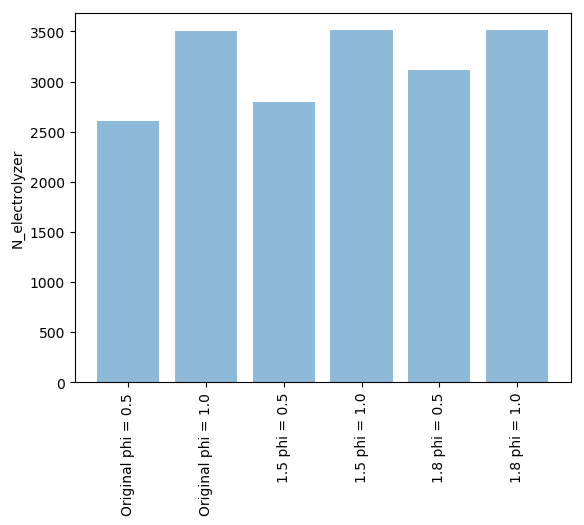

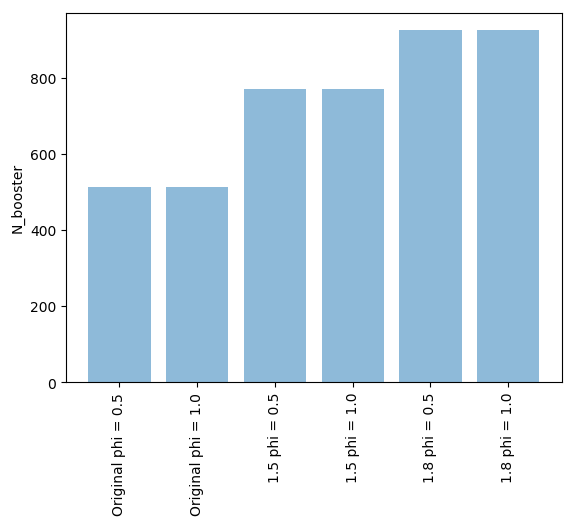

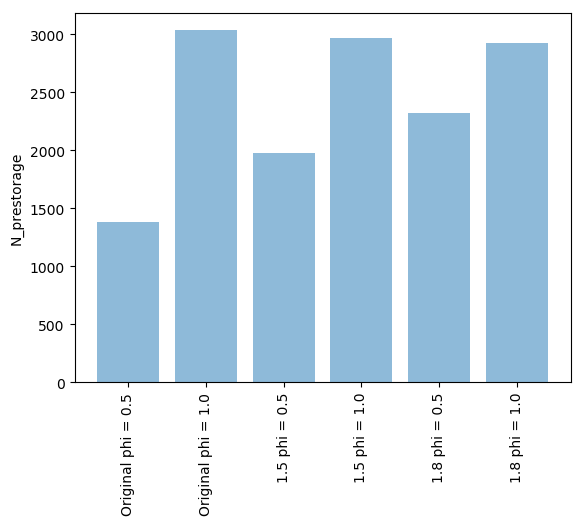

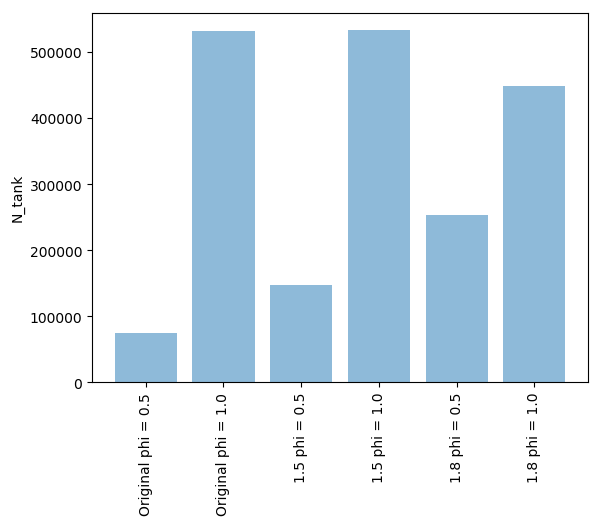

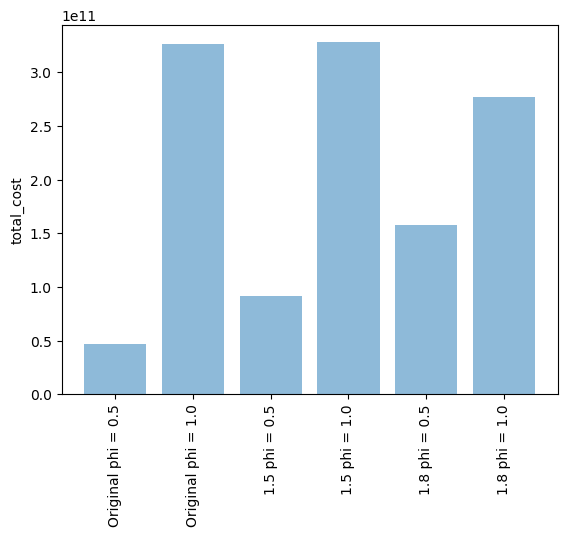

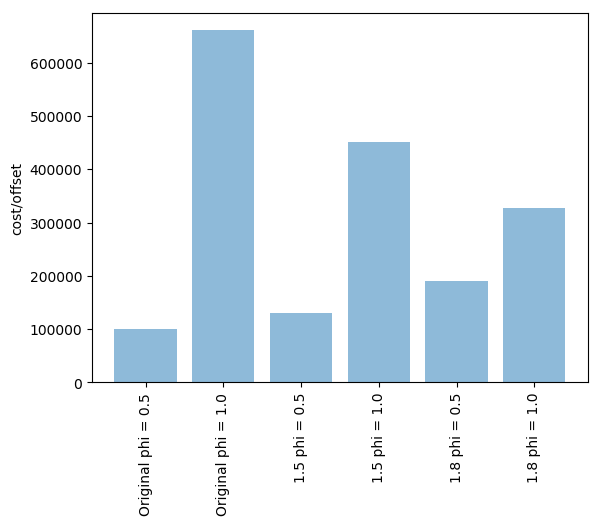

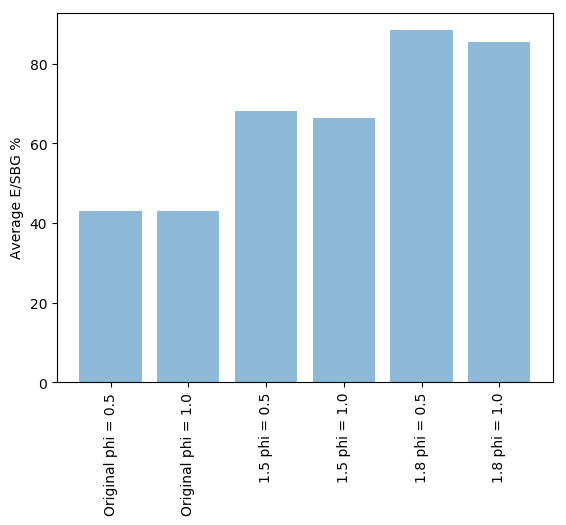

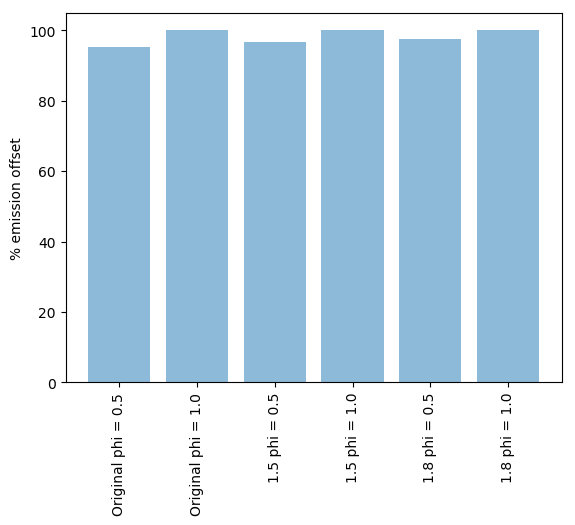

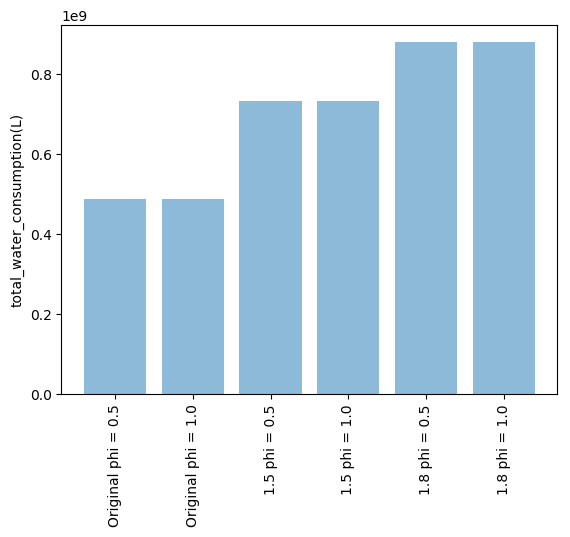

In [96]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
 
col_name = 'N_electrolyzer'

for col_name in ['N_electrolyzer','N_booster','N_prestorage','N_tank','total_cost','cost/offset', 'Average E/SBG %', '% emission offset','total_water_consumption(L)']:
    labels = final_df.index.tolist()
    x_label = np.arange(len(labels))
    variable_values = final_df[col_name]

    plt.bar(x_label, variable_values, align='center', alpha=0.5)
    plt.xticks(x_label, labels,rotation=90)
    plt.ylabel(col_name)
    # plt.title('Programming language usage')

    plt.show()

In [97]:
H2_1_list = []
H2_2_list = []
H2_3_list = []
H2_4_list = []

for df in [equality_result_demand_factor_1_5, equality_result_demand_factor_1_10, equality_result_demand_factor_15_5, equality_result_demand_factor_15_10, equality_result_demand_factor_18_5, equality_result_demand_factor_18_10]:

    H2_1_df = create_var_df_from_result(df,'H2_1_',hour_str='Y')
    H2_1_list.append(H2_1_df['value'].sum())
    
    H2_2_df = create_var_df_from_result(df,'H2_2_',hour_str='Y')
    H2_2_list.append(H2_2_df['value'].sum())
    
    H2_3_df = create_var_df_from_result(df,'H2_3_',hour_str='Y')
    H2_3_list.append(H2_3_df['value'].sum())
    
    H2_4_df = create_var_df_from_result(df,'H2_4_',hour_str='Y')
    H2_4_list.append(H2_4_df['value'].sum())
    
    
# H2_summary = pd.DataFrame({'phi' : phi_list,'RNG' : H2_1_list, 'HENG' : H2_2_list, 'Transportation' : H2_3_list, 'Industry' : H2_4_list})
# H2_summary.set_index('phi',inplace=True)
# display(H2_summary)

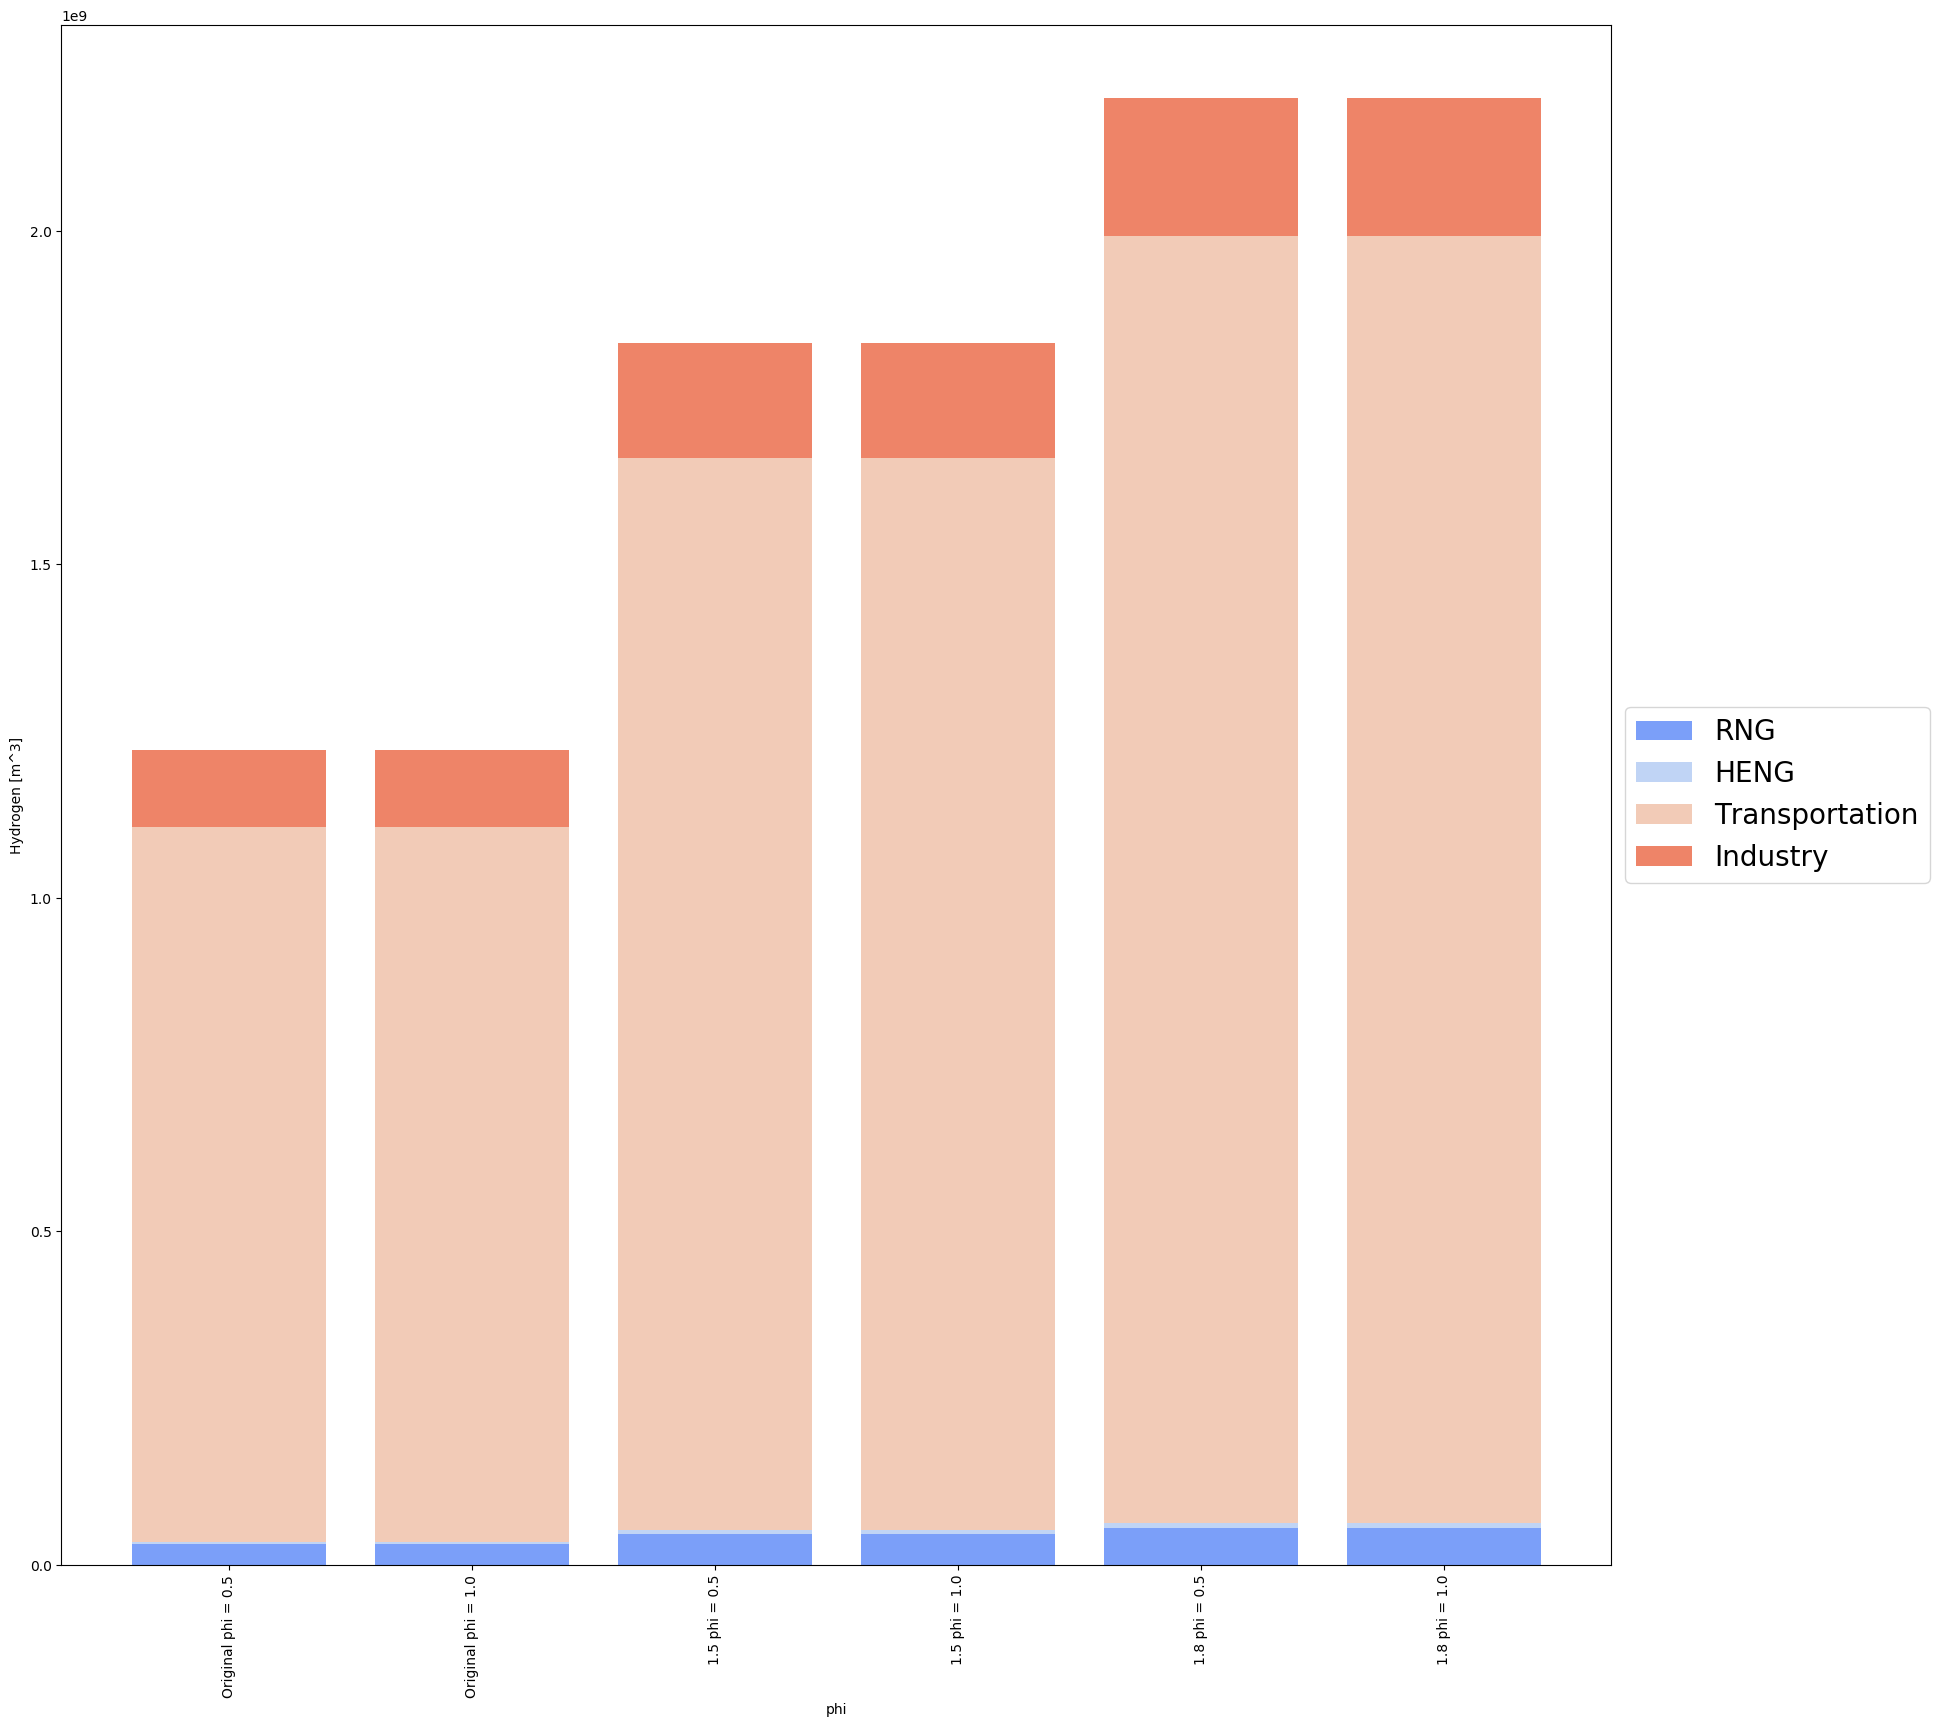

In [98]:
import seaborn as sns 
import numpy as np

color_array = sns.color_palette("coolwarm",4)
label_list = ['RNG','HENG','Transportation','Industry']
ind = [x for x,_ in enumerate(final_df.index.tolist())]

plt.figure(figsize=(20,20))

plt.bar(ind, H2_1_list, width=0.8, label=label_list[0], color = color_array[0])
plt.bar(ind, H2_2_list, width=0.8, label=label_list[1], color = color_array[1], bottom = H2_1_list)
plt.bar(ind, H2_3_list, width=0.8, label=label_list[2], color = color_array[2], bottom = np.array(H2_1_list) + np.array(H2_2_list))
plt.bar(ind, H2_4_list, width=0.8, label=label_list[3], color = color_array[3], bottom = np.array(H2_1_list) + np.array(H2_2_list) + np.array(H2_3_list))


plt.xticks(ind, final_df.index.tolist(),rotation='vertical')
plt.ylabel('Hydrogen [m^3]')
plt.xlabel("phi")
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5),prop={'size': 20})
# plt.title(df.index.name)

# plt.savefig(df.index.name +'_multiple_stackedbar.png')

plt.show()
    

In [99]:
H2_summary = pd.DataFrame({'Data' : final_df.index.tolist(),'RNG' : H2_1_list, 'HENG' : H2_2_list, 'Transportation' : H2_3_list, 'Industry' : H2_4_list})
H2_summary.set_index('Data',inplace=True)
display(H2_summary)
H2_summary.div(H2_summary.sum(1)/100,0)

,HENG,Industry,RNG,Transportation
Data,,,,
Original phi = 0.5,3.980367e+06,1.149750e+08,3.063167e+07,1.071887e+09
Original phi = 1.0,3.980367e+06,1.149750e+08,3.063167e+07,1.071887e+09
1.5 phi = 0.5,5.970551e+06,1.724625e+08,4.594750e+07,1.607830e+09
1.5 phi = 1.0,5.970551e+06,1.724625e+08,4.594750e+07,1.607830e+09
1.8 phi = 0.5,7.164661e+06,2.069550e+08,5.513700e+07,1.929397e+09
1.8 phi = 1.0,7.164661e+06,2.069550e+08,5.513700e+07,1.929397e+09


,HENG,Industry,RNG,Transportation
Data,,,,
Original phi = 0.5,0.325866,9.412808,2.507763,87.753564
Original phi = 1.0,0.325866,9.412808,2.507763,87.753564
1.5 phi = 0.5,0.325866,9.412808,2.507763,87.753564
1.5 phi = 1.0,0.325866,9.412808,2.507763,87.753564
1.8 phi = 0.5,0.325866,9.412808,2.507763,87.753564
1.8 phi = 1.0,0.325866,9.412808,2.507763,87.753564


The distribution is the same across all results because the demands are fixed